# Alistair Farthing 
### Data Cleaning and EDA 

# Contents
##### Introduction 
##### Basic Exploration 
##### Visual EDA 
##### Data Cleaning 
##### Feature Engineering
##### Key Findings 

# Introduction 

The Gorkha earthquake of 2015 was a 7.8 magnitude earthquake that struck Nepal and neighbouring countries, causing widespread devastation and claiming almost 9,000 lives. There was an estimated $10billion worth of damage caused and Nepal’s economy was significantly impacted. 

Census and survey data was collected by the Central Bureau of Statistics in Nepal after the devastating 2015 earthquake in the Gorkha region of the country. An online public repository hosts a number of relational databases made of compiled data collected by the CBS, a number of these relational databases will form the basis of the investigative project. 
    
The aim of this project is to gather insights on which characteristics make up buildings that are more prone to damage in the event of an earthquake and buildings which are more likely to withstand earthquakes. The insights gained through EDA and Machine Learning can be used to inform future developments as well as forming the basis of a public service initiative to inform residents living in high-risk properties of ways to best navigate hazards in the event of future earthquakes. Ultimately we are hoping to use data to drive positive change and save lives.

First of all, let's import the packages needed to process our data and start building some simple visualisations in order to explore our dataframe a little better.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

---

In [2]:
pd.set_option('display.max_columns', None)
# This will allow us to view all columns when calling the dataframe.

In [3]:
QuakesStructure = pd.read_csv('/Users/alistair/Desktop/csv_building_structure.csv')
# Loading in the data.

# Basic Exploration 

In [4]:
QuakesStructure.shape
# A quick look at the shape of the original dataframe.

(762106, 31)

Let's have a look at the columns that make up the dataframe.

In [5]:
QuakesStructure.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

We have a column titled `building_id`. Since our dataframe is a collection of records of building characteristics, with each row representing a building, this column may offer a quick indication as to whether our dataframe has any duplicated rows or not. If we check the number of unique values within this column and compare it to the length of the number of values in our dataframe, if we find the same value, we know we have no duplicated rows. Let's take a look.

In [6]:
QuakesStructure['building_id'].nunique()
# The unique entries in this column is the same length as the dataframes length of values, great!

762106

Now that we have made sure there are no duplicates in the dataframe, the next step would be to investigate any missing values.

In [7]:
# Loop over the columns in the DataFrame
for col in QuakesStructure.columns:
    # Calculate the percentage of NaN values in the column
    pct_nan = QuakesStructure[col].isna().mean() * 100
    
    # Print the result
    print(f"{col} has {pct_nan:.5f}% NaN values")

building_id has 0.00000% NaN values
district_id has 0.00000% NaN values
vdcmun_id has 0.00000% NaN values
ward_id has 0.00000% NaN values
count_floors_pre_eq has 0.00000% NaN values
count_floors_post_eq has 0.00000% NaN values
age_building has 0.00000% NaN values
plinth_area_sq_ft has 0.00000% NaN values
height_ft_pre_eq has 0.00000% NaN values
height_ft_post_eq has 0.00000% NaN values
land_surface_condition has 0.00000% NaN values
foundation_type has 0.00000% NaN values
roof_type has 0.00000% NaN values
ground_floor_type has 0.00000% NaN values
other_floor_type has 0.00000% NaN values
position has 0.00013% NaN values
plan_configuration has 0.00013% NaN values
has_superstructure_adobe_mud has 0.00000% NaN values
has_superstructure_mud_mortar_stone has 0.00000% NaN values
has_superstructure_stone_flag has 0.00000% NaN values
has_superstructure_cement_mortar_stone has 0.00000% NaN values
has_superstructure_mud_mortar_brick has 0.00000% NaN values
has_superstructure_cement_mortar_brick ha

Overall it looks like a pretty complete dataframe. We have a few columns that have missing values but no more than 1% of any column is missing, but what does that look like in terms of missing entries.

In [8]:
QuakesStructure.isna().sum()
# Let's look at the number of missing entries rather than the percentages.

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

As suspected, the number of missing values from the dataframe is very low. There are only 26 missing values in total, let's take a closer look at our features and then deal with the missing values once we have a better understanding of the data as a whole.

In [9]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [10]:
QuakesStructure['district_id'].unique()
# Checking the number of unique Districts

array([12, 20, 21, 22, 23, 24, 28, 29, 30, 31, 36])

It looks like there is data from 11 different Districts in Nepal. We may be able to encode some LAT and LON data for the buildings within these Districts, although its not very granular.

In [11]:
print(len(QuakesStructure['ward_id'].unique()))
# Checking the number of unique Wards

945


It looks like there is data from 945 different Wards in Nepal. This may be too many Wards to impute LAT and LON data for manually.

In [12]:
print(len(QuakesStructure['vdcmun_id'].unique()))
# Checking the number of unique Municipalities

110


It looks like there is data from 110 different Municipalities in Nepal. This number might be large enough to produce valuable insights if the LAT and LON can be imputed, it will also be relatively easy to impute these values compared to the 945 Ward values!

In [13]:
QuakesStructure['count_floors_pre_eq'].unique()
# Checking the different number of floors the buildings in our dataframe have before the earthquake.

array([1, 2, 3, 4, 9, 5, 6, 7, 8])

In [14]:
QuakesStructure['count_floors_post_eq'].unique()
# Checking the different number of floors the buildings in our dataframe have after the earthquake.

array([1, 0, 2, 3, 4, 9, 5, 6, 8, 7])

In [15]:
QuakesStructure['age_building'].unique()
# Checking the different number of building ages within the dataframe.

array([  9,  15,  20,  30,  18,  13,   8,  22,  10,   3,   2,   7,  50,
        29,  25,  14,  23,  40,   1,  82,  35,  60,  45,  11,  32,  16,
        27,  12,  65,  33,   4,  24,  47,  99,   5,  70,  80,  44,  75,
        21,   6,  17,  58,  57,  19,  26,  28,  95,  90,  71,  55,  39,
        48,  42,  85,   0,  38,  52,  56,  59,  84,  46,  68, 105,  51,
        41,  62,  61,  36,  34,  78, 100,  54,  72,  31,  43,  37,  49,
        81,  53,  69, 187, 999,  66,  63, 102,  87,  79, 140,  88,  64,
       120,  93, 115,  86, 130, 160,  92,  77,  73,  67,  83,  76, 101,
       110, 176,  74, 200, 190, 150, 111, 119,  96,  98,  94,  91,  89,
       125, 167,  97, 123, 103, 180, 112, 133, 116, 145, 114, 121, 144,
       108, 122, 155, 172, 132, 131, 106, 148, 113, 109, 165, 118, 117,
       107, 170, 104, 162, 152, 127, 151, 146, 196, 126, 175, 138, 141,
       178, 128, 149, 164, 199, 135, 166, 168, 156, 161, 142, 185, 173,
       136, 177, 174, 124, 134, 193, 195])

We have a wide range of building ages here. One particular building age stands out amongst the rest, 999. It looks like there seem to be buildings with ages from 1 to around the 200 mark. There then seems to be a bit of a leap from around the 200 mark to the 999 mark, this could possibly be an error or perhaps the dataframe includes information about some of Nepal's famous temples. We will plot the distribution of this column later on and do some further exploration.

In [16]:
QuakesStructure['plinth_area_sq_ft'].unique()
# We would expect a lot of unique values in this column.

array([ 288,  364,  384, ..., 1349, 4242, 2247])

In [17]:
QuakesStructure['height_ft_pre_eq'].unique()
# Taking a look at the unique building heights before the earthquake.

array([ 9, 21, 19, 12, 15, 17,  7, 16, 14,  6, 10, 24, 18, 20,  8, 32, 22,
       27, 11, 13, 25, 34, 23, 26, 30, 28, 35, 36, 60, 56, 50, 45, 44, 40,
       48, 54, 33, 55, 29, 43, 31, 78, 38, 41, 51, 70, 37, 85, 42, 96, 49,
       65, 46, 66, 57, 67, 75, 47, 68, 58, 80, 64, 63, 76, 39, 99, 72, 90,
       52, 77, 74, 95, 71, 81, 97, 93, 59, 89, 61])

In [18]:
QuakesStructure['height_ft_post_eq'].unique()
# Taking a look at the unique building heights after the earthquake.

array([ 9,  0, 21, 19, 12, 15, 17,  7, 16, 14,  6, 10, 24, 18, 20,  8, 32,
       22, 27, 13, 11, 41, 25, 23, 26, 30, 28, 35, 48, 50, 55, 36, 60, 56,
       45, 44, 40, 54, 33, 34, 29, 46, 43, 31, 47, 97, 76, 37, 38, 51, 75,
       80, 42, 73, 52, 70, 85, 65, 66, 57, 67, 68, 58, 64, 63, 72, 39, 49,
       77, 90, 71, 78, 99, 95, 59, 81, 87, 61, 96, 82])

We can already see looking at the arrays above, the second most common building height before the earthquake was 21 feet, after the event of the earthquake the second most common building height is 0 feet.

Now that we have had a quick look at some of the columns containing numerical data, we should take a closer look at some of the columns containing categorical data.

In [19]:
QuakesStructure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [20]:
QuakesStructure['foundation_type'].unique()
# Different types of foundations in the dataframe

array(['Other', 'Mud mortar-Stone/Brick', 'Cement-Stone/Brick',
       'Bamboo/Timber', 'RC'], dtype=object)

In [21]:
QuakesStructure['roof_type'].unique()
# Different types of roof types in the dataframe

array(['Bamboo/Timber-Light roof', 'Bamboo/Timber-Heavy roof',
       'RCC/RB/RBC'], dtype=object)

In [22]:
QuakesStructure['ground_floor_type'].unique()
# Different types of ground floor material in the dataframe

array(['Mud', 'Brick/Stone', 'RC', 'Timber', 'Other'], dtype=object)

In [23]:
QuakesStructure['other_floor_type'].unique()
# Different types of other floor material in the dataframe

array(['Not applicable', 'TImber/Bamboo-Mud', 'Timber-Planck',
       'RCC/RB/RBC'], dtype=object)

In [24]:
QuakesStructure['position'].unique()
# Different types of building positions in the dataframe

array(['Not attached', 'Attached-1 side', 'Attached-2 side',
       'Attached-3 side', nan], dtype=object)

In [25]:
QuakesStructure['plan_configuration'].unique()
# Different types of building shapes in the dataframe

array(['Rectangular', 'L-shape', 'Square', 'T-shape', 'Multi-projected',
       'H-shape', 'U-shape', 'Others', 'E-shape',
       'Building with Central Courtyard', nan], dtype=object)

In [26]:
QuakesStructure['condition_post_eq'].unique()
# What condition was each building in after the earthquake

array(['Damaged-Used in risk', 'Damaged-Repaired and used',
       'Damaged-Rubble unclear', 'Not damaged', 'Damaged-Not used',
       'Damaged-Rubble clear', 'Damaged-Rubble Clear-New building built',
       'Covered by landslide'], dtype=object)

In [27]:
QuakesStructure['damage_grade'].unique()
# What level of damage was suffered by the building

array(['Grade 3', 'Grade 5', 'Grade 2', 'Grade 1', 'Grade 4', nan],
      dtype=object)

In [28]:
QuakesStructure['technical_solution_proposed'].unique()
# Information on what solution has been proposed in order to return the building to its pre-earthquake condition

array(['Major repair', 'Reconstruction', 'Minor repair', 'No need', nan],
      dtype=object)

### Let's take a closer look at how our features are distributed

In [29]:
QuakesStructure.info()
# A quick look at the data types stored in the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

# Visual EDA 

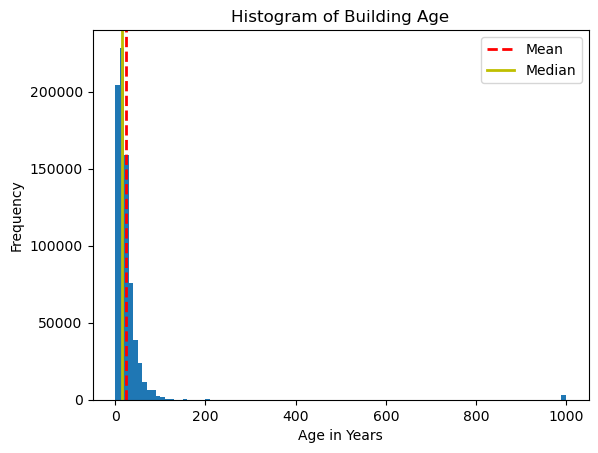

In [30]:
# Plotting the distribution of the age of our buildings 
plt.hist(QuakesStructure['age_building'], bins = 100)

# add labels and title
plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.title('Histogram of Building Age')
plt.axvline(QuakesStructure['age_building'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(QuakesStructure['age_building'].median(), color='y', linestyle='solid', linewidth=2)
plt.legend(['Mean', 'Median'])

# display the plot
plt.show()

In [31]:
print(QuakesStructure['age_building'].mean())
# Mean value

24.326404725851784


It looks like the majority of our buildings are around 10 years old, with a mean building age of 24. As we saw earlier during the basic exploration of values within the Age column, there is something unusual going on. The original source of the data being used in this project has other dataframes linked to the same earthquake. One of these additional dataframes is information each building's ownership and use. Looking into this dataframe, it seems that none of the buildings we are working with are any form of temple, as such we will be working under the assumption that the buildings with a recorded age of 999 have been incorrectly recorded. It is possible that Nepal has buildings aged over 1000 years, but since there are no buildings between around 205 and 999 I think we can work safely under the assumption of these values being an error. We will address this issue during the Data Cleaning stage of this notebook.

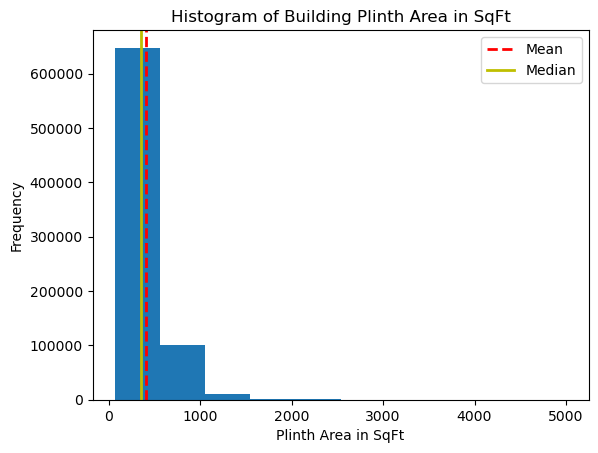

In [32]:
# Plotting the distribution of the area of our buildings' footprints 
plt.hist(QuakesStructure['plinth_area_sq_ft'], bins = 10)

# add labels and title
plt.xlabel('Plinth Area in SqFt')
plt.ylabel('Frequency')
plt.title('Histogram of Building Plinth Area in SqFt')
plt.axvline(QuakesStructure['plinth_area_sq_ft'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(QuakesStructure['plinth_area_sq_ft'].median(), color='y', linestyle='solid', linewidth=2)
plt.legend(['Mean', 'Median'])

# display the plot
plt.show()

In [33]:
print(QuakesStructure['plinth_area_sq_ft'].mean())
# Mean value

406.6725757309351


The average plinth area in sq ft for our dataframe is 406. There don't seem to be any outliers for this column and the vast majority of data lies within the 1000sq ft bin. 

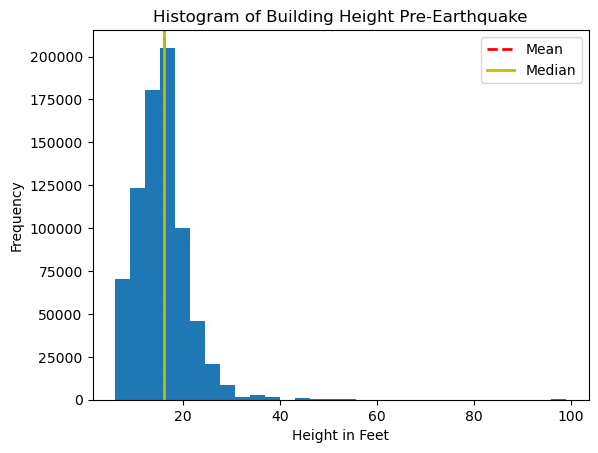

In [34]:
# Plotting the distribution of building height pre-earthquake 
plt.hist(QuakesStructure['height_ft_pre_eq'], bins = 30)

# add labels and title
plt.xlabel('Height in Feet')
plt.ylabel('Frequency')
plt.title('Histogram of Building Height Pre-Earthquake')
plt.axvline(QuakesStructure['height_ft_pre_eq'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(QuakesStructure['height_ft_pre_eq'].median(), color='y', linestyle='solid', linewidth=2)
plt.legend(['Mean', 'Median'])

# display the plot
plt.show()

In [35]:
print(QuakesStructure['height_ft_pre_eq'].mean())
# Mean value

16.049372397015638


There is a very small number of buildings taller than 40ft but again the majority of our data falls at the lower end of the chart. Our average building height before the earthquake is 16ft.

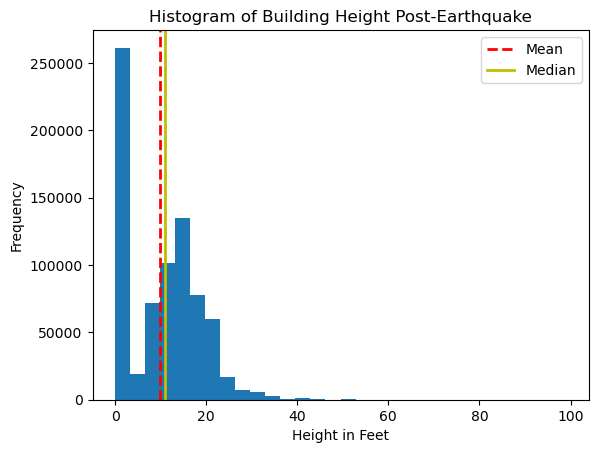

In [36]:
# Plotting the distribution of building height post-earthquake 
plt.hist(QuakesStructure['height_ft_post_eq'], bins = 30)

# add labels and title
plt.xlabel('Height in Feet')
plt.ylabel('Frequency')
plt.title('Histogram of Building Height Post-Earthquake')
plt.axvline(QuakesStructure['height_ft_post_eq'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(QuakesStructure['height_ft_post_eq'].median(), color='y', linestyle='solid', linewidth=2)
plt.legend(['Mean', 'Median'])

# display the plot
plt.show()

In [37]:
print(QuakesStructure['height_ft_post_eq'].mean())
# Mean value

9.86881746108809


After the earthquake, the average height of our buildings dropped by 6 feet. The average height after the earthquake is now lower than 10ft. There is a huge number of buildings which have been flattened and have a recorded height of 0ft.

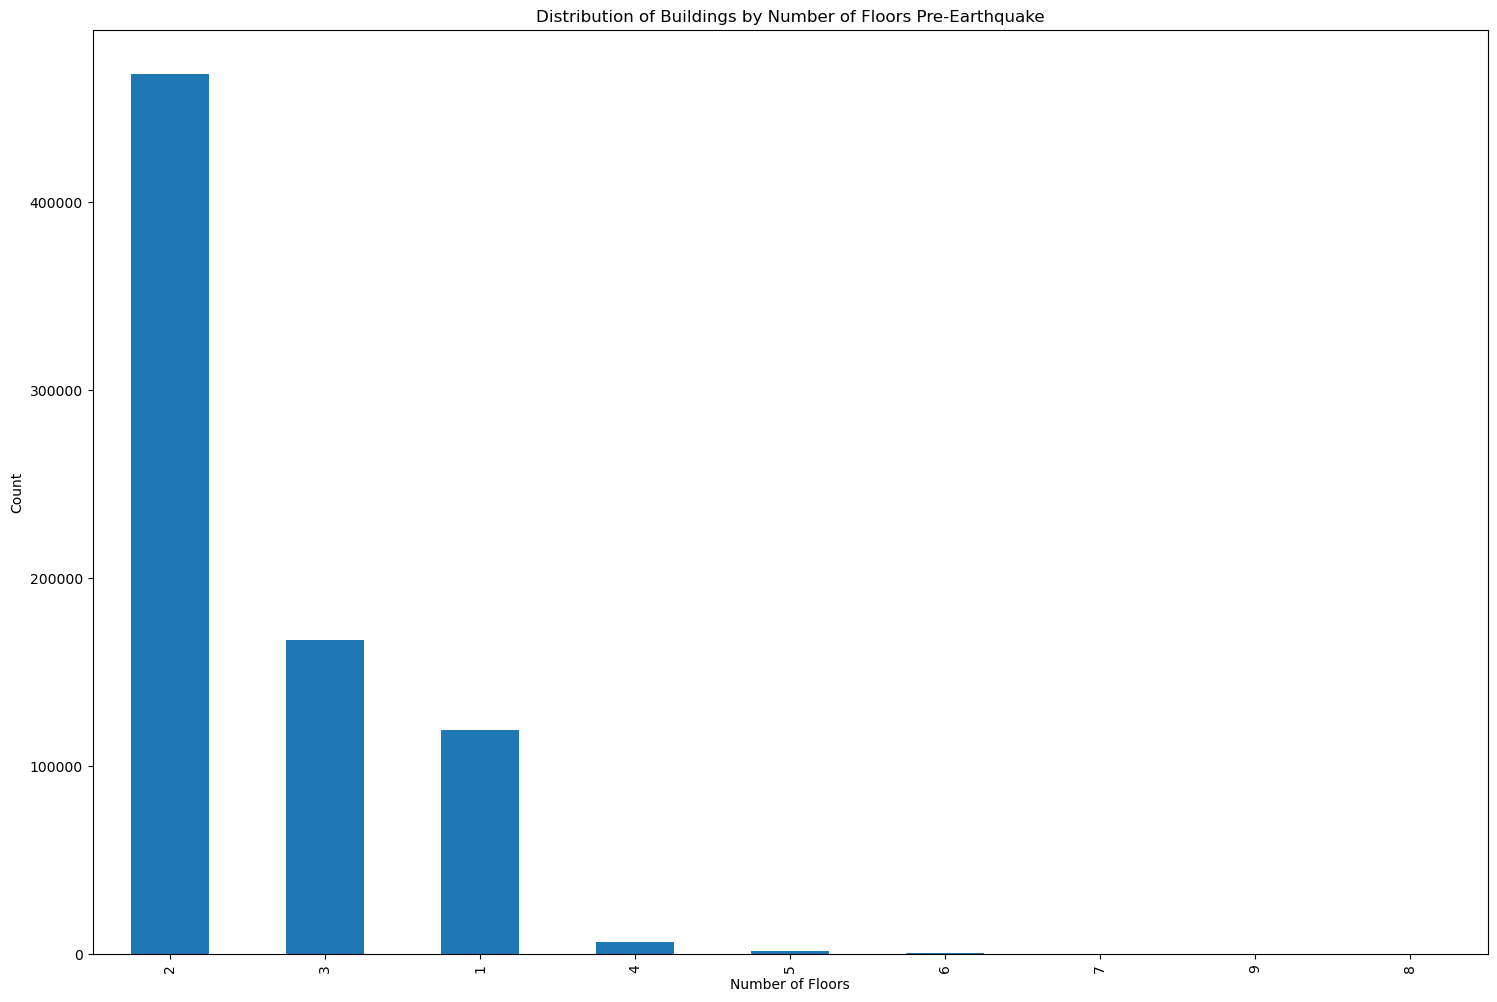

In [38]:
# Plotting the distribution of a buildings number of floors pre-earthquake 
QSpre = QuakesStructure['count_floors_pre_eq'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
QSpre.plot.bar()
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.title('Distribution of Buildings by Number of Floors Pre-Earthquake')
plt.show()

In [39]:
QuakesStructure['count_floors_pre_eq'].value_counts()

2    468113
3    166993
1    118901
4      6085
5      1569
6       332
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

Most of the buildings in the dataframe are two stories tall. There are around only 200,000 buildings taller. There are just over 100,000 buildings that are only 1 story tall.

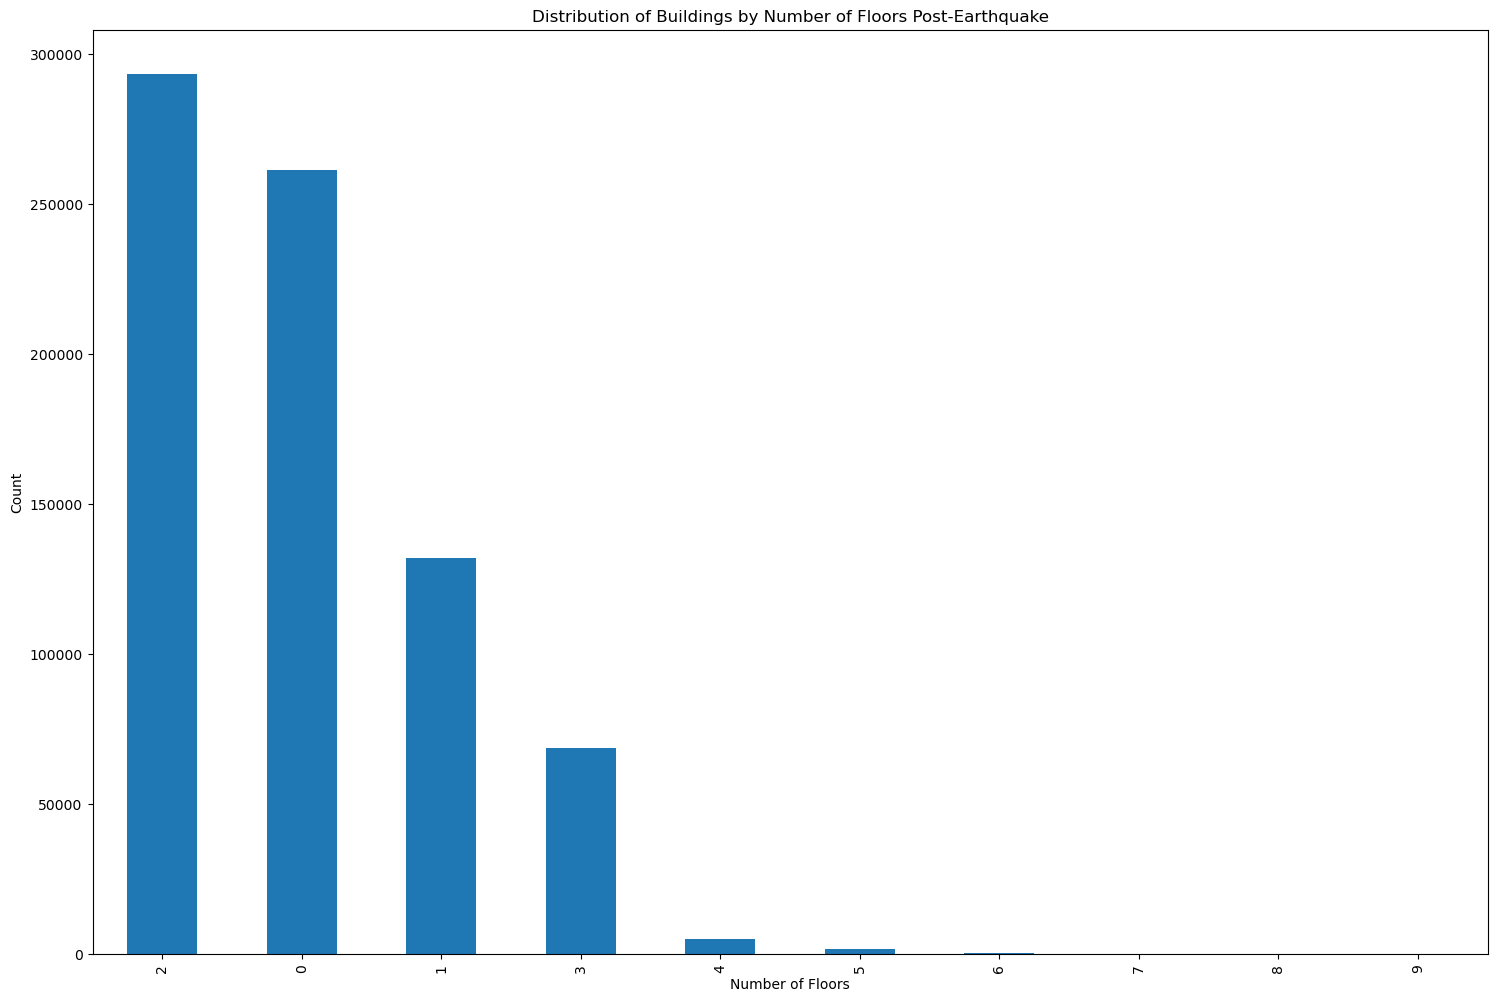

In [40]:
# Plotting the distribution of a buildings number of floors post-earthquake 
QSpost = QuakesStructure['count_floors_post_eq'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
QSpost.plot.bar()
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.title('Distribution of Buildings by Number of Floors Post-Earthquake')
plt.show()

In [41]:
QuakesStructure['count_floors_post_eq'].value_counts()

2    293391
0    261354
1    132024
3     68547
4      4839
5      1497
6       323
7        92
8        20
9        19
Name: count_floors_post_eq, dtype: int64

After the earthquake there is a drop in the number of buildings recorded as having 2 floors and there are now more than 250,000 buildings with a recorded number of floors as 0.

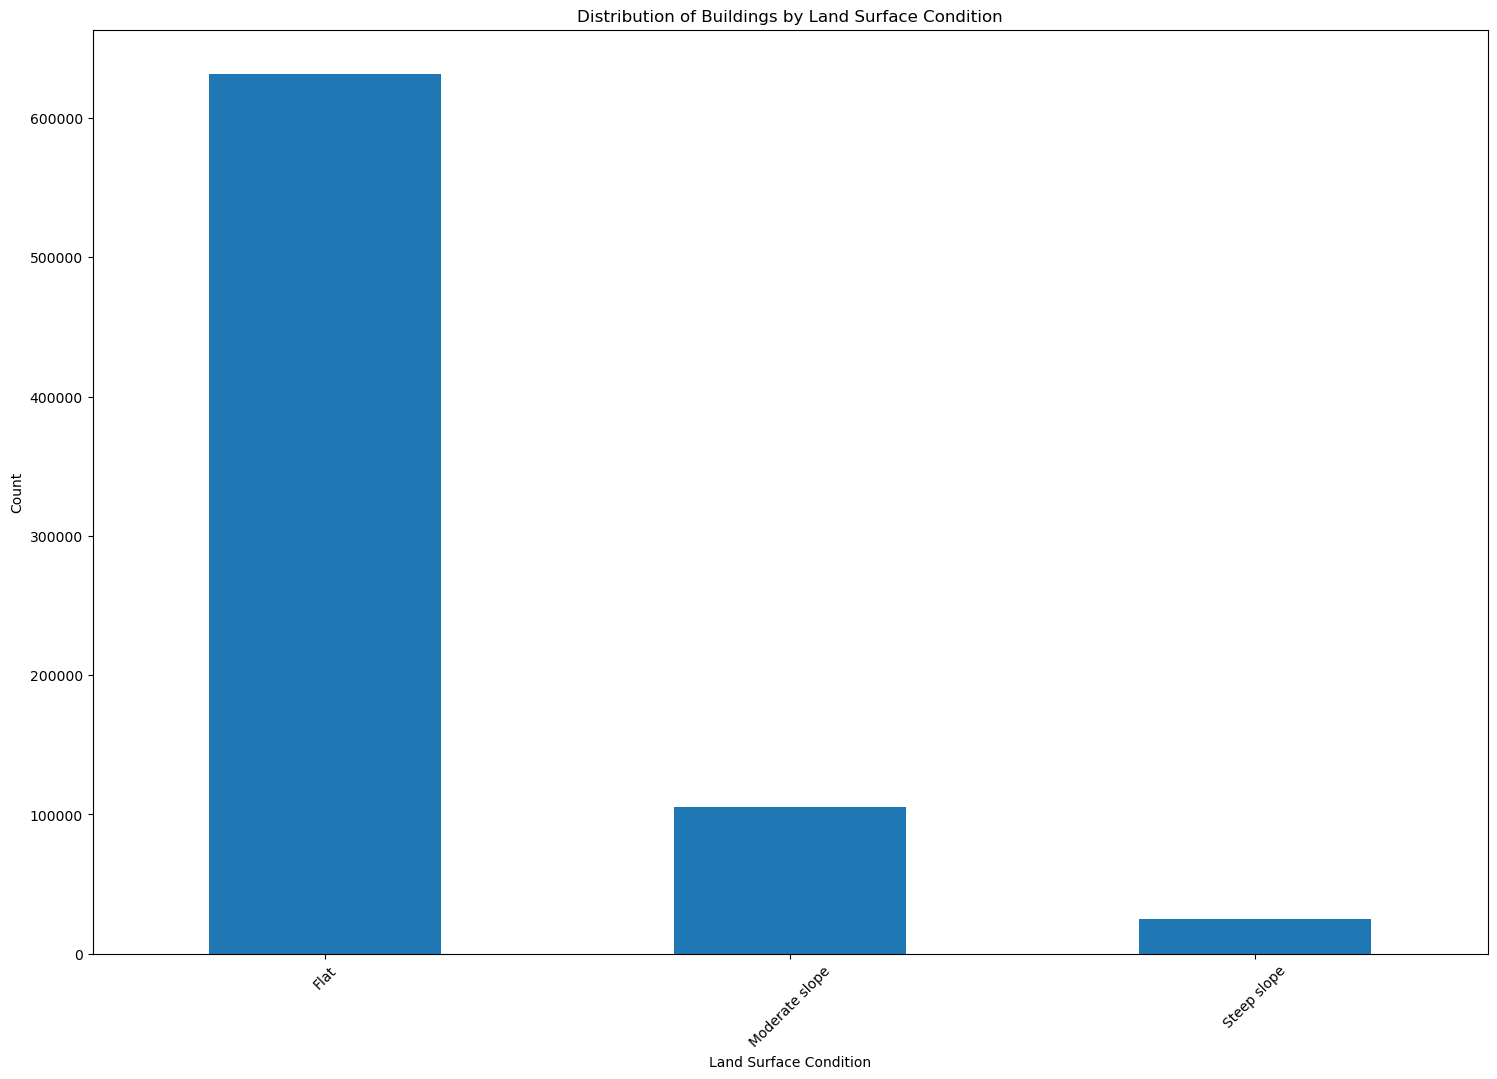

In [42]:
# Plotting the distribution of land surface condition
LSC = QuakesStructure['land_surface_condition'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
LSC.plot.bar()
plt.xlabel('Land Surface Condition')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Buildings by Land Surface Condition')
plt.show()

In [43]:
surface = QuakesStructure['land_surface_condition'].value_counts()
print(surface[['Moderate slope', 'Steep slope']])
# value count for buildings built on any kind of slope

Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64


We can see in the plot above that the majority of buildings in the dataframe have been constructed on level ground. Less than 130,000 buildings are situated on any kind of slope.

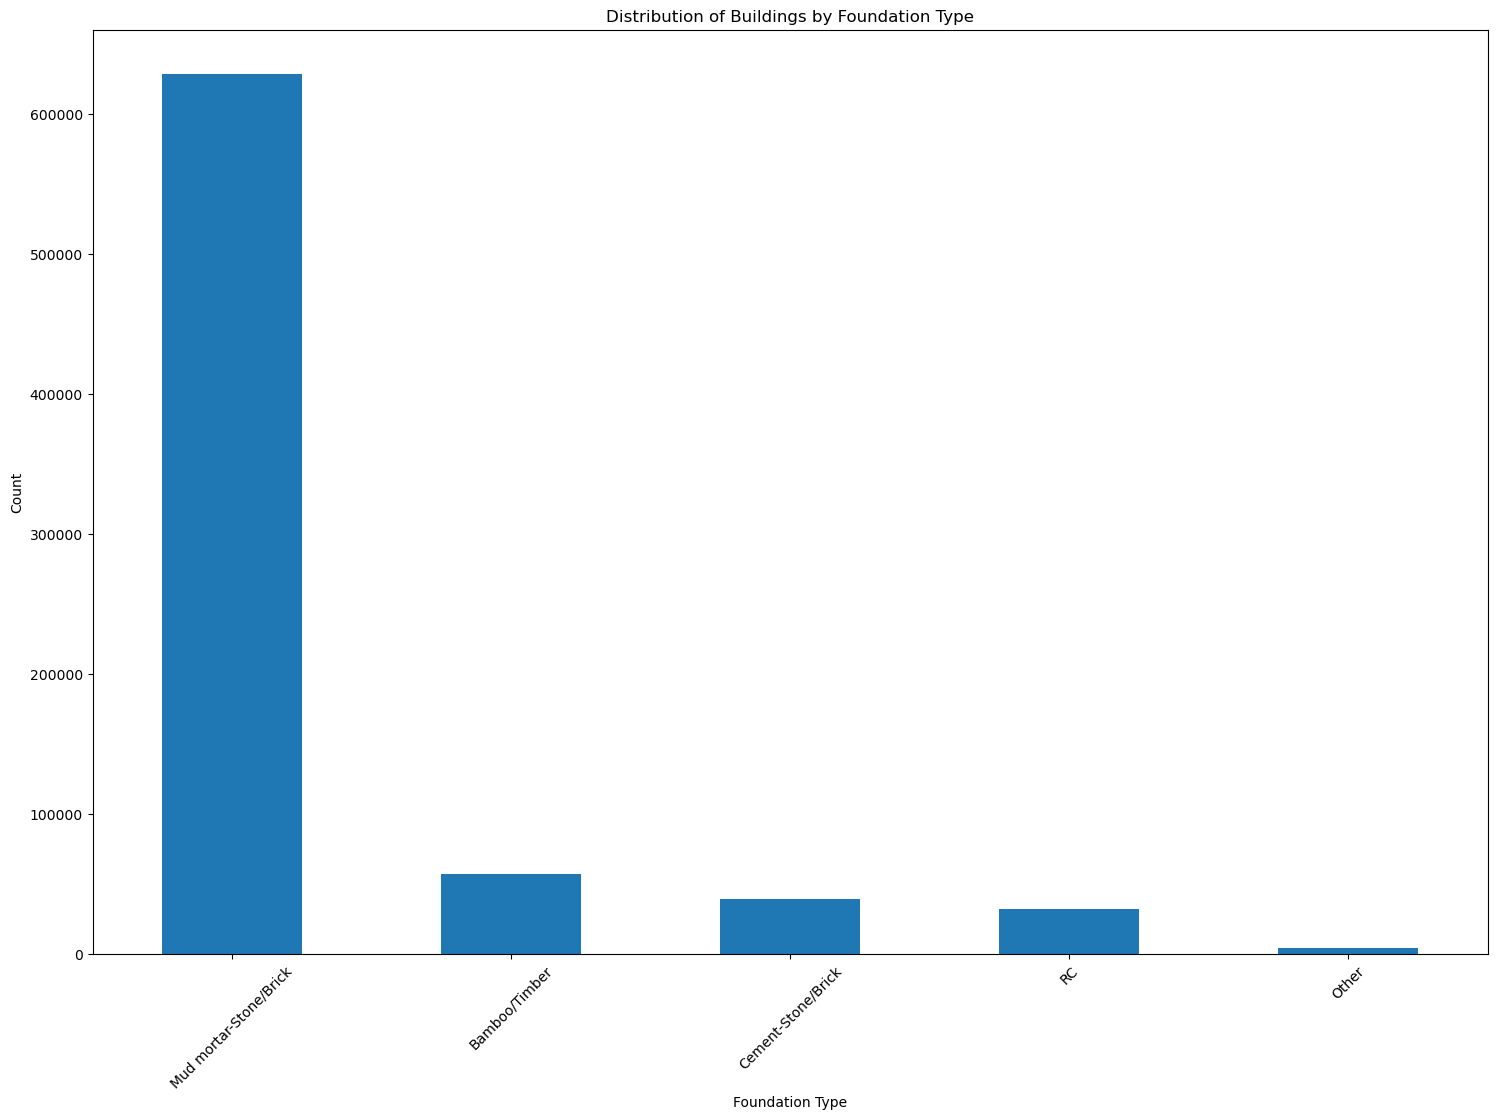

In [44]:
# Plotting the distribution of foundation types
FT = QuakesStructure['foundation_type'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
FT.plot.bar()
plt.xlabel('Foundation Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Buildings by Foundation Type')
plt.show()

In [45]:
QuakesStructure['foundation_type'].value_counts()
# value counts

Mud mortar-Stone/Brick    628716
Bamboo/Timber              57473
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

The two main building materials used in the construction of the buildings within the dataframe are Mud mortar-stone/brick and Bamboo/timber. These are fairly rudamental building materials and they account for the material in 686,189 of our total dataframe. An assumption leading into this project was that buildings with a more rudamental makeup would be more likely to suffer in the event of an earthquake. This could still be the case, but it is a little concerning that buildings of this type make up 90% of our data, this could skew our results and potentially create bias during the training of any machine learning model.

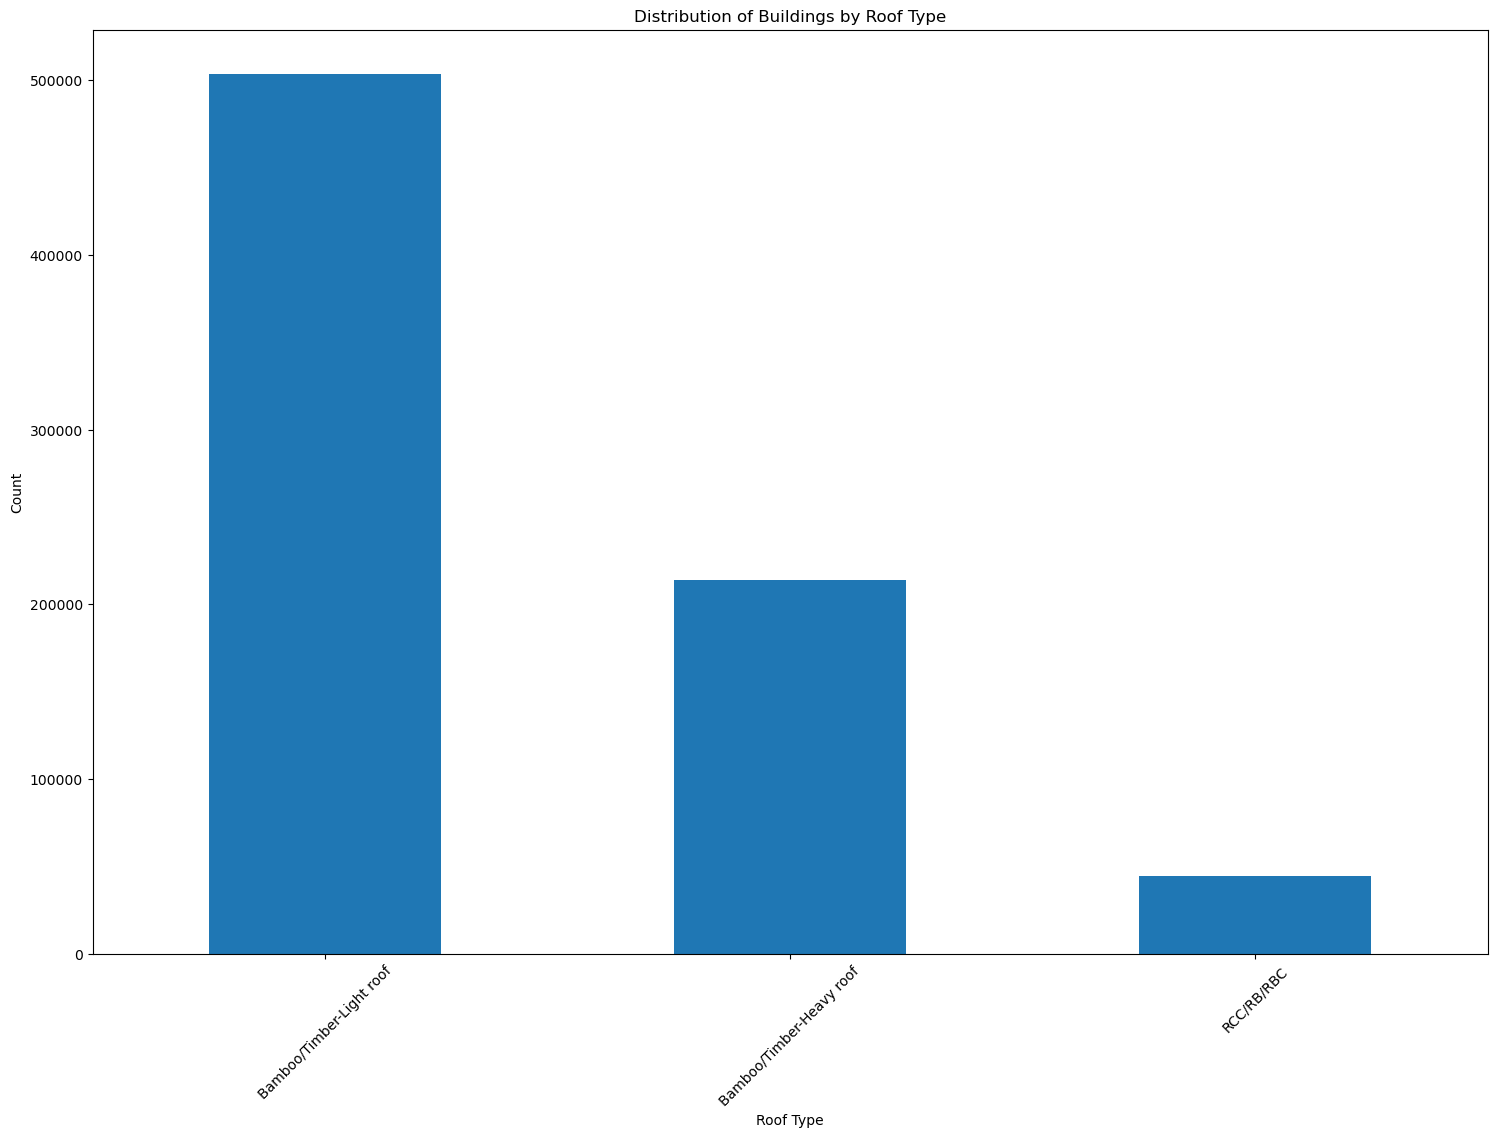

In [46]:
# Plotting the distribution of roof types 
RT = QuakesStructure['roof_type'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
RT.plot.bar()
plt.xlabel('Roof Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Buildings by Roof Type')
plt.show()

In [47]:
QuakesStructure['roof_type'].value_counts()

Bamboo/Timber-Light roof    503748
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: roof_type, dtype: int64

The plot above is less problematic than the previous but there is still a distinct trend in building materials used in Nepal with the most common roof materials being simple and rudimental as well.

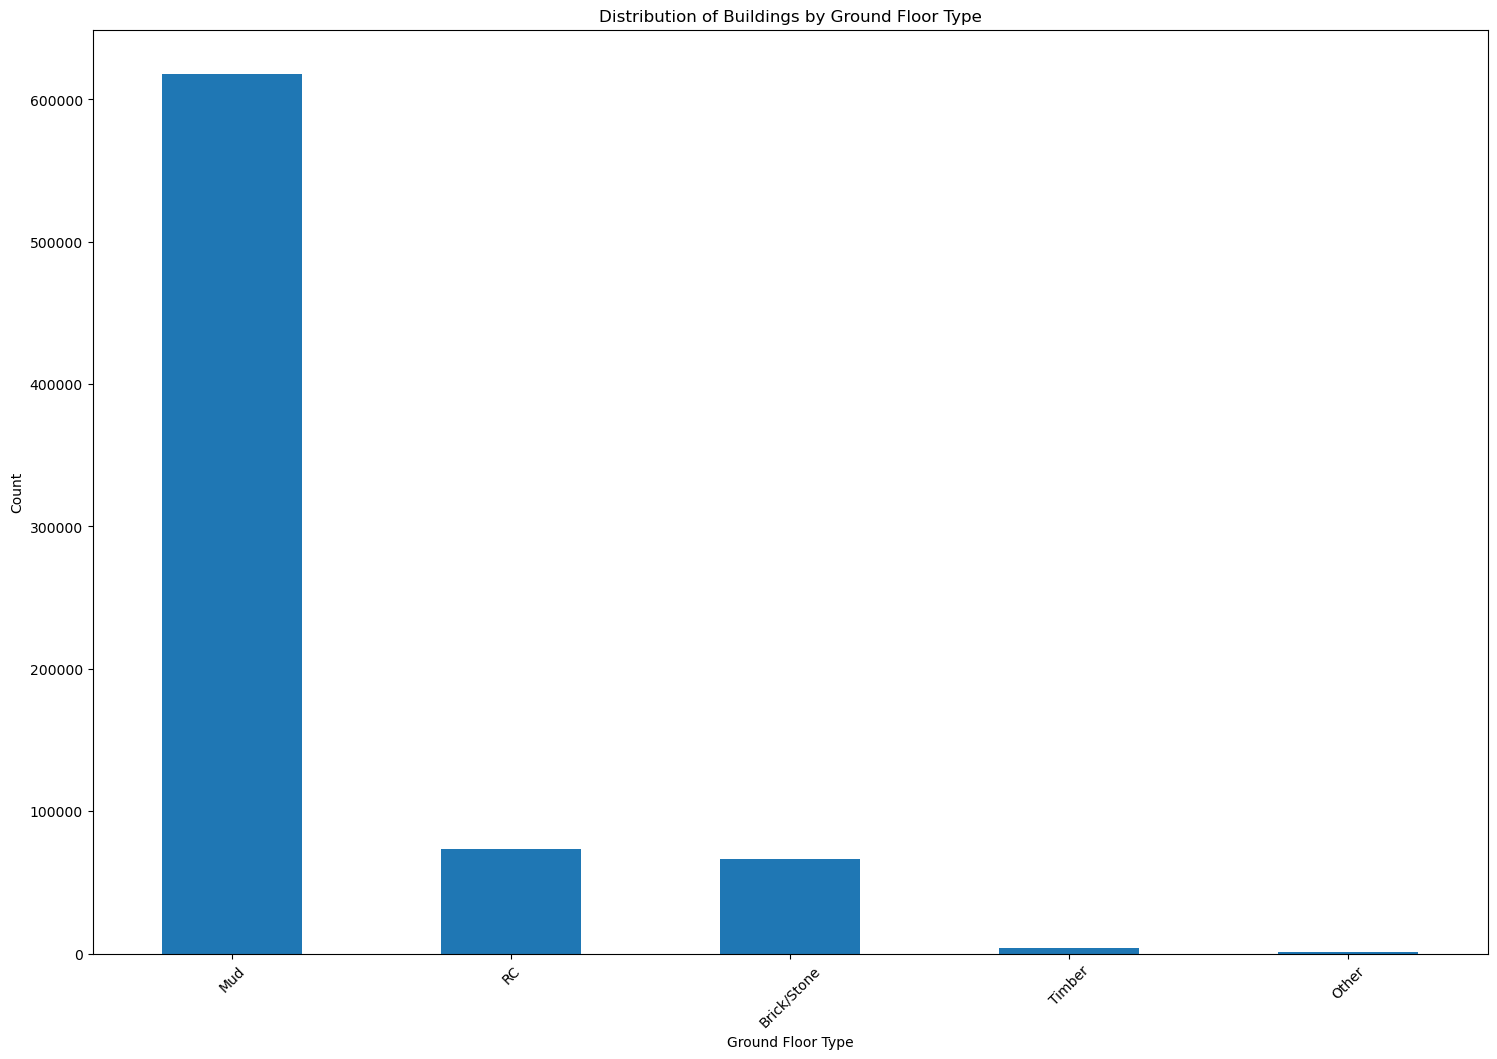

In [48]:
# Plotting the distribution of ground floor types
GFT = QuakesStructure['ground_floor_type'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
GFT.plot.bar()
plt.xlabel('Ground Floor Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Buildings by Ground Floor Type')
plt.show()

In [49]:
QuakesStructure['ground_floor_type'].value_counts()
# Ground floor type value counts

Mud            618217
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dtype: int64

In [50]:
1053+3594+66093+73149

143889

In [51]:
143889/618217*100


23.27483715265028

In [52]:
100-23.27483715265028
# Percentage of buildings in the dataframe with Mud ground floors

76.72516284734972

Much like foundation type and roof type, the materials used to construct the ground floors of our buildings is predominantly rudimental building materails. Mud based ground floors make up more than three quarters of all the buildings in the dataframe.

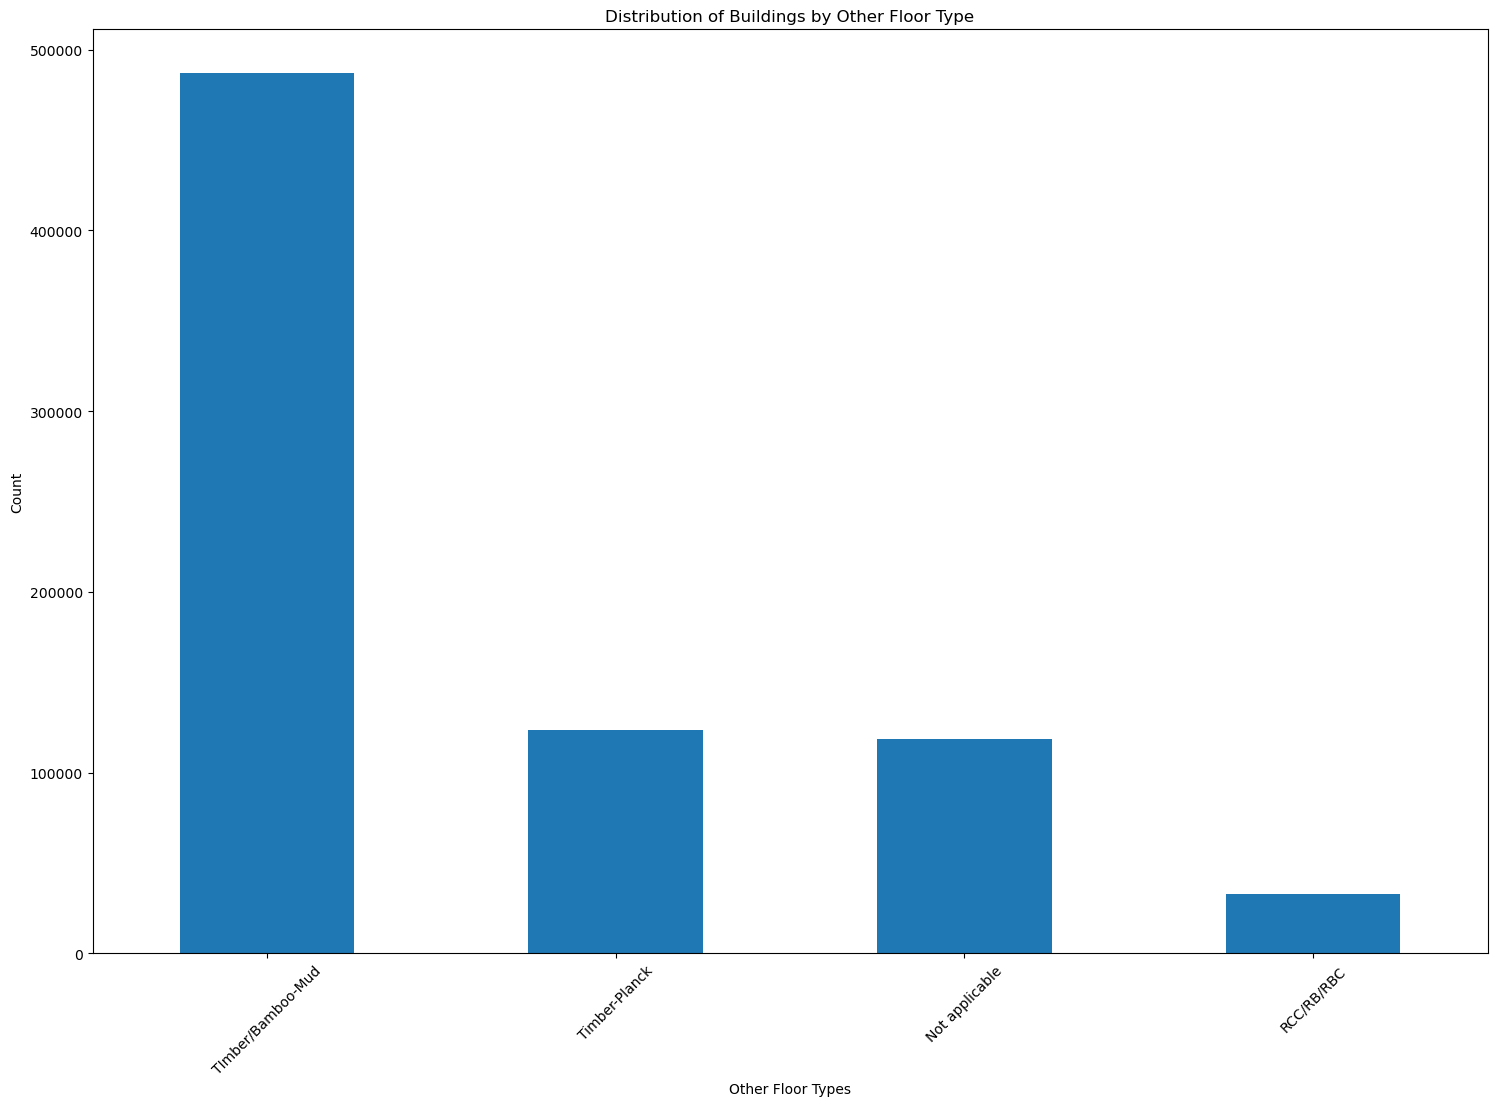

In [53]:
# Plotting the distribution of other floor types
OFT = QuakesStructure['other_floor_type'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
OFT.plot.bar()
plt.xlabel('Other Floor Types')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Buildings by Other Floor Type')
plt.show()

In [54]:
QuakesStructure['other_floor_type'].value_counts()
# other floor type value counts 

TImber/Bamboo-Mud    486907
Timber-Planck        123635
Not applicable       118822
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

The number of floors plot we saw earlier indicated that there was just over 100,000 buildings which were only a single story tall. This matches up with what the plot above is displaying, we have 118,822 buildings that fall into the 'Not applicable' category in the `other_floor_type` column, suggesting that these are our single story buildings.

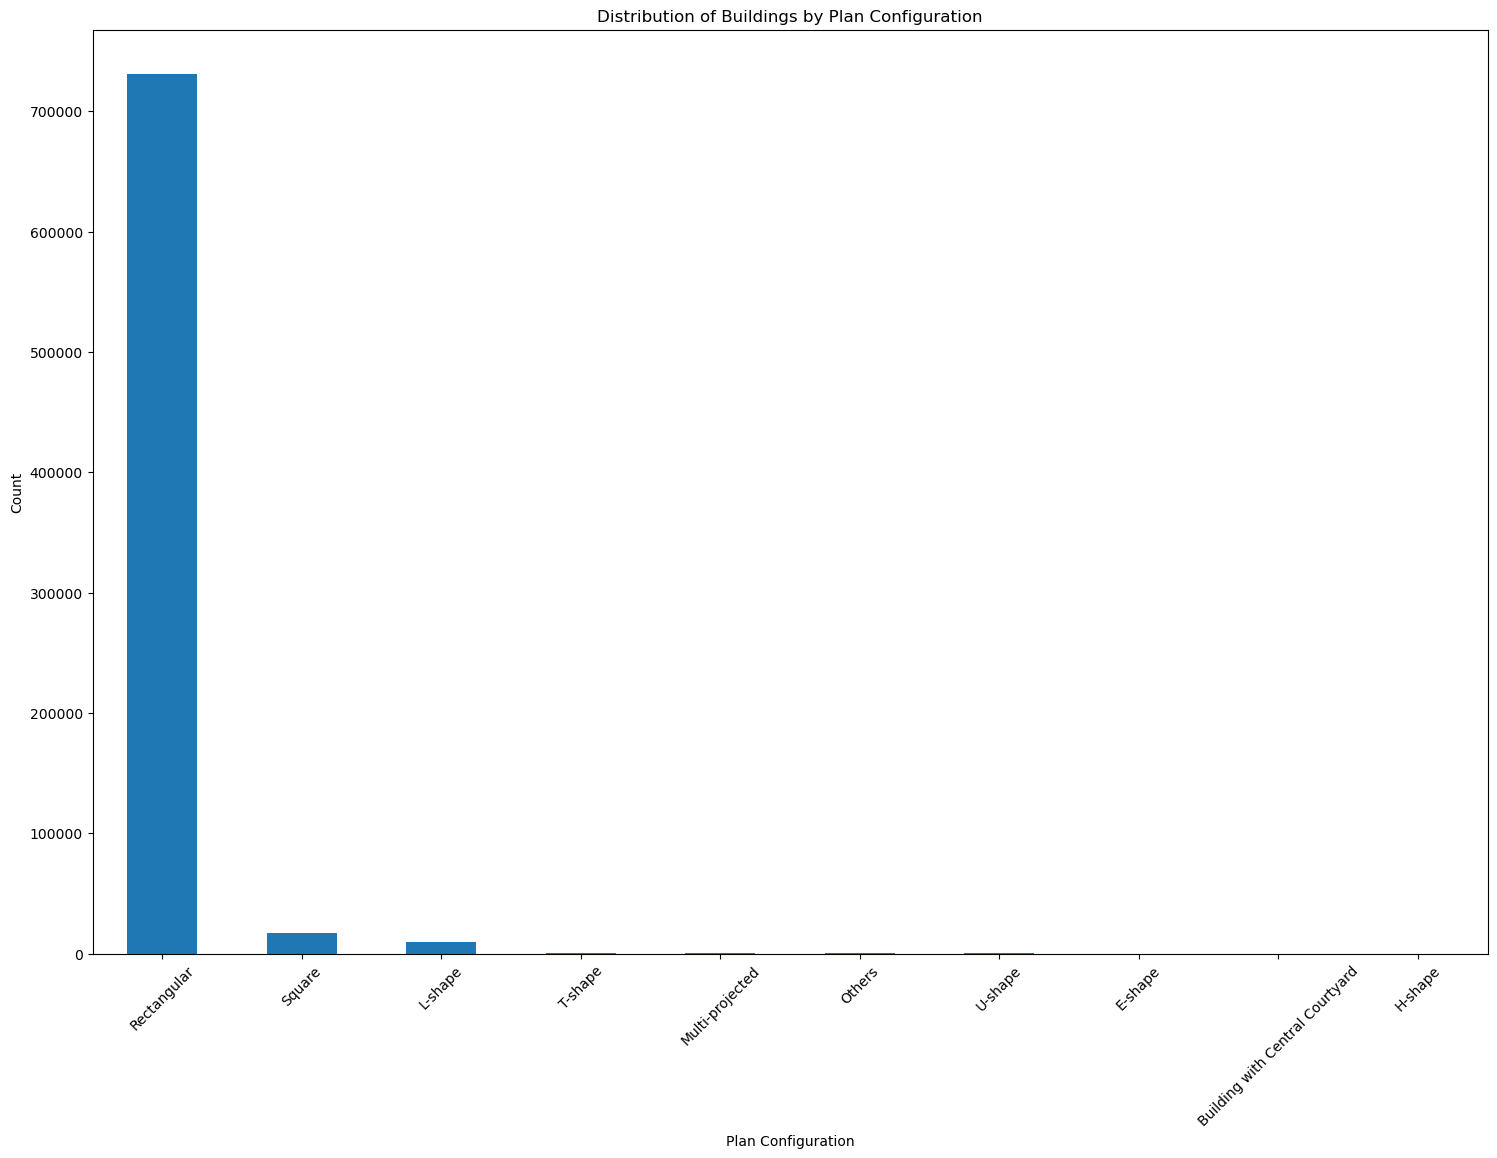

In [55]:
# Plotting the distribution of plan configurations 
PC = QuakesStructure['plan_configuration'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
PC.plot.bar()
plt.xlabel('Plan Configuration')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Buildings by Plan Configuration')
plt.show()

In [56]:
QuakesStructure['plan_configuration'].value_counts()

Rectangular                        731257
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [57]:
30848/762106*100

4.0477308930778655

Almost all of the buildings within the dataframe have been constructed in a rectangular format, with the second most popular building shape being a square. This column is so imbalanced that it is almost redundant, we will keep it in for now but we may be forced to do something with it later on.

We seem to have a number of features in our dataframe that have come from encoding a superstructure feature. The names of these new columns are things like `has_superstructure_XYZ`, let's take a look at how these features are distributed throughout the dataframe. There are 11 of these columns and since they have already been binarised, we can impute these values into a new dataframe and then use this to plot the distributions.

In [58]:
# Collecting the value counts to populate the SuperStructure dataframe
print(QuakesStructure['has_superstructure_other'].value_counts())
print(QuakesStructure['has_superstructure_adobe_mud'].value_counts())
print(QuakesStructure['has_superstructure_mud_mortar_stone'].value_counts())
print(QuakesStructure['has_superstructure_stone_flag'].value_counts())
print(QuakesStructure['has_superstructure_cement_mortar_stone'].value_counts())
print(QuakesStructure['has_superstructure_mud_mortar_brick'].value_counts())
print(QuakesStructure['has_superstructure_cement_mortar_brick'].value_counts())
print(QuakesStructure['has_superstructure_timber'].value_counts())
print(QuakesStructure['has_superstructure_bamboo'].value_counts())
print(QuakesStructure['has_superstructure_rc_engineered'].value_counts())
print(QuakesStructure['has_superstructure_rc_non_engineered'].value_counts())

0    752941
1      9165
Name: has_superstructure_other, dtype: int64
0    729792
1     32314
Name: has_superstructure_adobe_mud, dtype: int64
1    609891
0    152215
Name: has_superstructure_mud_mortar_stone, dtype: int64
0    735340
1     26766
Name: has_superstructure_stone_flag, dtype: int64
0    750053
1     12053
Name: has_superstructure_cement_mortar_stone, dtype: int64
0    744607
1     17499
Name: has_superstructure_mud_mortar_brick, dtype: int64
0    707596
1     54510
Name: has_superstructure_cement_mortar_brick, dtype: int64
0    564899
1    197207
Name: has_superstructure_timber, dtype: int64
0    700770
1     61336
Name: has_superstructure_bamboo, dtype: int64
0    749618
1     12488
Name: has_superstructure_rc_engineered, dtype: int64
0    731779
1     30327
Name: has_superstructure_rc_non_engineered, dtype: int64


In [59]:
# Impute the value counts into a list of values for the column
SuperStructure = pd.DataFrame({'Value_Counts': [9165, 32314, 609891, 26766, 12053, 17499, 54510, 197207, 61336, 12488, 30327]})
SuperStructure = SuperStructure.set_index(pd.Index(['has_superstructure_other',
                                                    'has_superstructure_adobe_mud',
                                                    'has_superstructure_mud_mortar_stone',
                                                    'has_superstructure_stone_flag',
                                                    'has_superstructure_cement_mortar_stone',
                                                    'has_superstructure_mud_mortar_brick',
                                                    'has_superstructure_cement_mortar_brick',
                                                    'has_superstructure_timber',
                                                    'has_superstructure_bamboo',
                                                    'has_superstructure_rc_engineered',
                                                    'has_superstructure_rc_non_engineered']))

In [60]:
SuperStructure
# Now we can easily plot the values from this dataframe

,Value_Counts
has_superstructure_other,9165
has_superstructure_adobe_mud,32314
has_superstructure_mud_mortar_stone,609891
has_superstructure_stone_flag,26766
has_superstructure_cement_mortar_stone,12053
has_superstructure_mud_mortar_brick,17499
has_superstructure_cement_mortar_brick,54510
has_superstructure_timber,197207
has_superstructure_bamboo,61336
has_superstructure_rc_engineered,12488


Looking at the values in the table above it would seem that some features have more than one recorded type of superstructure.

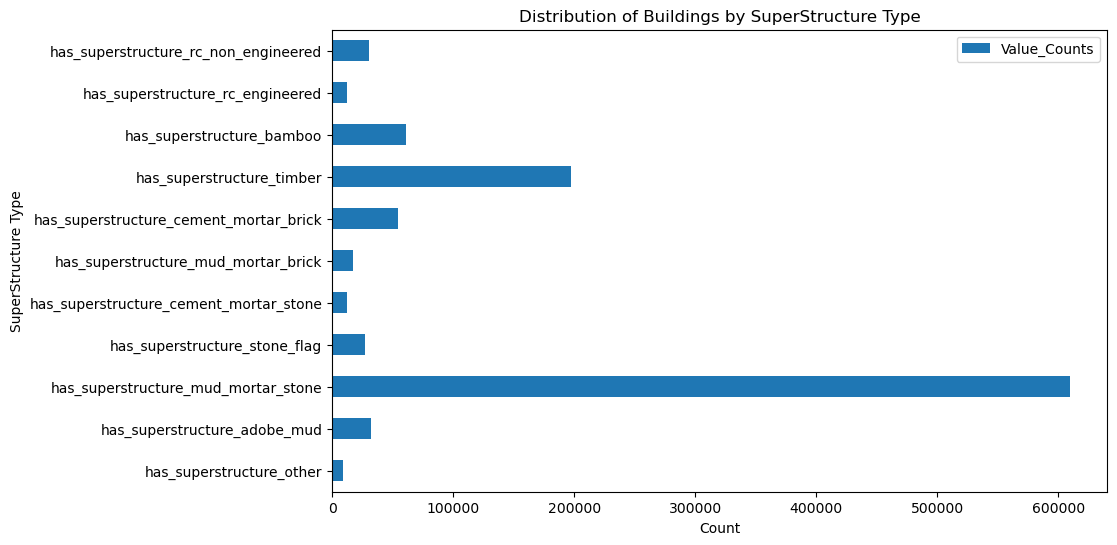

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the axis object
SuperStructure.plot.barh(ax=ax)

# Set the axis labels and title
ax.set_xlabel('Count')
ax.set_ylabel('SuperStructure Type')
ax.set_title('Distribution of Buildings by SuperStructure Type')
plt.show()

Once again we have a majority proportion of buildings utilising rudimental building materials, this time we see that the distribution of our building superstructure is overwhelmingly biased towards the mud mortar stone category.

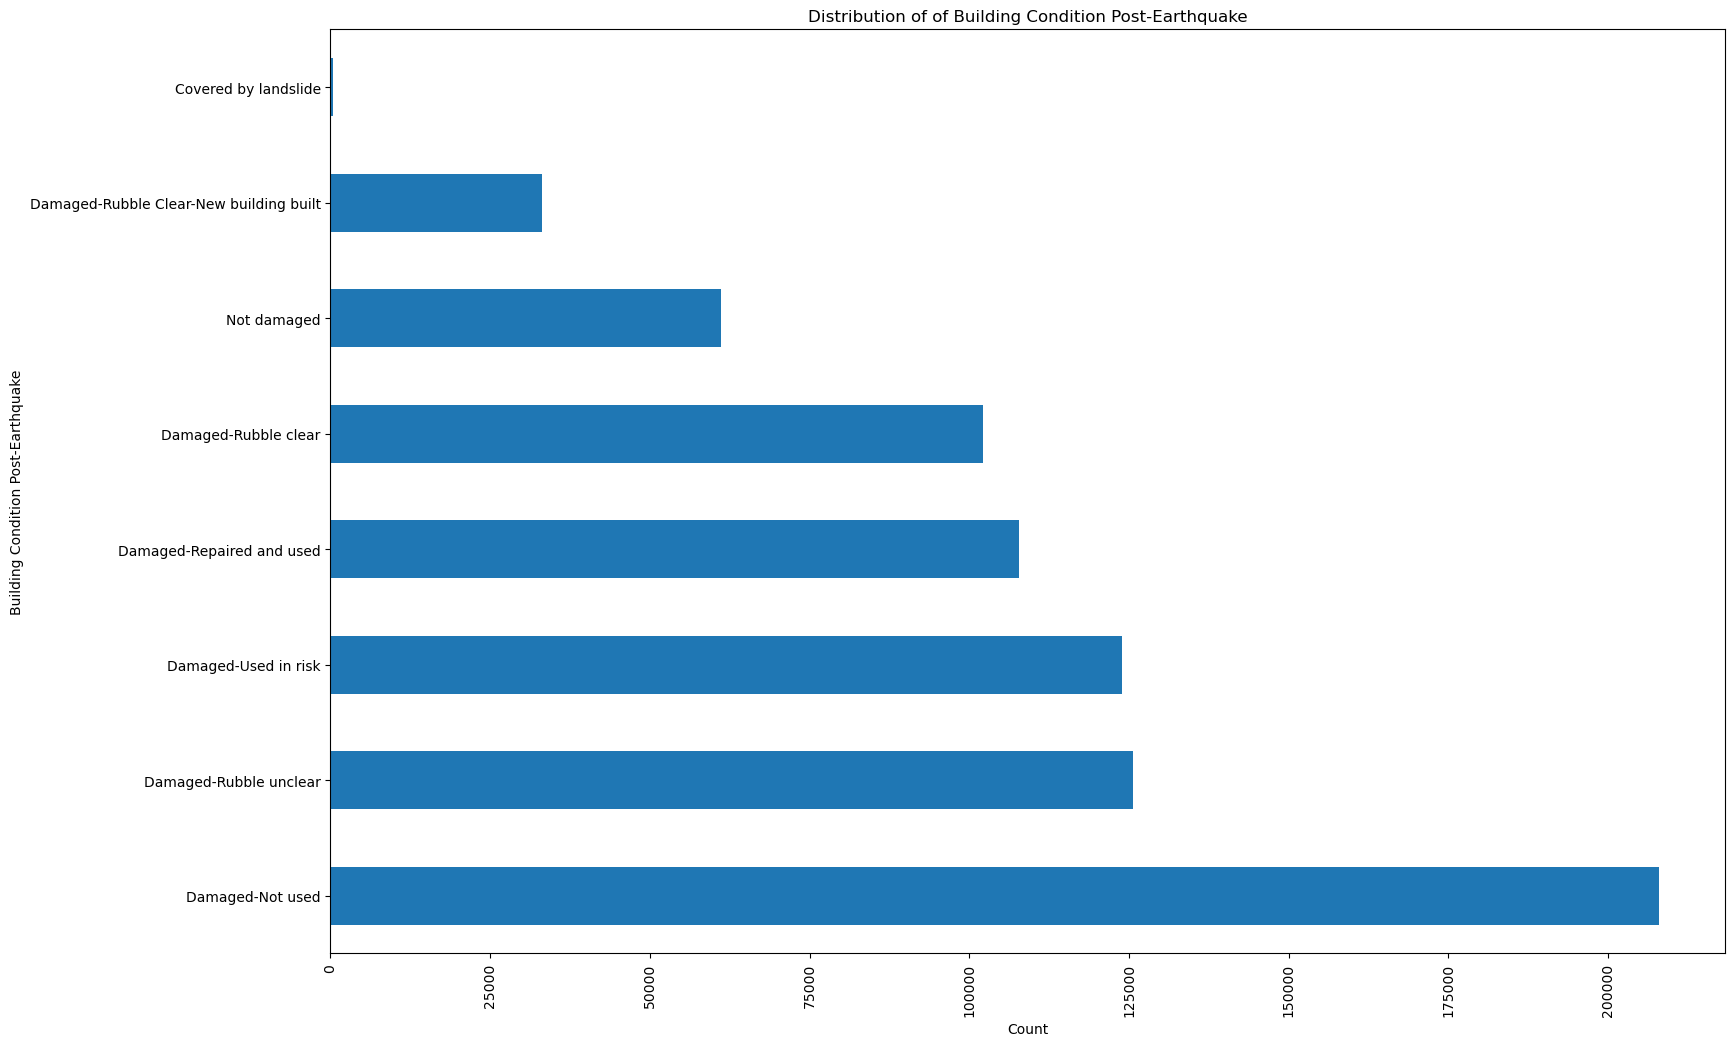

In [62]:
# Plotting the distribution of building condition after the earthquake.
BC = QuakesStructure['condition_post_eq'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))

BC.plot.barh()
plt.ylabel('Building Condition Post-Earthquake')
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.title('Distribution of of Building Condition Post-Earthquake')
plt.show()

In [63]:
QuakesStructure['condition_post_eq'].value_counts()

Damaged-Not used                           207968
Damaged-Rubble unclear                     125650
Damaged-Used in risk                       123849
Damaged-Repaired and used                  107797
Damaged-Rubble clear                       102191
Not damaged                                 61139
Damaged-Rubble Clear-New building built     33130
Covered by landslide                          382
Name: condition_post_eq, dtype: int64

Only around 60,000 of our buildings are classified as 'not damaged' according to the condition post eq column. 700,000 of the buildings are damaged according to this column, we will look closer at the damage grade column which is our answer key. This column could create some issues down the line if it's containing the same information as our answer key.

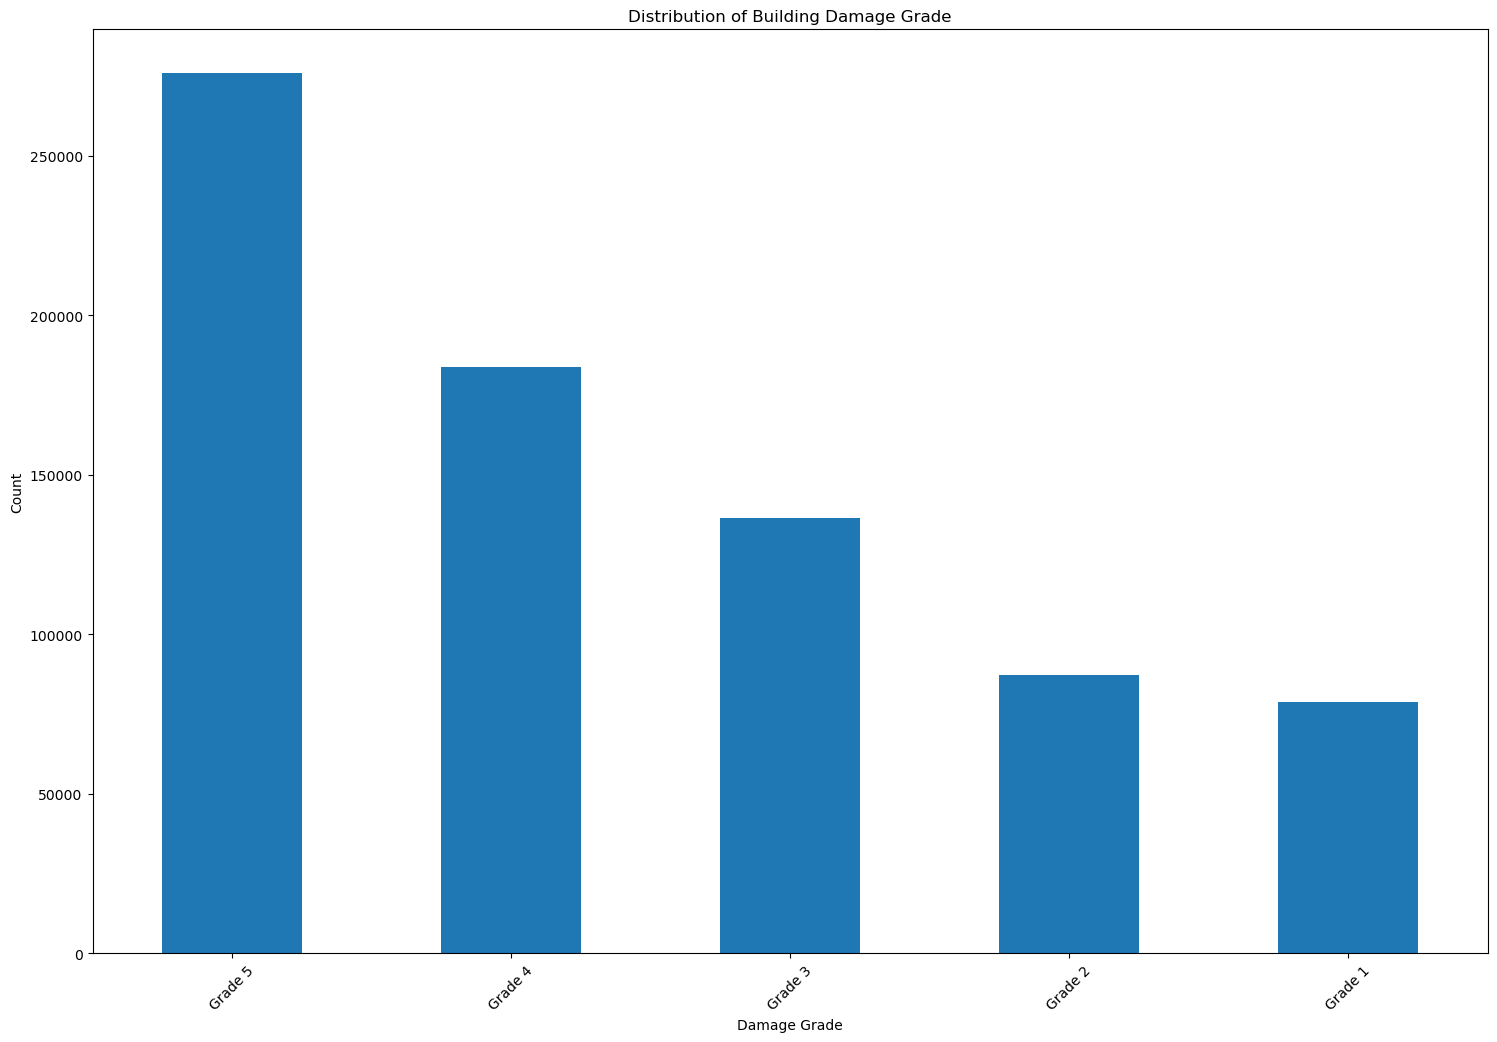

In [64]:
# Plotting the distribution of building damage grade.
DG = QuakesStructure['damage_grade'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
DG.plot.bar()
plt.xlabel('Damage Grade')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Building Damage Grade')
plt.show()

In [65]:
QuakesStructure['damage_grade'].value_counts()

Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: damage_grade, dtype: int64

Damage Grade will be the answer key for the project. We will need to binarise the values, it seems like a strange thing to do when the cost of an incorrect prediciton could be a human life, since there is nothing to suggest that buildings of damage grade 4 caused more fatalities than those with damage grade 3. We have another table containing information on the impact of the earthquake on each household, there is a column within this table which contains information on loss of life occurring in a 12 month window around the event of the earthquake. We could have investigated this column combined with the damage grade column to investigate the damage grades which were the most deadly, however, since this is such a broad window I am reluctant to attribute all loss of life to the earthquake itself. As such, we will not be combining these tables.

The data in our damage grade column is imbalanced, but grouping into binarised bins will help with this although it won't be perfect of course.

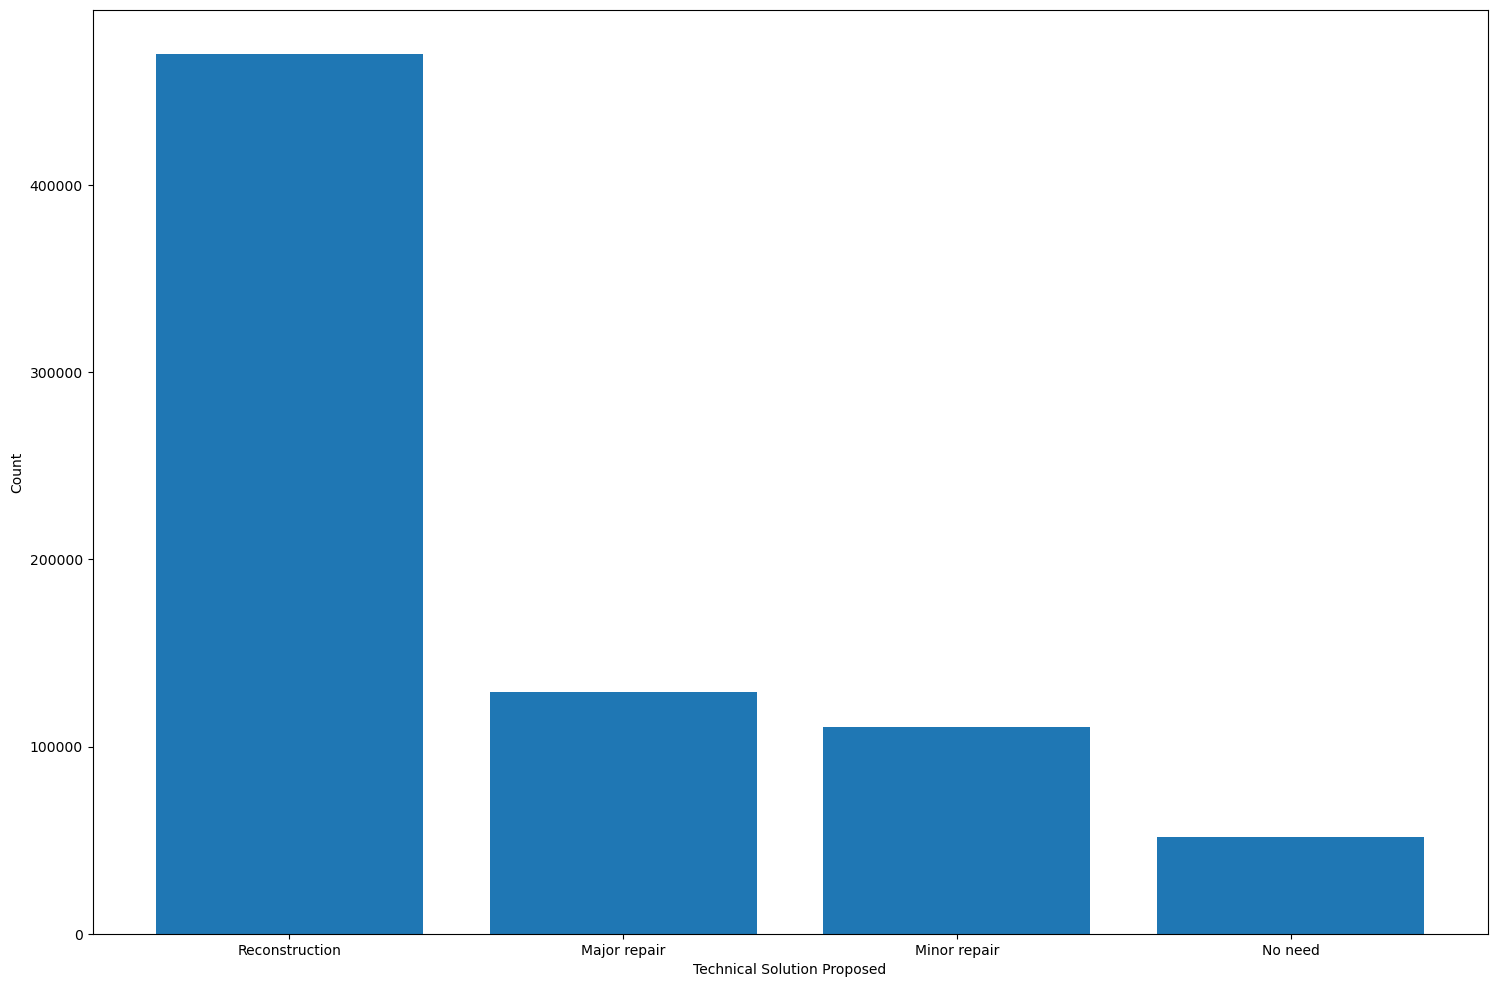

In [66]:
fig, ax = plt.subplots(figsize=(18, 12))
counts = QuakesStructure['technical_solution_proposed'].value_counts()
ax.bar(counts.index, counts.values)
ax.set_xlabel('Technical Solution Proposed')
ax.set_ylabel('Count')
plt.show()

In [67]:
QuakesStructure['technical_solution_proposed'].value_counts()

Reconstruction    470219
Major repair      129415
Minor repair      110605
No need            51855
Name: technical_solution_proposed, dtype: int64

A lot like the building condition post earthquake feature, this feature seems to contain information which is very closely linked to the answer key. We may have to keep an eye on this feature to avoid data leakage during the modelling phase of the project.

# Some of the key things that we've learnt through the visual EDA process include.

- Over 95% of all buildings in our dataframe are the same configuration (Rectangular). 
- We have a number of features which are too closely related to our answer key.
- The majority of buildings have been constructed using rudimental construction materials. 
- The average height of buildings before the earthquake was 16ft.
- The average age of buildings in the dataframe is 24 years old.
- The average footprint size of buildings in sqft is 406

# Data Cleaning 

Now that we have an understanding of how our features are looking and what information is stored within them we can start to address the few areas of the table which need cleaning.

In [68]:
QuakesStructure.isna().sum()

# First let's check for any missing values in our dataframe
# Let's take a closer look at the missing data from our 'damage_grade' column

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [69]:
# We'll start by creating a little dataframe of the records which have missing values in this column

Missing_Damage = pd.DataFrame(QuakesStructure[QuakesStructure['damage_grade'].isna()])

In [70]:
Missing_Damage

# Here's our dataframe

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
83766,203202000521,20,2009,200910,1,0,999,155,10,0,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131558,212402000211,21,2107,210703,2,2,22,456,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131579,212402000221,21,2107,210703,2,2,22,439,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131627,212402000071,21,2107,210703,2,2,4,456,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131629,212402000091,21,2107,210703,2,2,55,182,11,11,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131640,212402000201,21,2107,210703,2,2,3,528,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131652,212402000341,21,2107,210703,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131654,212402000361,21,2107,210703,2,2,7,450,15,15,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131655,212402000371,21,2107,210703,2,2,22,324,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131656,212402000381,21,2107,210703,2,2,11,360,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN


It looks like our records which are missing data for the `damage_grade` column are the same records which are missing values from our `technical_solution_proposed` column too! This could make it harder to justify keeping the records if it is difficult to impute accurate solutions since there is a bigger portion of data missing for these rows. We will do our best to find appropriate solutions. We can also see that one of our buildings has a recorded age of 999, this will also need further investigation. 

We can create two new dataframes in order to help fill our missing values from our damage grade column. This will involve converting the damage grade column into numerical data so that numpy functions can be used with the columns information. Once the data has been successfully converted, we can create a new dataframe which will be populated by buildings that have a recorded height which is the same both pre and post earthquake. Since 11 of our 12 missing values are recorded as having the same height both pre and post earthquake, it would make sense to cnosider the damage grade of similar buildings which share these attributes and impute the missing information accordingly.

In [71]:
copy = QuakesStructure.copy()

# let's copy our original dataframe to work through a proof of concept

In [72]:
copy.head(1)
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair


In [73]:
# remove the word "grade" from each value in the "damage_grade" column
copy['Damage_Grade'] = copy['damage_grade'].str.replace('Grade', '').str.strip()

In [74]:
copy.drop('damage_grade', axis=1, inplace=True)

# Now we can drop the old column

In [75]:
copy.head(1)
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3


In [76]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

Because of our NaN values we are unable to convert this column into anything other than object data at the moment, let's fill the NaNs with 0 as a place holder before converting.

In [77]:
copy['Damage_Grade'] = copy['Damage_Grade'].fillna(0)

# filling the NaN values with 0 placeholders 

In [78]:
copy.isna().sum()
# sanity check

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

We now have no missing values in our `Damage_Grade` column, but we still having missing data, it's just represented by a 0 now rather than a NaN

Now we can create a dataframe populated only by buildings that have matching heights before and after the earthquake.

In [79]:
# first, let's convert the column to integers
copy['Damage_Grade'] = copy['Damage_Grade'].astype(int)

Let's also check the mean `Damage_Grade` for the entire dataframe for reference.

In [80]:
# checking median damage grade for entire dataframe
np.median(copy['Damage_Grade'])

4.0

It looks like we could potentially impute our missing values with the median value for this particular columm. This would be a little bit of a lazy approach, let's dig a little deeper before we commit to any values.

In [81]:
match = copy[(copy['height_ft_pre_eq'] == copy['height_ft_post_eq'])]

# creating a new dataframe with only buildings which record the same height both pre and post Earthquake 

In [82]:
match.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,5
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,1


In [83]:
np.median(match['Damage_Grade'])
# checking the median damage grade for our height match dataframe

3.0

It looks like this little bit of EDA was well worth it! Now we can impute the missing values for the `Damage_Grade` of 11 of these buildings as a recorded damage grade of 3. We will impute all missing values once we have considered a methodolgy for each. For now, we need to consider what to do with our final missing value.

Our one remaining building has a recorded age of 999, this seems like an error since we have learnt that there are no temples in our dataframe. Let's see how many other examples there are of exceptionally old buildings in our dataframe.

In [84]:
AGEmatch = copy[copy['age_building'] == 999]
# creating a new dataframe populated by 999 year old buildings 

In [85]:
AGEmatch.head()
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
2004,120306000071,12,1208,120802,2,2,999,225,25,25,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,0,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,Minor repair,2
6113,120903000031,12,1207,120707,2,2,999,347,17,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Major repair,3
12068,121701000241,12,1207,120706,2,0,999,540,16,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,1,0,0,0,0,Damaged-Rubble unclear,Reconstruction,5
12090,121701000461,12,1207,120706,2,2,999,540,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,1,0,0,0,0,Damaged-Used in risk,Reconstruction,4
12124,121701000811,12,1207,120706,1,1,999,540,8,8,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,1,0,0,0,0,Damaged-Used in risk,Reconstruction,4


In [86]:
AGEmatch.shape
# count of 999 year old buildings

(3145, 31)

In [87]:
AGEmatch['foundation_type'].value_counts()
# foundation types for our 999 year old buildings 

Mud mortar-Stone/Brick    2826
Cement-Stone/Brick         221
RC                          60
Bamboo/Timber               35
Other                        3
Name: foundation_type, dtype: int64

To begin with, it appears that 281 of our 999yr old buildings have foundations constructed with cement and reinforced concrete, It seems unlikely that these building technologies had been invented before the 11th century.  It looks like we can adjust these records first ones first.

In [88]:
YOUTH = copy[copy['age_building'] != 999]
# Creating new dataframe populated by all buildings that are NOT 999 years old

In [89]:
YOUTHCement = YOUTH[YOUTH['foundation_type'] == 'Cement-Stone/Brick']
# All buildings NOT 999 with a foundation type 'Cement-Stone/Brick'

In [90]:
YOUTHCement.shape
# There are 39,024 buildings with these characteristics 

(39024, 31)

In [91]:
np.median(YOUTHCement['age_building'])
# Median age of buildings with these characteristics 

10.0

## We can impute the age for buildings which have an age of 999 and a foundation type of `Cement-Stone/Brick` as a new age of 10

Now let's investigate those with foundation type RC

In [92]:
YOUTHrc = YOUTH[YOUTH['foundation_type'] == 'RC']
# All buildings NOT 999 with a foundation type 'RC'

In [93]:
YOUTHrc.shape
# There are 32,060 buildings with these characteristics

(32060, 31)

In [94]:
np.median(YOUTHrc['age_building'])
# Median age of buildings with these characteristics 

6.0

## We can impute the age for buildings which have an age of 999 and a foundation type of `RC` as a new age of 6

Now let's investigate those with foundation type `Bamboo/Timber`

In [95]:
YOUTHbamboo = YOUTH[YOUTH['foundation_type'] == 'Bamboo/Timber']
# All buildings NOT 999 with a foundation type 'Bamboo/Timber'

In [96]:
YOUTHbamboo.shape
# There are 57,438 buildings with these characteristics

(57438, 31)

In [97]:
np.median(YOUTHbamboo['age_building'])
# Median age of buildings with these characteristics 

10.0

## We can impute the age for buildings which have an age of 999 and a foundation type of `Bamboo` as a new age of 10

Now let's investigate those with foundation type `Other`

In [98]:
YOUTHother = YOUTH[YOUTH['foundation_type'] == 'Other']
# All buildings NOT 999 with a foundation type 'Other'

In [99]:
YOUTHother.shape
# There are 4,549 buildings with these characteristics

(4549, 31)

In [100]:
np.median(YOUTHother['age_building'])
# Median age of buildings with these characteristics 

10.0

## We can impute the age for buildings which have an age of 999 and a foundation type of `Other` as a new age of 6

Now let's investigate those with foundation type `Mud mortar-Stone/Brick`

In [101]:
YOUTHmud = YOUTH[YOUTH['foundation_type'] == 'Mud mortar-Stone/Brick']
# All buildings NOT 999 with a foundation type 'Mud mortar-Stone/Brick'

In [102]:
YOUTHmud.shape
# There are 625,890 buildings with these characteristics

(625890, 31)

In [103]:
np.median(YOUTHmud['age_building'])
# Median age of buildings with these characteristics 

18.0

Here we could impute the 2826 missing values with the median building age of 18. Since we have a considerable amount of missing values for this category it may be best if we cross reference our building materials with the districts that these buildings belong to. We should get a little more granulated for this portion of buildings because these incorrect values represent more of the whole dataframe.

In [104]:
YOUTHmud['district_id'].value_counts()
# these are the different districts which have buildings of foundation type 'Mud mortar-Stone/Brick'

24    84141
23    82066
30    79477
28    70851
36    69049
22    57405
21    56635
31    49957
12    37456
20    28679
29    10174
Name: district_id, dtype: int64

These are the districts that we need to consider for our next approach

In [105]:
YOUTHmud24 = YOUTHmud[YOUTHmud['district_id'] == 24]
# Buildings with foundation type mud, AND found in district 24, AND NOT 999 years old

In [106]:
np.median(YOUTHmud24['age_building'])
# Median age of buildings with these characteristics 

22.0

In [107]:
YOUTHmud23 = YOUTHmud[YOUTHmud['district_id'] == 23]
# Buildings with foundation type mud, AND found in district 23, AND NOT 999 years old

In [108]:
np.median(YOUTHmud23['age_building'])
# Median age of buildings with these characteristics 

19.0

In [109]:
YOUTHmud30 = YOUTHmud[YOUTHmud['district_id'] == 30]
# Buildings with foundation type mud, AND found in district 30, AND NOT 999 years old

In [110]:
np.median(YOUTHmud30['age_building'])
# Median age of buildings with these characteristics 

20.0

In [111]:
YOUTHmud28 = YOUTHmud[YOUTHmud['district_id'] == 28]
# Buildings with foundation type mud, AND found in district 28, AND NOT 999 years old

In [112]:
np.median(YOUTHmud28['age_building'])
# Median age of buildings with these characteristics 

20.0

In [113]:
YOUTHmud36 = YOUTHmud[YOUTHmud['district_id'] == 36]
# Buildings with foundation type mud, AND found in district 36, AND NOT 999 years old

In [114]:
np.median(YOUTHmud36['age_building'])
# Median age of buildings with these characteristics 

20.0

In [115]:
YOUTHmud22 = YOUTHmud[YOUTHmud['district_id'] == 22]
# Buildings with foundation type mud, AND found in district 22, AND NOT 999 years old

In [116]:
np.median(YOUTHmud22['age_building'])
# Median age of buildings with these characteristics 

17.0

In [117]:
YOUTHmud21 = YOUTHmud[YOUTHmud['district_id'] == 21]
# Buildings with foundation type mud, AND found in district 21, AND NOT 999 years old

In [118]:
np.median(YOUTHmud21['age_building'])
# Median age of buildings with these characteristics 

16.0

In [119]:
YOUTHmud31 = YOUTHmud[YOUTHmud['district_id'] == 31]
# Buildings with foundation type mud, AND found in district 31, AND NOT 999 years old

In [120]:
np.median(YOUTHmud31['age_building'])
# Median age of buildings with these characteristics 

15.0

In [121]:
YOUTHmud12 = YOUTHmud[YOUTHmud['district_id'] == 12]
# Buildings with foundation type mud, AND found in district 12, AND NOT 999 years old

In [122]:
np.median(YOUTHmud12['age_building'])
# Median age of buildings with these characteristics 

15.0

In [123]:
YOUTHmud20 = YOUTHmud[YOUTHmud['district_id'] == 20]
# Buildings with foundation type mud, AND found in district 20, AND NOT 999 years old

In [124]:
np.median(YOUTHmud20['age_building'])
# Median age of buildings with these characteristics 

15.0

In [125]:
YOUTHmud29 = YOUTHmud[YOUTHmud['district_id'] == 29]
# Buildings with foundation type mud, AND found in district 29, AND NOT 999 years old

In [126]:
np.median(YOUTHmud29['age_building'])
# Median age of buildings with these characteristics 

15.0

## LETS DO SOME IMPUTING

In [127]:
test = QuakesStructure
# back to our proof of concept test dataframe

In [128]:
test.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [129]:
test = test[test['age_building'] == 999]
# reducing it to only buildings of age 999

In [130]:
test['age_building'].value_counts()
# sanity check

999    3145
Name: age_building, dtype: int64

In [131]:
test.loc[(test['district_id'] == 24) & 
       (test['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (test['age_building'] == 999), 'age_building'] = 22

The code above is locating all records in our test dataframe that have a recorded age of 999, a foundation type of 'Mud mortar-Stone/Brick' and are located in district 24. It then updates their age from 999 to 22 which was the median age we discovered during our exploration.

In [132]:
test['age_building'].value_counts()
# sanity check

999    2172
22      973
Name: age_building, dtype: int64

This method works perfectly, we will apply it to the original dataframe once we have determined an approach for the remaining issues within the data.

### NOW LET'S LOOK AT THE PROPOSED SOLUTIONS 

In [133]:
Missing_Solution = pd.DataFrame(QuakesStructure[QuakesStructure['technical_solution_proposed'].isna()])
# creating a new df for records with missing 'technical_solution_proposed' values

In [134]:
Missing_Solution.head()
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
83766,203202000521,20,2009,200910,1,0,999,155,10,0,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,NaN
131558,212402000211,21,2107,210703,2,2,22,456,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131579,212402000221,21,2107,210703,2,2,22,439,14,14,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131627,212402000071,21,2107,210703,2,2,4,456,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN
131629,212402000091,21,2107,210703,2,2,55,182,11,11,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,NaN,NaN


Since the median damage grade for buildings which had the same recorded height both before and after the earthquake was 3, we can use this information of impute the missing technical solution values for the 11 records which have the same recorded height pre and post earthquake. Let's take a look at the distribution of technical solution proposed for buildings which match our criteria for the 11.

In [135]:
Damage3 = match[match['Damage_Grade'] == 3]
# df of only damage grade 3 and matching pre/post eq height

In [136]:
Damage3['technical_solution_proposed'].value_counts()
# value counts for tech solution 

Major repair      97023
Reconstruction    22384
Minor repair       9061
No need              53
Name: technical_solution_proposed, dtype: int64

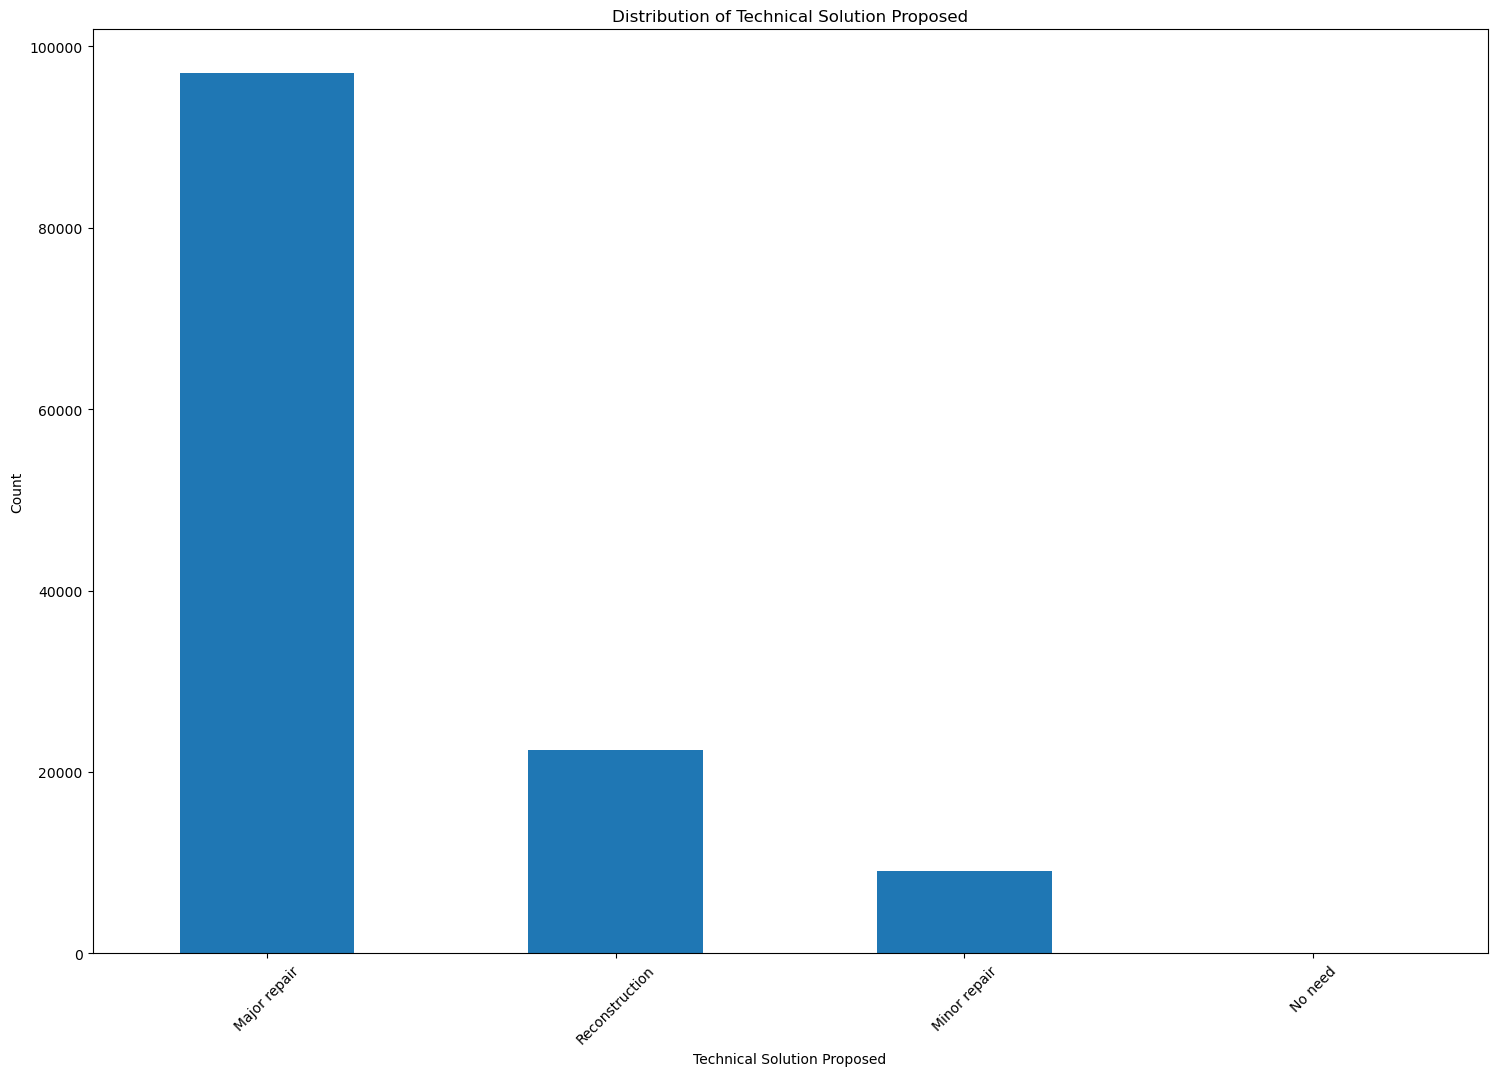

In [137]:
# Here we can visualise the value counts to inform our imputation
PLOT = Damage3['technical_solution_proposed'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
PLOT.plot.bar()
plt.xlabel('Technical Solution Proposed')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Technical Solution Proposed')
plt.show()

This is a plot displaying the proposed technical solutions to buildings with a Damage grade value of 3 AND that are measured as having the same height both pre and post earthquake. The majority of buildings matching this criteria have been assigned the technical solution of Major repair. Let's take a look at the solutions propsed to all buildings regardless of their damage grade.

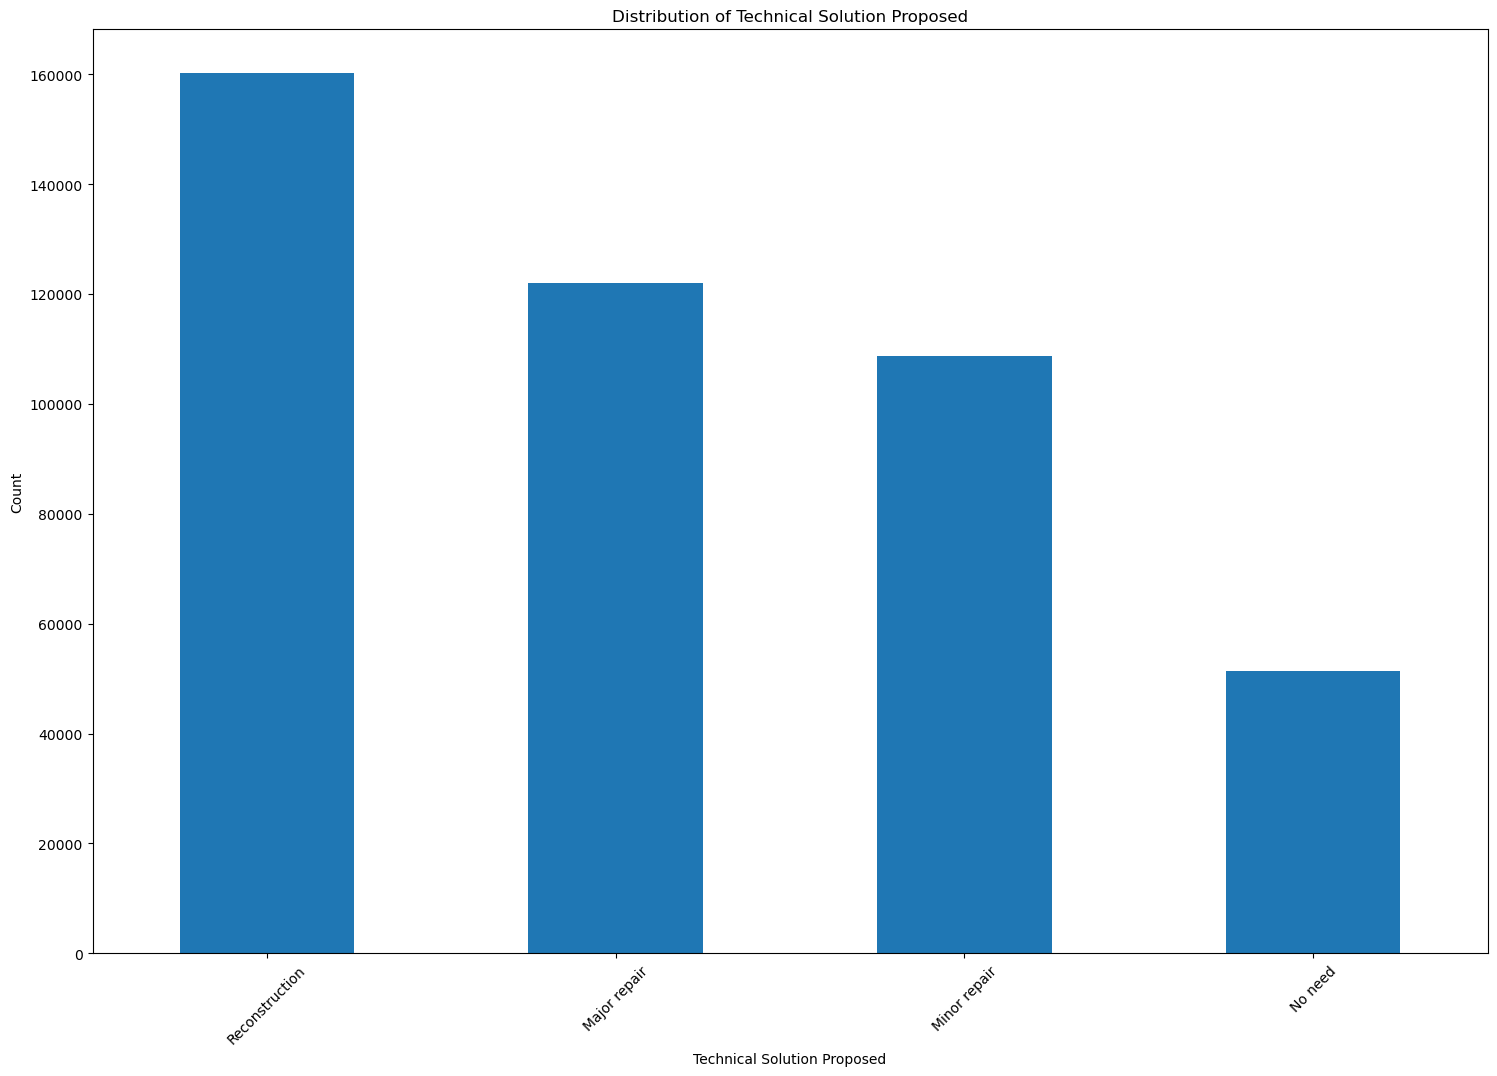

In [138]:
PLOT2 = match['technical_solution_proposed'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
PLOT2.plot.bar()
plt.xlabel('Technical Solution Proposed')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Technical Solution Proposed')
plt.show()

The plot above shows the distribution of technical solutions proposed for buildings of ALL damage grades which have a recorded height which is the same both pre and post earthquake. As expected, the plots are varied massively, it may be best if we impute our missing values using the first plot for the 11 of our missing records for the Technical Solution column.

DEALING WITH THE 999 NaN row

In [139]:
flattened = copy[copy['height_ft_post_eq'] == 0]
# creating a df of buildings recorded as having a height of 0 post earthquake

In [140]:
flattened['Damage_Grade'].value_counts()
# Value counts for Damage Grade of this new df

5    261353
0         1
Name: Damage_Grade, dtype: int64

We can see that the only record which doesn't have a Damage Grade of 5 in our flattened df is the building which we imputed its NaN with a 0. This makes it very easy for us to impute the damage grade of the 999 year old building with NaN values. There may be some columns with multicolinearity which may cause complications when modelling later on.

We will impute the missing Damage_Grade value for the 999 year old building with a 5 

In [141]:
flattened['technical_solution_proposed'].value_counts()
# Value counts for technical_solution_proposed of this new df

Reconstruction    261353
Name: technical_solution_proposed, dtype: int64

Once again the imputation for this building in the technical_solution_proposed column will be simple.

In [142]:
Missing_Position = pd.DataFrame(copy[copy['position'].isna()])
# Creating a new df of the single record which has a missing value in the 'position' column

In [143]:
Missing_Position
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
131652,212402000341,21,2107,210703,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,0


We have located our record with the missing plan_configuration too! Great!

Now let's check the plan config of similar buildings to determine how to impute the missing data here. It's quite an old building, this might help us!

In [144]:
AGEmatch84 = copy[copy['age_building'] == 84]
# Creating a dataframe of buildings aged 84

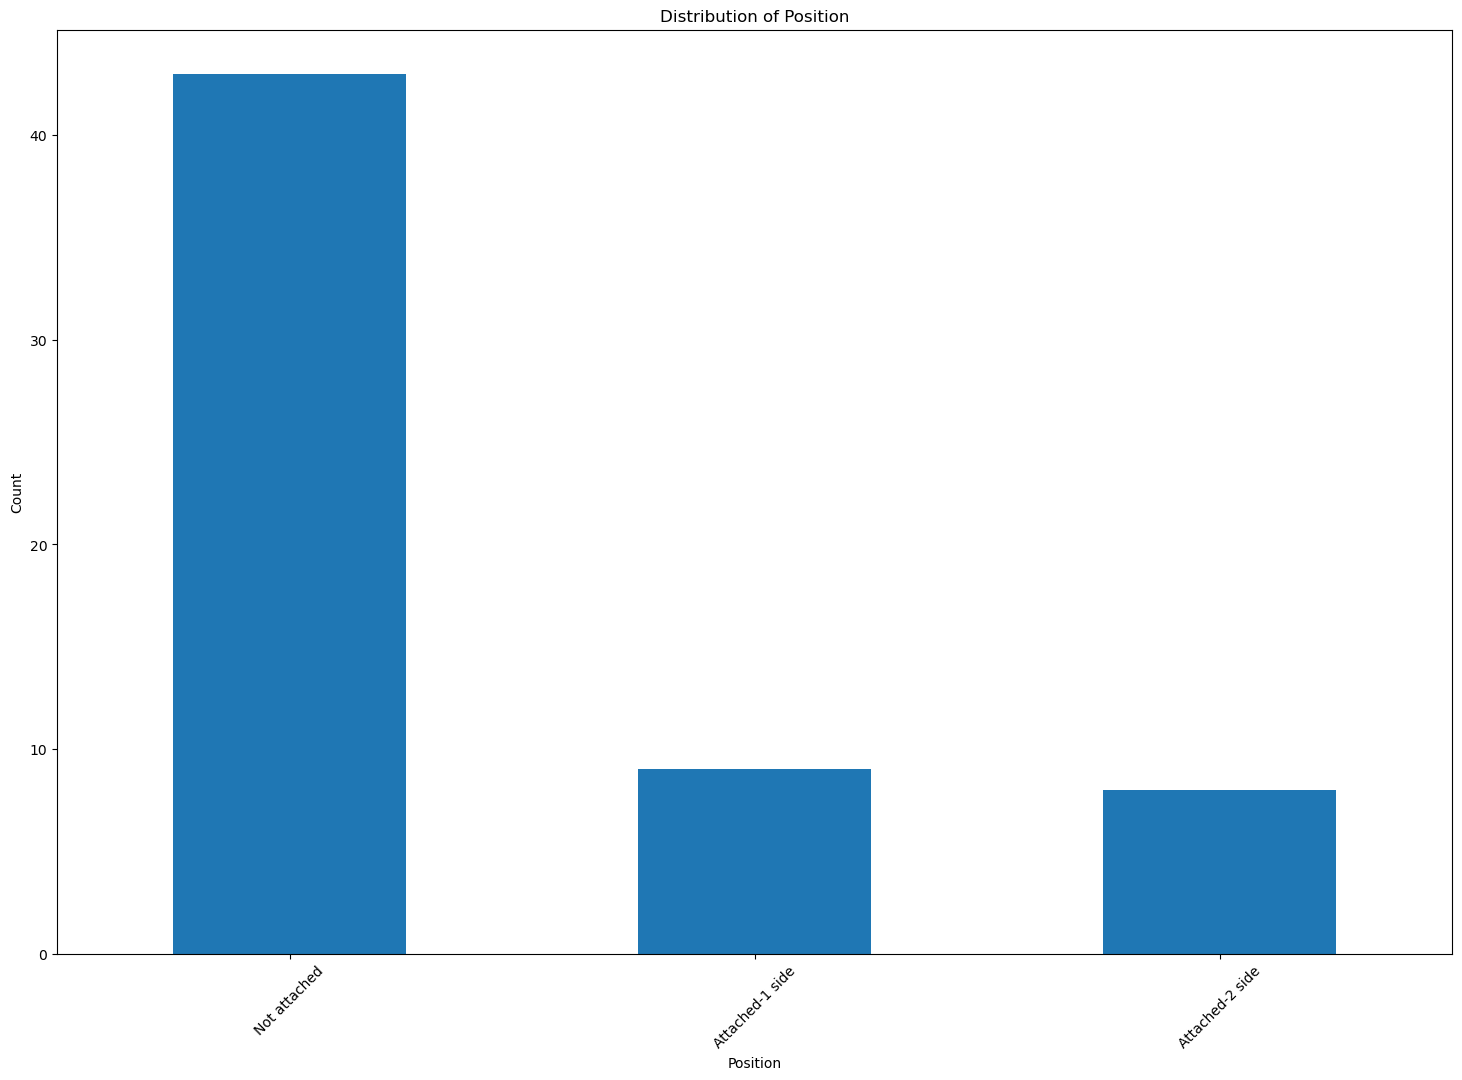

In [145]:
# Plotting the positions of buildings aged 84
PLOT84 = AGEmatch84['position'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
PLOT84.plot.bar()
plt.xlabel('Position')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Position')
plt.show()

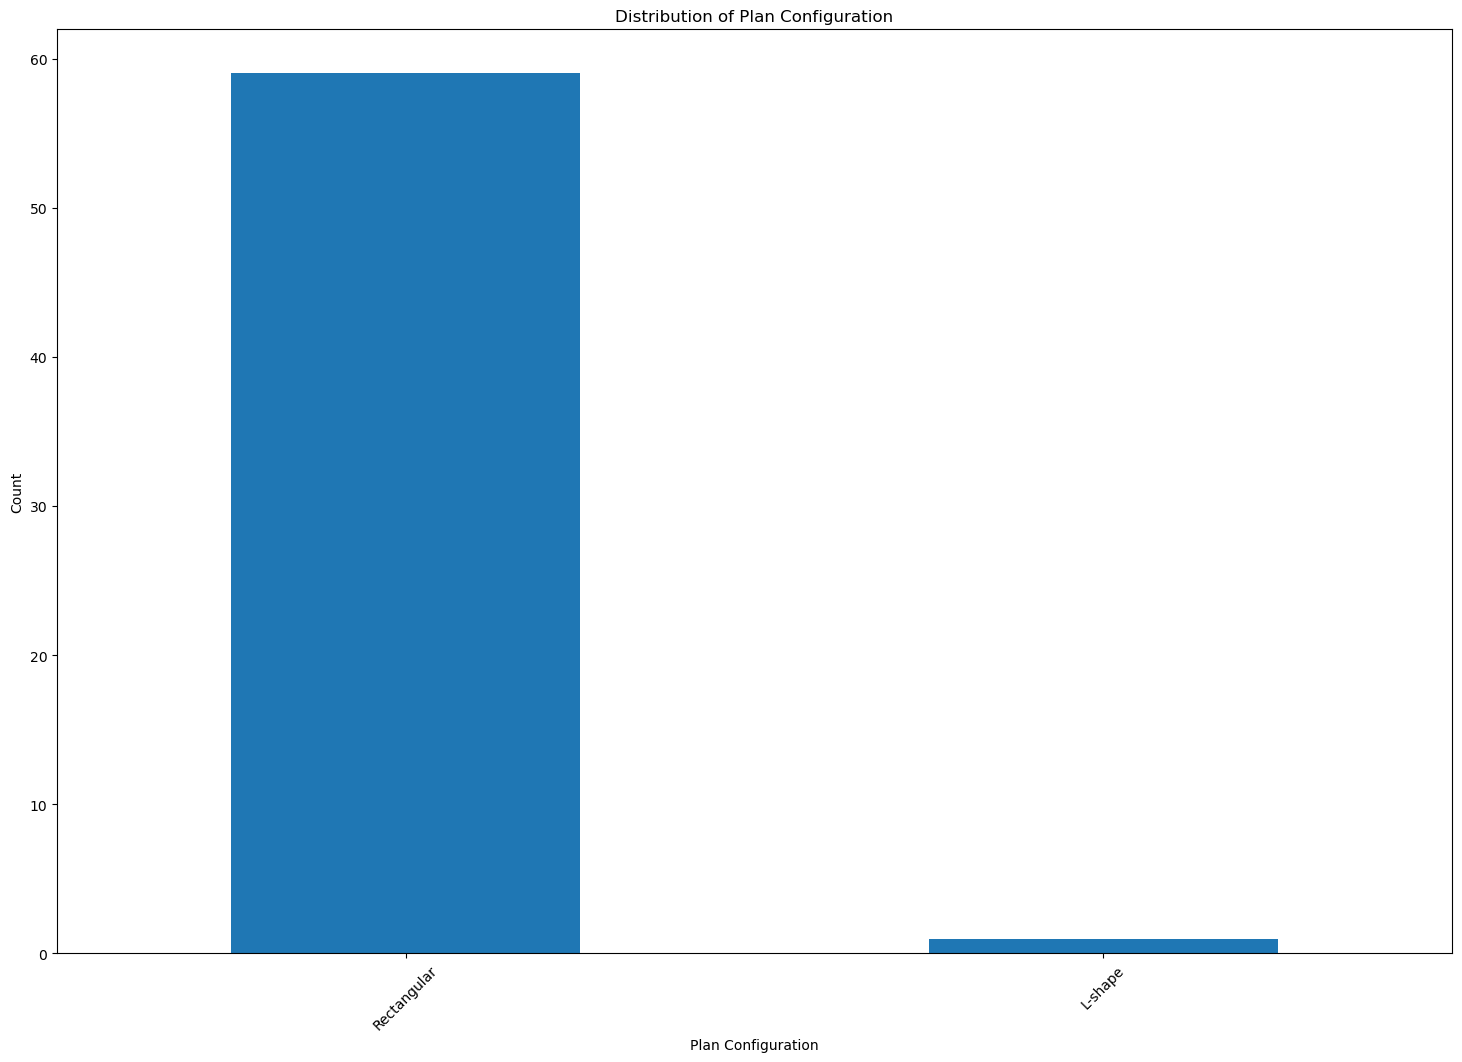

In [146]:
# Plotting the plan configurations of buildings aged 84

PLOT84config = AGEmatch84['plan_configuration'].value_counts()
fig, ax = plt.subplots(figsize=(18, 12))
PLOT84config.plot.bar()
plt.xlabel('Plan Configuration')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Plan Configuration')
plt.show()

Looking at the data it's likely that our 84 year old building is a rectangle shape and is not attached to other buildings. Now that we have a plan of action for our NaN and possibly incorrect values. We can start imputing.

We used a copy of the main dataframe to work though our imputation proces as a proof of concept. Now that we know all of our imputations can be made using appropriate methodolgy, let's apply these changes to our actual dataframe.

In [147]:
copy.head(1)

# This was our proof of concept.

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3


In [148]:
QuakesStructure.head(1)

# This is the real deal.

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair


Let's start by creating a column of integer values for our already existing 'Damage Grade'

In [149]:
QuakesStructure.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [150]:
QuakesStructure['Damage_Grade'] = QuakesStructure['damage_grade'].str.replace('Grade', '').str.strip()
# Creating a new column for damage grade containing only the number 

In [151]:
QuakesStructure.drop('damage_grade', axis=1, inplace=True)
# dropping the original column

In [152]:
copy.info()
# sanity checking the drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [153]:
QuakesStructure['Damage_Grade'] = QuakesStructure['Damage_Grade'].fillna(0)

# filling the NaN values with 0 placeholders 

In [154]:
# first, let's convert the column to integers
QuakesStructure['Damage_Grade'] = QuakesStructure['Damage_Grade'].astype(int)

In [155]:
QuakesStructure.isna().sum()
# Now we have no NaNs in this column, we do however have 0s which need addressing

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

As we saw earlier, 11/12 of our NaN values are to be imputed with 3 in damage grade and the last is to be imputed with 5. Let's fill them using .loc

In [156]:
lemmesee = QuakesStructure[QuakesStructure['building_id'] == 203202000521]
# locating the building which will have DG of 5 imputed

In [157]:
lemmesee
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
83766,203202000521,20,2009,200910,1,0,999,155,10,0,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,0


There is only one record with the building_id of 203202000521 so imputation should be easy

In [158]:
QuakesStructure.loc[(QuakesStructure['building_id'] == 203202000521), 'Damage_Grade'] = 5
# Updating the damage grade of our building to 5

In [159]:
lemmesee = QuakesStructure[QuakesStructure['building_id'] == 203202000521]
lemmesee
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
83766,203202000521,20,2009,200910,1,0,999,155,10,0,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,5


In [160]:
QuakesStructure.loc[(QuakesStructure['building_id'] == 203202000521), 'technical_solution_proposed'] = 'Reconstruction'
# Updating the technical solution of our building to 'Reconstruction'

In [161]:
lemmesee = QuakesStructure[QuakesStructure['building_id'] == 203202000521]
lemmesee
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
83766,203202000521,20,2009,200910,1,0,999,155,10,0,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Reconstruction,5


In [162]:
QuakesStructure.isna().sum()
# further sanity check

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

There are still 11 records in the `Damage_Grade` column which have a value of 0. We need to impute these to 3 based on the EDA done earlier in the workbook.

In [163]:
QuakesStructure.loc[(QuakesStructure['Damage_Grade'] == 0), 'Damage_Grade'] = 3
QuakesStructure['Damage_Grade'].value_counts()
# locating the final missing values from DG column and imputing with 3 + sanity check

5    275767
4    183844
3    136423
2     87257
1     78815
Name: Damage_Grade, dtype: int64

Now let's tackle the building with the missing `position` and `plan_configuration`

In [164]:
gotcha = QuakesStructure[QuakesStructure['building_id'] == 212402000341]
gotcha
# Here we are just making sure this is a unique building ID

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
131652,212402000341,21,2107,210703,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,NaN,3


In [165]:
QuakesStructure['plan_configuration'].value_counts()

Rectangular                        731257
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [166]:
QuakesStructure['position'].value_counts()

Not attached       604453
Attached-1 side    129432
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

The majority of buildings which were 84 years old were 'Rectangular' in configuration and 'Not attached' in position.

In [167]:
QuakesStructure.loc[(QuakesStructure['building_id'] == 212402000341), 'position'] = 'Not attached'
QuakesStructure.loc[(QuakesStructure['building_id'] == 212402000341), 'plan_configuration'] = 'Rectangular'
# Imputing the missing values

In [168]:
QuakesStructure.isna().sum()
# Sanity check

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   0
plan_configuration                         0
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

Just the proposed solutions to go and then we can adjust our suspicious building ages.

In [169]:
QuakesStructure['technical_solution_proposed'].value_counts()
# We concluded that 'Major repair' was the most appropriate value to use

Reconstruction    470220
Major repair      129415
Minor repair      110605
No need            51855
Name: technical_solution_proposed, dtype: int64

In [170]:
QuakesStructure['technical_solution_proposed'] = QuakesStructure['technical_solution_proposed'].fillna('Major repair')
# Imputing our missing values

In [171]:
QuakesStructure.isna().sum()
# sanity check

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

In [172]:
furthersanitycheck = QuakesStructure[QuakesStructure['building_id'] == 212402000071]
furthersanitycheck
#further sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
131627,212402000071,21,2107,210703,2,2,4,456,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Major repair,3


That is all our missing information imputed successfully and in an appropriate fashion. We should always aim to avoid dropping information if possible.

# We will now begin updating the building ages that were recorded as 999 years old. We will use the values that we found during the earlier stages of EDA

In [173]:
sneakpeek = QuakesStructure[(QuakesStructure['foundation_type'] == 'Cement-Stone/Brick') & 
                            (QuakesStructure['age_building'] == 999)]
# Creating a small dataframe to use as a sanity check
sneakpeek.shape

(221, 31)

In [174]:
sneakpeek.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
31131,124408001131,12,1207,120704,2,2,999,300,12,12,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,Not damaged,No need,1
164608,215401001011,21,2104,210407,2,2,999,323,16,16,Moderate slope,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,0,1,0,0,0,1,1,0,0,0,Not damaged,No need,1
203659,223107001151,22,2203,220304,3,0,999,330,19,0,Flat,Cement-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Reconstruction,5
285625,235007000381,23,2306,230604,1,0,999,545,6,0,Flat,Cement-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,5
318026,240202000281,24,2410,241011,2,2,999,336,24,24,Flat,Cement-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,Damaged-Not used,Major repair,2


In [175]:
QuakesStructure.loc[(QuakesStructure['foundation_type'] == 'Cement-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 10

# Updating building age for buildings fitting the above criteria 

In [176]:
sneakpeek = QuakesStructure[(QuakesStructure['foundation_type'] == 'Cement-Stone/Brick') & 
                            (QuakesStructure['age_building'] == 999)]
sneakpeek.shape
# sanity check

(0, 31)

# NEXT

In [177]:
sneakpeek2 = QuakesStructure[(QuakesStructure['foundation_type'] == 'RC') & 
                             (QuakesStructure['age_building'] == 999)]
# Creating a small dataframe to use as a sanity check
sneakpeek2.shape

(60, 31)

In [178]:
sneakpeek2.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
325241,240610020801,24,2401,240107,5,5,999,1025,40,40,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-2 side,Rectangular,0,0,0,0,0,1,0,0,0,0,0,Not damaged,No need,1
325243,240610020821,24,2401,240107,3,3,999,575,27,27,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,0,0,0,0,0,1,0,0,0,0,0,Not damaged,No need,1
325244,240610020822,24,2401,240107,5,5,999,1062,45,45,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-2 side,Rectangular,0,0,0,0,0,1,0,0,0,0,0,Not damaged,No need,1
325245,240610020823,24,2401,240107,5,5,999,885,45,45,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-2 side,Rectangular,0,0,0,0,0,1,0,0,0,0,0,Not damaged,No need,1
325260,240610020951,24,2401,240107,6,6,999,945,54,54,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-2 side,Rectangular,0,0,0,0,0,1,0,0,1,0,0,Not damaged,No need,1


In [179]:
QuakesStructure.loc[(QuakesStructure['foundation_type'] == 'RC') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 6
# Updating building age for buildings fitting the above criteria 

In [180]:
sneakpeek2 = QuakesStructure[(QuakesStructure['foundation_type'] == 'RC') & 
                             (QuakesStructure['age_building'] == 999)]
sneakpeek2.shape
# sanity check

(0, 31)

# NEXT

In [181]:
sneakpeek3 = QuakesStructure[(QuakesStructure['foundation_type'] == 'Bamboo/Timber') & 
                             (QuakesStructure['age_building'] == 999)]
# Creating a small dataframe to use as a sanity check
sneakpeek3.shape

(35, 31)

In [182]:
sneakpeek3.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
2004,120306000071,12,1208,120802,2,2,999,225,25,25,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,0,0,0,0,0,1,1,0,0,0,Damaged-Used in risk,Minor repair,2
83766,203202000521,20,2009,200910,1,0,999,155,10,0,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Reconstruction,5
103946,205103000012,20,2001,200111,2,2,999,360,14,14,Flat,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,0,0,0,0,0,0,1,0,0,0,Not damaged,No need,1
103979,205103000271,20,2001,200111,2,0,999,420,13,0,Flat,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,0,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built,Reconstruction,5
335670,241905000541,24,2409,240909,2,1,999,375,16,8,Flat,Bamboo/Timber,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,0,1,Damaged-Repaired and used,Major repair,3


In [183]:
QuakesStructure.loc[(QuakesStructure['foundation_type'] == 'Bamboo/Timber') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 10
# Updating building age for buildings fitting the above criteria 

In [184]:
sneakpeek3 = QuakesStructure[(QuakesStructure['foundation_type'] == 'Bamboo/Timber') & 
                             (QuakesStructure['age_building'] == 999)]
sneakpeek3.shape
# sanity check

(0, 31)

# NEXT

In [185]:
sneakpeek4 = QuakesStructure[(QuakesStructure['foundation_type'] == 'Other') & 
                             (QuakesStructure['age_building'] == 999)]
# Creating a small dataframe to use as a sanity check
sneakpeek4.shape

(3, 31)

In [186]:
sneakpeek4.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade
335667,241905000501,24,2409,240909,1,1,999,400,12,12,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Square,0,0,0,0,0,0,0,0,0,0,1,Damaged-Not used,Reconstruction,5
648631,312309000481,31,3106,310604,1,1,999,351,14,14,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,0,0,0,0,0,1,0,0,0,0,Not damaged,No need,1
648638,312309000551,31,3106,310604,1,1,999,243,12,12,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,0,0,0,0,0,1,0,0,0,0,Damaged-Repaired and used,Minor repair,1


In [187]:
QuakesStructure.loc[(QuakesStructure['foundation_type'] == 'Other') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 6
# Updating building age for buildings fitting the above criteria 

In [188]:
sneakpeek4 = QuakesStructure[(QuakesStructure['foundation_type'] == 'Other') & 
                             (QuakesStructure['age_building'] == 999)]
sneakpeek4.shape
# sanity check

(0, 31)

Now we need to address the buildings with a foundation type of 'Mud mortar-Stone/Brick', there will be a slightly different approach for these buildings. Once again, thanks to our earlier EDA we know exactly what we need to update each of our building ages to.

In [189]:
nineninenine = QuakesStructure[QuakesStructure['age_building'] == 999]
# Creating a small dataframe to use as a sanity check
nineninenine.shape

(2826, 31)

In [190]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 24) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 22
# Updating building age for buildings fitting the above criteria 

In [191]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 31) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 19
# Updating building age for buildings fitting the above criteria 

In [192]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 36) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 20
# Updating building age for buildings fitting the above criteria 

In [193]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 23) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 20
# Updating building age for buildings fitting the above criteria 

In [194]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 30) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 20
# Updating building age for buildings fitting the above criteria 

In [195]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 28) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 17
# Updating building age for buildings fitting the above criteria 

In [196]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 29) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 16
# Updating building age for buildings fitting the above criteria 

In [197]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 22) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 15
# Updating building age for buildings fitting the above criteria 

In [198]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 21) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 15
# Updating building age for buildings fitting the above criteria 

In [199]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 12) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 15
# Updating building age for buildings fitting the above criteria 

In [200]:
QuakesStructure.loc[(QuakesStructure['district_id'] == 20) & 
       (QuakesStructure['foundation_type'] == 'Mud mortar-Stone/Brick') & 
       (QuakesStructure['age_building'] == 999), 'age_building'] = 15
# Updating building age for buildings fitting the above criteria 

In [201]:
nineninenine = QuakesStructure[QuakesStructure['age_building'] == 999]
# Creating a small dataframe to use as a sanity check
nineninenine.shape

(0, 31)

It looks like the updated ages have been a success.

In [202]:
QuakesStructure.isna().sum()
# sanity checking for no NaN values 

building_id                               0
district_id                               0
vdcmun_id                                 0
ward_id                                   0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar

### Imputation Methodology

It is important to mention the methodolgy which underpinned the imputation of our missing and incorrect data during the above section of the notebook. Adjusting building age based on building materials is an appropriate method for cleaning data since examination of building materials is often how research is conducted in the realm of investigative archeology.

We also looked at localised areas and building materials used, this is because different areas use different building materials.

Now that we have addressed the NaN values, we can turn our attention to our columns of categorical data. We will need to encode these columns to make our data more ML modelling friendly.

In [203]:
QuakesStructure.info()
# We will be using a one hot encoder on the columns containing Dtype 'object'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

One hot encoding is used to represent categorical data as numerical data, which is required by many machine learning algorithms, and it helps maintain the independence and equality of importance of categories, while reducing the impact of dimensionality. We will pull out each categorical value from a column and essentially turn it into its own column containing binarised data.

We will start with the 'foundation_type' column. It will be important to drop one of the newly created features for each of the columns we encode to avoid falling into the dummy trap, we can do this at any stage before modelling.

In [204]:
ohe = OneHotEncoder()
# initialising the encoder

In [205]:
foundation_type = pd.DataFrame(QuakesStructure['foundation_type'])
encoded = ohe.fit_transform(foundation_type)
encoded
# fitting the encoder to our 'foundation_type' column. It spits out a sparse matrix.

<762106x5 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [206]:
dense_array = encoded.toarray()
dense_array
# we can turn our sparse matrix into a dense array in order to fit it back into the original df

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [207]:
ohe.categories_
# ohe keeps hold of the categorical information for new feature names

[array(['Bamboo/Timber', 'Cement-Stone/Brick', 'Mud mortar-Stone/Brick',
        'Other', 'RC'], dtype=object)]

In [208]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [209]:
# Add original back in (just to check)
encoded_df['foundation_type'] = QuakesStructure['foundation_type']

In [210]:
# We can see the new encoded values side by side with the old categorical ones
encoded_df.sample(10)

,Bamboo/Timber,Cement-Stone/Brick,Mud mortar-Stone/Brick,Other,RC,foundation_type
206317,0,0,1,0,0,Mud mortar-Stone/Brick
420987,0,0,1,0,0,Mud mortar-Stone/Brick
431557,0,0,1,0,0,Mud mortar-Stone/Brick
429094,0,0,1,0,0,Mud mortar-Stone/Brick
279515,0,0,1,0,0,Mud mortar-Stone/Brick
707869,0,0,1,0,0,Mud mortar-Stone/Brick
146888,0,0,1,0,0,Mud mortar-Stone/Brick
589111,0,0,1,0,0,Mud mortar-Stone/Brick
700972,0,0,1,0,0,Mud mortar-Stone/Brick
99818,0,0,1,0,0,Mud mortar-Stone/Brick


In [211]:
encoded_df.drop(['foundation_type'], axis = 1, inplace = True)
# dropping the old categorical values

In [212]:
encoded_df.head()
# our new foundation encoded df

,Bamboo/Timber,Cement-Stone/Brick,Mud mortar-Stone/Brick,Other,RC
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [213]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)
# we can concatinate the two dataframes on their shared index

In [214]:
QuakesStructure.drop(['foundation_type'], axis = 1, inplace = True)
# we need to drop the original dataframes column that we encoded from 

In [215]:
QuakesStructure.head()
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade,"(Bamboo/Timber,)","(Cement-Stone/Brick,)","(Mud mortar-Stone/Brick,)","(Other,)","(RC,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3,0,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,5,0,0,0,1,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,1,0,0,0,1,0


Let's adjust the names of these new features before proceeding.

In [216]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)
# removing the special characters from the new feature names

In [217]:
QuakesStructure.head()
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade,Bamboo/Timber,Cement-Stone/Brick,Mud mortar-Stone/Brick,Other,RC
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3,0,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,5,0,0,0,1,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,1,0,0,0,1,0


Becuase we have a number of features containing the same values, for example building materials. It will be important to explicitly name any of our new features to indicate these building materials are from 'foundation' or 'ground floor' or otherwise specified.

In [218]:
column_name_map = {'Bamboo/Timber': 'foundation_bamboo/timber',
                   'Cement-Stone/Brick': 'foundation_cement-stone/brick',
                   'Mud mortar-Stone/Brick': 'foundation_mud_mortar-stone/brick',
                   'RC': 'foundation_rc',
                   'Other': 'foundation_other'}

# finally we can use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [219]:
QuakesStructure.head()
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_other,foundation_rc
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3,0,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,5,0,0,0,1,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,1,0,0,0,1,0


# NEXT
Now that we have outlined the process, we can work through the remaining categorical columns in using the same methodology, next we will be tackling the ground_floor_type column.

In [220]:
ground_floor_type = pd.DataFrame(QuakesStructure['ground_floor_type'])
encoded = ohe.fit_transform(ground_floor_type)
encoded
# fitting the encoder to our 'ground_floor_type' column. It spits out a sparse matrix.

<762106x5 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [221]:
dense_array = encoded.toarray()
dense_array
# we can turn our sparse matrix into a dense array in order to fit it back into the original df

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [222]:
ohe.categories_
# ohe keeps hold of the categorical information for new feature names

[array(['Brick/Stone', 'Mud', 'Other', 'RC', 'Timber'], dtype=object)]

In [223]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [224]:
# Add original back in (just to check)
encoded_df['ground_floor_type'] = QuakesStructure['ground_floor_type']

In [225]:
# Show
encoded_df.sample(10)

,Brick/Stone,Mud,Other,RC,Timber,ground_floor_type
293448,0,1,0,0,0,Mud
82323,0,1,0,0,0,Mud
726056,0,1,0,0,0,Mud
416525,0,1,0,0,0,Mud
244038,0,1,0,0,0,Mud
243643,0,0,0,1,0,RC
595173,0,1,0,0,0,Mud
78446,0,1,0,0,0,Mud
7283,1,0,0,0,0,Brick/Stone
508980,0,1,0,0,0,Mud


In [226]:
encoded_df.drop(['ground_floor_type'], axis = 1, inplace = True)

In [227]:
encoded_df.head()

,Brick/Stone,Mud,Other,RC,Timber
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [228]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)

In [229]:
QuakesStructure.drop(['ground_floor_type'], axis = 1, inplace = True)

In [230]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_other,foundation_rc,"(Brick/Stone,)","(Mud,)","(Other,)","(RC,)","(Timber,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3,0,0,0,1,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,5,0,0,0,1,0,0,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0,0,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0,0,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,1,0,0,0,1,0,0,1,0,0,0


In [231]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)



In [232]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_other,foundation_rc,Brick/Stone,Mud,Other,RC,Timber
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3,0,0,0,1,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,5,0,0,0,1,0,0,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0,0,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0,0,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,1,0,0,0,1,0,0,1,0,0,0


In [233]:
column_name_map = {'Brick/Stone': 'ground_floor_brick/stone',
                   'Mud': 'ground_floor_mud',
                   'Other': 'ground_floor_other',
                   'RC': 'ground_floor_rc',
                   'Timber': 'ground_floor_timber'}

# Use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [234]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_other,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_other,ground_floor_rc,ground_floor_timber
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Major repair,3,0,0,0,1,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Reconstruction,5,0,0,0,1,0,0,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0,0,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,2,0,0,0,1,0,0,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Minor repair,1,0,0,0,1,0,0,1,0,0,0


# NEXT

In [235]:
QuakesStructure['technical_solution_proposed'].value_counts()

Reconstruction    470220
Major repair      129426
Minor repair      110605
No need            51855
Name: technical_solution_proposed, dtype: int64

In [236]:
technical_solution_proposed = pd.DataFrame(QuakesStructure['technical_solution_proposed'])
encoded = ohe.fit_transform(technical_solution_proposed)
encoded

<762106x4 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [237]:
dense_array = encoded.toarray()
dense_array

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [238]:
ohe.categories_

[array(['Major repair', 'Minor repair', 'No need', 'Reconstruction'],
       dtype=object)]

In [239]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [240]:
# Add original back in (just to check)
encoded_df['technical_solution_proposed'] = QuakesStructure['technical_solution_proposed']

In [241]:
# Show
encoded_df.sample(10)

,Major repair,Minor repair,No need,Reconstruction,technical_solution_proposed
646869,0,0,0,1,Reconstruction
30293,0,0,0,1,Reconstruction
373873,1,0,0,0,Major repair
194776,0,0,0,1,Reconstruction
721958,1,0,0,0,Major repair
215112,0,1,0,0,Minor repair
422065,1,0,0,0,Major repair
81458,0,0,1,0,No need
211294,0,0,0,1,Reconstruction
434127,0,0,0,1,Reconstruction


In [242]:
encoded_df.drop(['technical_solution_proposed'], axis = 1, inplace = True)

In [243]:
encoded_df.head()

,Major repair,Minor repair,No need,Reconstruction
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [244]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)

In [245]:
QuakesStructure.drop(['technical_solution_proposed'], axis = 1, inplace = True)

In [246]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_other,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_other,ground_floor_rc,ground_floor_timber,"(Major repair,)","(Minor repair,)","(No need,)","(Reconstruction,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [247]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)



In [248]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_other,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_other,ground_floor_rc,ground_floor_timber,Major repair,Minor repair,No need,Reconstruction
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [249]:
column_name_map = {'Major repair': 'solution_major_repair',
                   'Minor repair': 'solution_minor_repair',
                   'No need': 'solution_no_need',
                   'Reconstruction': 'solution_reconstruction'}

# Use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [250]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_other,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_other,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_no_need,solution_reconstruction
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0


Before we go any further, let's drop three of our newly created features to avoid the dummy variable trap.

In [251]:
QuakesStructure.drop(['solution_no_need'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap (No need, justification)

In [252]:
QuakesStructure.drop(['ground_floor_other'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap (OTHER IS GOOD TO BIN)

In [253]:
QuakesStructure.drop(['foundation_other'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap (OTHER IS GOOD TO BIN)

In [254]:
QuakesStructure.head()
# sanity checking the drop

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0


# NEXT

In [255]:
QuakesStructure['land_surface_condition'].value_counts()

Flat              631675
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [256]:
land_surface_condition = pd.DataFrame(QuakesStructure['land_surface_condition'])
encoded = ohe.fit_transform(land_surface_condition)
encoded

<762106x3 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [257]:
dense_array = encoded.toarray()
dense_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [258]:
ohe.categories_

[array(['Flat', 'Moderate slope', 'Steep slope'], dtype=object)]

In [259]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [260]:
# Add original back in (just to check)
encoded_df['land_surface_condition'] = QuakesStructure['land_surface_condition']

In [261]:
# Show
encoded_df.sample(10)

,Flat,Moderate slope,Steep slope,land_surface_condition
612545,1,0,0,Flat
420335,0,1,0,Moderate slope
27122,1,0,0,Flat
560480,0,1,0,Moderate slope
390475,1,0,0,Flat
212607,1,0,0,Flat
226567,1,0,0,Flat
132994,1,0,0,Flat
399028,1,0,0,Flat
419387,0,1,0,Moderate slope


In [262]:
encoded_df.drop(['land_surface_condition'], axis = 1, inplace = True)

In [263]:
encoded_df.head()

,Flat,Moderate slope,Steep slope
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [264]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)

In [265]:
QuakesStructure.drop(['land_surface_condition'], axis = 1, inplace = True)

In [266]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,"(Flat,)","(Moderate slope,)","(Steep slope,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [267]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)



In [268]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,Flat,Moderate slope,Steep slope
0,120101000011,12,1207,120703,1,1,9,288,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [269]:
column_name_map = {'Flat': 'land_surface_flat', 'Moderate slope': 'land_surface_moderate_slope', 'Steep slope': 'land_surface_steep_slope'}

# Use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [270]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,roof_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,land_surface_steep_slope
0,120101000011,12,1207,120703,1,1,9,288,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Bamboo/Timber-Light roof,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [271]:
QuakesStructure.drop(['land_surface_steep_slope'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap

# NEXT

In [272]:
QuakesStructure['roof_type'].value_counts()

Bamboo/Timber-Light roof    503748
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: roof_type, dtype: int64

In [273]:
roof_type = pd.DataFrame(QuakesStructure['roof_type'])
encoded = ohe.fit_transform(roof_type)
encoded

<762106x3 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [274]:
dense_array = encoded.toarray()
dense_array

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [275]:
ohe.categories_

[array(['Bamboo/Timber-Heavy roof', 'Bamboo/Timber-Light roof',
        'RCC/RB/RBC'], dtype=object)]

In [276]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [277]:
# Add original back in (just to check)
encoded_df['roof_type'] = QuakesStructure['roof_type']

In [278]:
# Show
encoded_df.sample(10)

,Bamboo/Timber-Heavy roof,Bamboo/Timber-Light roof,RCC/RB/RBC,roof_type
47272,0,1,0,Bamboo/Timber-Light roof
325745,0,1,0,Bamboo/Timber-Light roof
285403,1,0,0,Bamboo/Timber-Heavy roof
298079,0,1,0,Bamboo/Timber-Light roof
103607,1,0,0,Bamboo/Timber-Heavy roof
442709,0,1,0,Bamboo/Timber-Light roof
197236,0,1,0,Bamboo/Timber-Light roof
329601,0,1,0,Bamboo/Timber-Light roof
148393,0,1,0,Bamboo/Timber-Light roof
659237,0,1,0,Bamboo/Timber-Light roof


In [279]:
encoded_df.drop(['roof_type'], axis = 1, inplace = True)

In [280]:
encoded_df.head()

,Bamboo/Timber-Heavy roof,Bamboo/Timber-Light roof,RCC/RB/RBC
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [281]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)

In [282]:
QuakesStructure.drop(['roof_type'], axis = 1, inplace = True)

In [283]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,"(Bamboo/Timber-Heavy roof,)","(Bamboo/Timber-Light roof,)","(RCC/RB/RBC,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [284]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)



In [285]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,Bamboo/Timber-Heavy roof,Bamboo/Timber-Light roof,RCC/RB/RBC
0,120101000011,12,1207,120703,1,1,9,288,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [286]:
column_name_map = {'Bamboo/Timber-Heavy roof': 'roof_type_bamboo-timer-heavy', 'Bamboo/Timber-Light roof': 'roof_type_bamboo-timer-light', 'RCC/RB/RBC': 'roof_type_cement'}

# Use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [287]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,roof_type_cement
0,120101000011,12,1207,120703,1,1,9,288,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0


In [288]:
QuakesStructure.drop(['roof_type_cement'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap

# NEXT 

In [289]:
QuakesStructure['other_floor_type'].value_counts()

TImber/Bamboo-Mud    486907
Timber-Planck        123635
Not applicable       118822
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

In [290]:
other_floor_type = pd.DataFrame(QuakesStructure['other_floor_type'])
encoded = ohe.fit_transform(other_floor_type)
encoded

<762106x4 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [291]:
dense_array = encoded.toarray()
dense_array

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [292]:
ohe.categories_

[array(['Not applicable', 'RCC/RB/RBC', 'TImber/Bamboo-Mud',
        'Timber-Planck'], dtype=object)]

In [293]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [294]:
# Add original back in (just to check)
encoded_df['other_floor_type'] = QuakesStructure['other_floor_type']

In [295]:
# Show
encoded_df.sample(10)

,Not applicable,RCC/RB/RBC,TImber/Bamboo-Mud,Timber-Planck,other_floor_type
462862,1,0,0,0,Not applicable
115099,1,0,0,0,Not applicable
393762,0,0,1,0,TImber/Bamboo-Mud
604750,0,0,1,0,TImber/Bamboo-Mud
514557,0,0,1,0,TImber/Bamboo-Mud
408000,0,0,1,0,TImber/Bamboo-Mud
622212,1,0,0,0,Not applicable
677146,1,0,0,0,Not applicable
353625,0,0,1,0,TImber/Bamboo-Mud
127666,0,0,1,0,TImber/Bamboo-Mud


In [296]:
encoded_df.drop(['other_floor_type'], axis = 1, inplace = True)

In [297]:
encoded_df.head()

,Not applicable,RCC/RB/RBC,TImber/Bamboo-Mud,Timber-Planck
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [298]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)

In [299]:
QuakesStructure.drop(['other_floor_type'], axis = 1, inplace = True)

In [300]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,"(Not applicable,)","(RCC/RB/RBC,)","(TImber/Bamboo-Mud,)","(Timber-Planck,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0


In [301]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)



In [302]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,Not applicable,RCC/RB/RBC,TImber/Bamboo-Mud,Timber-Planck
0,120101000011,12,1207,120703,1,1,9,288,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0


In [303]:
column_name_map = {'Not applicable': 'other_floor_type_NA',
                   'RCC/RB/RBC': 'other_floor_type_RCC_RB_RBC',
                   'TImber/Bamboo-Mud': 'other_floor_type_timber_bamboo_mud',
                   'Timber-Planck': 'other_floor_type_timber_planck'}

# Use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [304]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_NA,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck
0,120101000011,12,1207,120703,1,1,9,288,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0


In [305]:
QuakesStructure.drop(['other_floor_type_NA'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap

# NEXT

In [306]:
QuakesStructure['position'].value_counts()

Not attached       604454
Attached-1 side    129432
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

In [307]:
position = pd.DataFrame(QuakesStructure['position'])
encoded = ohe.fit_transform(position)
encoded

<762106x4 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [308]:
dense_array = encoded.toarray()
dense_array

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [309]:
ohe.categories_

[array(['Attached-1 side', 'Attached-2 side', 'Attached-3 side',
        'Not attached'], dtype=object)]

In [310]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [311]:
# Add original back in (just to check)
encoded_df['position'] = QuakesStructure['position']

In [312]:
# Show
encoded_df.sample(10)

,Attached-1 side,Attached-2 side,Attached-3 side,Not attached,position
387101,0,0,0,1,Not attached
31512,0,0,0,1,Not attached
82560,0,0,0,1,Not attached
391605,1,0,0,0,Attached-1 side
55872,0,0,0,1,Not attached
174062,0,0,0,1,Not attached
669178,1,0,0,0,Attached-1 side
15845,0,0,0,1,Not attached
573471,0,0,0,1,Not attached
415916,0,0,0,1,Not attached


In [313]:
encoded_df.drop(['position'], axis = 1, inplace = True)

In [314]:
encoded_df.head()

,Attached-1 side,Attached-2 side,Attached-3 side,Not attached
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [315]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)

In [316]:
QuakesStructure.drop(['position'], axis = 1, inplace = True)

In [317]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,"(Attached-1 side,)","(Attached-2 side,)","(Attached-3 side,)","(Not attached,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
1,120101000021,12,1207,120703,1,1,15,364,9,9,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,120101000041,12,1207,120703,1,1,20,312,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,120101000051,12,1207,120703,1,1,30,308,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [318]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)



In [319]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,Attached-1 side,Attached-2 side,Attached-3 side,Not attached
0,120101000011,12,1207,120703,1,1,9,288,9,9,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
1,120101000021,12,1207,120703,1,1,15,364,9,9,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,120101000041,12,1207,120703,1,1,20,312,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,120101000051,12,1207,120703,1,1,30,308,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [320]:
column_name_map = {'Attached-1 side': 'position_attached_1_side',
                   'Attached-2 side': 'position_attached_2_side',
                   'Attached-3 side': 'position_attached_3_side',
                   'Not attached': 'position_not_attached'}

# Use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [321]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_attached_3_side,position_not_attached
0,120101000011,12,1207,120703,1,1,9,288,9,9,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
1,120101000021,12,1207,120703,1,1,15,364,9,9,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,120101000041,12,1207,120703,1,1,20,312,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4,120101000051,12,1207,120703,1,1,30,308,9,9,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [322]:
QuakesStructure.drop(['position_attached_3_side'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap

# NEXT 

In [323]:
QuakesStructure['plan_configuration'].value_counts()

Rectangular                        731258
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [324]:
plan_configuration = pd.DataFrame(QuakesStructure['plan_configuration'])
encoded = ohe.fit_transform(plan_configuration)
encoded

<762106x10 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [325]:
dense_array = encoded.toarray()
dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [326]:
ohe.categories_

[array(['Building with Central Courtyard', 'E-shape', 'H-shape', 'L-shape',
        'Multi-projected', 'Others', 'Rectangular', 'Square', 'T-shape',
        'U-shape'], dtype=object)]

In [327]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [328]:
# Add original back in (just to check)
encoded_df['plan_configuration'] = QuakesStructure['plan_configuration']

In [329]:
# Show
encoded_df.sample(10)

,Building with Central Courtyard,E-shape,H-shape,L-shape,Multi-projected,Others,Rectangular,Square,T-shape,U-shape,plan_configuration
614349,0,0,0,0,0,0,1,0,0,0,Rectangular
636029,0,0,0,0,0,0,1,0,0,0,Rectangular
268147,0,0,0,0,0,0,1,0,0,0,Rectangular
61912,0,0,0,0,0,0,1,0,0,0,Rectangular
427078,0,0,0,0,0,0,1,0,0,0,Rectangular
198877,0,0,0,0,0,0,1,0,0,0,Rectangular
661539,0,0,0,0,0,0,1,0,0,0,Rectangular
52525,0,0,0,0,0,0,1,0,0,0,Rectangular
207589,0,0,0,0,0,0,1,0,0,0,Rectangular
188341,0,0,0,0,0,0,1,0,0,0,Rectangular


In [330]:
encoded_df.drop(['plan_configuration'], axis = 1, inplace = True)

In [331]:
encoded_df.head()

,Building with Central Courtyard,E-shape,H-shape,L-shape,Multi-projected,Others,Rectangular,Square,T-shape,U-shape
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [332]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)

In [333]:
QuakesStructure.drop(['plan_configuration'], axis = 1, inplace = True)

In [334]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,"(Building with Central Courtyard,)","(E-shape,)","(H-shape,)","(L-shape,)","(Multi-projected,)","(Others,)","(Rectangular,)","(Square,)","(T-shape,)","(U-shape,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [335]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)



In [336]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,Building with Central Courtyard,E-shape,H-shape,L-shape,Multi-projected,Others,Rectangular,Square,T-shape,U-shape
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [337]:
column_name_map = {'Building with Central Courtyard': 'config_building_with_central_courtyard',
                   'E-shape': 'config_E_shape',
                   'H-shape': 'config_H_shape',
                   'L-shape': 'config_L_shape',
                   'Multi-projected': 'config_multi_projected',
                   'Others': 'config_others',
                  'Rectangular': 'config_rectangualr',
                  'Square': 'config_square',
                  'T-shape': 'config_T_shape',
                  'U-shape': 'config_U_shape'}

# Use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [338]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_others,config_rectangualr,config_square,config_T_shape,config_U_shape
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [339]:
QuakesStructure.drop(['config_others'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap

# NEXT

In [340]:
QuakesStructure['condition_post_eq'].value_counts()

Damaged-Not used                           207968
Damaged-Rubble unclear                     125650
Damaged-Used in risk                       123849
Damaged-Repaired and used                  107797
Damaged-Rubble clear                       102191
Not damaged                                 61139
Damaged-Rubble Clear-New building built     33130
Covered by landslide                          382
Name: condition_post_eq, dtype: int64

In [341]:
technical_solution_proposed = pd.DataFrame(QuakesStructure['condition_post_eq'])
encoded = ohe.fit_transform(technical_solution_proposed)
encoded

<762106x8 sparse matrix of type '<class 'numpy.float64'>'
	with 762106 stored elements in Compressed Sparse Row format>

In [342]:
dense_array = encoded.toarray()
dense_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [343]:
ohe.categories_

[array(['Covered by landslide', 'Damaged-Not used',
        'Damaged-Repaired and used',
        'Damaged-Rubble Clear-New building built', 'Damaged-Rubble clear',
        'Damaged-Rubble unclear', 'Damaged-Used in risk', 'Not damaged'],
       dtype=object)]

In [344]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)

In [345]:
# Add original back in (just to check)
encoded_df['condition_post_eq'] = QuakesStructure['condition_post_eq']

In [346]:
# Show
encoded_df.sample(10)

,Covered by landslide,Damaged-Not used,Damaged-Repaired and used,Damaged-Rubble Clear-New building built,Damaged-Rubble clear,Damaged-Rubble unclear,Damaged-Used in risk,Not damaged,condition_post_eq
282501,0,0,0,1,0,0,0,0,Damaged-Rubble Clear-New building built
113142,0,1,0,0,0,0,0,0,Damaged-Not used
679722,0,0,0,0,0,0,0,1,Not damaged
549370,0,0,0,0,0,0,1,0,Damaged-Used in risk
54889,0,0,0,0,0,0,0,1,Not damaged
501510,0,0,1,0,0,0,0,0,Damaged-Repaired and used
528682,0,1,0,0,0,0,0,0,Damaged-Not used
703305,0,0,0,0,0,0,1,0,Damaged-Used in risk
414635,0,0,0,0,0,0,1,0,Damaged-Used in risk
523787,0,1,0,0,0,0,0,0,Damaged-Not used


In [347]:
encoded_df.drop(['condition_post_eq'], axis = 1, inplace = True)

In [348]:
encoded_df.head()

,Covered by landslide,Damaged-Not used,Damaged-Repaired and used,Damaged-Rubble Clear-New building built,Damaged-Rubble clear,Damaged-Rubble unclear,Damaged-Used in risk,Not damaged
0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [349]:
QuakesStructure = pd.concat([QuakesStructure, encoded_df], axis=1)

In [350]:
QuakesStructure.drop(['condition_post_eq'], axis = 1, inplace = True)

In [351]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_rectangualr,config_square,config_T_shape,config_U_shape,"(Covered by landslide,)","(Damaged-Not used,)","(Damaged-Repaired and used,)","(Damaged-Rubble Clear-New building built,)","(Damaged-Rubble clear,)","(Damaged-Rubble unclear,)","(Damaged-Used in risk,)","(Not damaged,)"
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [352]:
QuakesStructure.columns = QuakesStructure.columns.map(lambda x: x[0].replace('(', '').replace(')', '') if isinstance(x, tuple) else x)



In [353]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_rectangualr,config_square,config_T_shape,config_U_shape,Covered by landslide,Damaged-Not used,Damaged-Repaired and used,Damaged-Rubble Clear-New building built,Damaged-Rubble clear,Damaged-Rubble unclear,Damaged-Used in risk,Not damaged
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [354]:
column_name_map = {'Covered by landslide': 'post_eq_covered_by_landslide',
                   'Damaged-Not used': 'post_eq_damaged_not_used',
                   'Damaged-Repaired and used': 'post_eq_damaged_required_used',
                   'Damaged-Rubble Clear-New building built': 'post_eq_damaged_rubble_clear_new_building_built',
                   'Damaged-Rubble clear': 'post_eq_damaged_rubble_clear',
                   'Damaged-Rubble unclear': 'post_eq_damage_rubble_unclear',
                   'Damaged-Used in risk': 'post_eq_damaged_used_in_risk',
                   'Not damaged': 'post_eq_not_damaged'}

# Use the rename() method to change column names
QuakesStructure = QuakesStructure.rename(columns=column_name_map)

In [355]:
QuakesStructure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_rectangualr,config_square,config_T_shape,config_U_shape,post_eq_covered_by_landslide,post_eq_damaged_not_used,post_eq_damaged_required_used,post_eq_damaged_rubble_clear_new_building_built,post_eq_damaged_rubble_clear,post_eq_damage_rubble_unclear,post_eq_damaged_used_in_risk,post_eq_not_damaged
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [356]:
QuakesStructure.drop(['post_eq_not_damaged'], axis=1, inplace = True)

# This column can go to prevent falling into the dummy trap

In [357]:
QuakesStructure.head(20)
# Let's have a look at our lovely new dataframe now 

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_rectangualr,config_square,config_T_shape,config_U_shape,post_eq_covered_by_landslide,post_eq_damaged_not_used,post_eq_damaged_required_used,post_eq_damaged_rubble_clear_new_building_built,post_eq_damaged_rubble_clear,post_eq_damage_rubble_unclear,post_eq_damaged_used_in_risk
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5,120101000061,12,1207,120703,1,1,18,216,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,120101000071,12,1207,120703,1,0,13,234,9,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,120101000081,12,1207,120703,1,1,8,280,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8,120101000091,12,1207,120703,1,1,22,268,9,9,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9,120101000101,12,1207,120703,1,1,10,268,9,9,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


We have done well to create an entirely numeric dataframe and we are not far off the next stage of the project, modelling! First we need to convert our target variable into column containing binarised information, let's look at the best approach for this.

In [358]:
# Here we have created a function that when applied to the column with damage grade scores it will binarise 
def binarisation(num):
    if num >= 4:
        return 1
    else:
        return 0

# apply the binarisation function to the 'Damage_Grade' column using the apply() method and creating a new column
QuakesStructure['DAMAGED_vs_NOT_DAMAGED'] = QuakesStructure['Damage_Grade'].apply(binarisation)

In [359]:
QuakesStructure['DAMAGED_vs_NOT_DAMAGED'].value_counts()
# Here we see our new binarised data from our Damage_Grade column

1    459611
0    302495
Name: DAMAGED_vs_NOT_DAMAGED, dtype: int64

In [360]:
QuakesStructure.head()
# sanity check 

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,Damage_Grade,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_rectangualr,config_square,config_T_shape,config_U_shape,post_eq_covered_by_landslide,post_eq_damaged_not_used,post_eq_damaged_required_used,post_eq_damaged_rubble_clear_new_building_built,post_eq_damaged_rubble_clear,post_eq_damage_rubble_unclear,post_eq_damaged_used_in_risk,DAMAGED_vs_NOT_DAMAGED
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


If we were to binarise the data in the format of Damage_Grade = 5 becomes DAMAGED_vs_NOT_DAMAGED = 1 then our newly binarised data would be distributed in the following way.

1 (DAMAGED) =  275,767

0 = 486,339


If we were to binarise the data in the format of Damage_Grade = 4+5 becomes DAMAGED_vs_NOT_DAMAGED = 1 then our newly binarised data would be distributed in the following way.

1 (DAMAGED) = 459,611

0 = 302,495

Both of these methods produce an imbalance in our target variable but including both 4 and 5 from Damagre_Grade actually produces a better balance in the data and it makes more sense to include buildings with a recorded damage of 4 in our answer key. Splitting Damage_Grade into binary information is an imperfect solution and it creates issues in real world scenarios but for the purpose of this project we will proceed. If possible, we can investigate multiclass classification after optimising our binary classification models.

In [361]:
QuakesStructure.drop(['Damage_Grade'], axis=1, inplace = True)
# binning off the original Damage_Grade column

# Feature Engineering

One of the tables included in the original collection of dataframes contained information on location at various levels of granularity. This location table shares a primary key with the table being used in this project, we can use this to our advantage by linking our `vdcmun_id` to the `vdcmun_name` column of the location data, we should then be able to find LAT and LON values for each of the municipalities. Although not a perfect solution, adding some form of geospatial data could offer insights that would be otherwise be missed from the original dataframe alone.

In [362]:
Municipality = pd.read_csv('/Users/alistair/Desktop/ward_vdcmun_district_name_mapping.csv')
# loading in the new location data 

In [363]:
Reference = Municipality.drop_duplicates(subset=['vdcmun_id'])
# dropping all duplicates to populate df with unique values from 'vdcmun_id'

In [364]:
Reference = Reference.drop(['ward_id', 'district_id', 'district_name'], axis = 1)
# dropping other non essential data

In [365]:
Reference.head()
# We now have a new df which will form the basis of our LAT and LON research 

,vdcmun_id,vdcmun_name
0,1201,Champadevi Rural Municipality
10,1202,Chishankhu Gadhi Rural Municipality
18,1203,Khiji Demba Rural Municipality
27,1204,Likhu Rural Municipality
36,1205,Manebhanjyang Rural Municipality


Using the above table, the below list was compiled containing information on LAT/LON plus the vdcmun_id which will be used as a key value in a dictionary in order to impute the LAT and LON values into our master dataframe.

LAT / LON

27.313128 / 86.292445 - 1201

27.303640 / 86.611218 - 1202

27.440903 / 86.338745 - 1203

27.868763200895327 / 85.40665255244839 - 1204

27.220943282445624 / 86.46840520448649 - 1205

27.36949473482193 / 86.42817544415188 - 1206

27.312392181692797 / 86.51896413418825 - 1207

27.38150131216089 / 85.88097930782797 - 1208

26.9815751619961 / 86.27228680631737 - 2001

27.320863105577658, 85.81692807612863 - 2002

27.280574625844043, 86.07113419171752 - 2003

27.316747357154476, 85.48355311966186 - 2004

27.165656585772947, 85.86829610176213 - 2005

27.25617114331794, 85.7590508572642 - 2006

27.221816281535745, 86.27339349529564 - 2007

27.38333044631354, 85.87994933953898 - 2008

27.13627731478441, 86.12897948520428 - 2009

27.5383976966366, 85.92049319991153 - 2101

27.587189571975326, 86.29201315388401 - 2102

27.444549054568594, 85.94731668541989 -2103

27.42398048220597, 86.1898027285111 - 2104

27.38762204549276, 86.07088325294535 - 2105

27.30969001978567, 86.10174121790402 - 2106

27.49798821623238, 85.85306702726666 - 2107

27.500013601377237, 85.86034172363202 - 2108

27.635911341370058, 86.1293289213128 - 2201

27.6691436701157, 86.03116517904985 - 2202

27.840226962315725, 86.06549312830585 - 2203

27.755425108761894, 86.2119319706941 - 2204

27.621357294552453, 86.22546609396767 - 2205

27.696528070290075, 86.09561855700865 - 2206

27.512792395717707, 86.07126638967401 - 2207

27.632893731711285, 85.97291778969496 - 2208

27.547779716828234, 86.12481099163436 - 2209

27.799485809420457, 85.911562251594 - 2301

27.748663075380506, 85.80180317054909 - 2302

27.912195457010974, 85.91475691275828 - 2303

27.77603167332776, 85.71248867107926 - 2304

27.909804670266436, 85.54779708796436 - 2305

27.809887835073038, 85.62163128782294 - 2306

27.85407026708541, 85.76541692763897 - 2307

27.92936446995975, 85.48350304681932 - 2308

27.6664890723727, 85.88358040578115 - 2309

27.81405728445264, 85.56294543660405 - 2310

27.995134135518843, 85.64482163470552 - 2311

27.38150131216089, 85.87685943467206 - 2312

28.027148454604017, 84.85804455539066 - 2313

27.632708554436412, 85.52538748514552 - 2401

27.522090728255257, 85.4786969023842 - 2402

27.614634893738067, 85.75244532992285 - 2403

27.59153405728225, 85.78400556754262 - 2404

27.622538985235153, 85.55363905976184 - 2405

27.395081280620506, 85.48467688150662 - 2406

27.363315603055362, 85.65499511842272 - 2407

27.714430187745435, 85.61542673743126 - 2408

27.553999787275885, 85.63696792991897 - 2409

27.587427475592126, 85.51725094664931 - 2410

27.643392493727518, 85.62967068445334 - 2411

27.516323325019137, 85.67957568200143 - 2412

27.51983600632448, 85.73599124948691 - 2413

27.837537072473523, 85.12820912919469 - 2801

27.90994326823872, 85.15470690092135 - 2802

27.944500153819867, 85.38901434172443 - 2803

27.826343927124253, 85.25079193425074 - 2804

27.85602854017525, 85.22129415785628 - 2805

28.03782619568654, 85.44235696662209 - 2806

27.866486894120808, 85.40467844040452 - 2807

27.981825632007926, 85.07395606331164 - 2808

27.902040241082553, 85.31254998930625 - 2809

27.856116034668794, 85.35403406612538 - 2810

27.9431504000545, 85.22791486486992 - 2811

27.95043081724153, 85.33923043853956 - 2812

27.926382112084283, 85.31002046074673 - 2813

28.1709853674746, 85.3156765290066 - 2901

28.21294824777491, 85.47680951041863 - 2902

28.02643051518436, 85.22303338889675 - 2903

28.02516037584636, 85.30494038184973 - 2904

28.083848010920534, 85.18995996606719 - 2905

27.765485926797922, 84.76453902814197 - 3001

27.749971984556037, 85.19723907386486 - 3002

27.766755479806953, 84.85669200640432 - 3003

27.79456581556395, 84.99439900030015 - 3004

27.593458041314562, 85.19716365239942 - 3005

27.93311118756197, 84.84078433388586 - 3006

28.08588224108051, 85.04582121189598 - 3007

27.99018821097794, 84.9736492915443 - 3008

27.91150453369447, 84.9015554572072 - 3009

28.216613624661953, 85.09306032376097 - 3010

27.844749975672475, 84.8403134037948 - 3011

27.733200375610338, 85.10385264311975 - 3012

28.027451513897166, 84.85632785624907 - 3013

28.0863032662025, 84.86574815985878 - 3101

27.35209510878781, 85.24110528654026 - 3102

27.539995986225705, 85.11005704065681 - 3103

27.404250574425795, 85.02367317039547 - 3104

27.59353326157466, 85.19493609305056 - 3105

27.61103720767339, 84.94947424279398 - 3106

27.451758168537165, 85.13491241368544 - 3107

27.538659144750387, 84.81687755199765 - 3108

27.47559024397899, 84.79730804888658 - 3109

27.59018994894569, 84.85360535808763 - 3110

27.628493233319265, 85.09210264484332 - 3111

28.054073256052167, 84.79839859987963 - 3601

28.249270635708164, 84.68685291782742 - 3602

28.17912080282878, 84.75203695574024 - 3603

28.01259853234611, 84.70839607575758 - 3604

28.283452315619122, 84.82331130406521 - 3605

28.244534779318887, 84.80461961017924 - 3606

27.854694767804382, 84.690640208751 - 3607

27.991200594571673, 84.61790020985113 - 3608

28.025807798649566, 84.48760745944206 - 3609

27.926667578336026, 84.64061328099176 - 3610

28.072207193746067, 84.59361311955186 - 3611

Below we have created a simple function combined with a for loop which locates a value in a column and compares it to the key values in a defined dictionary, if there is a match, it will then append the value of that key into a new column in the original dataframe. If we apply this function to our 'vdcmun_id' column, it should go through and update the LAT values into a newly created column in our dataframe.

In [366]:
def add_dict_values_to_df(dictionary, df, column_name, new_column_name):
    for key, value in dictionary.items():
        df.loc[df[column_name] == key, new_column_name] = value

In [367]:
my_dict_LAT = {1201: 27.313128,
           1202: 27.303640,
           1203: 27.440903,
           1204: 27.868763200895327,
           1205: 27.220943282445624,
           1206: 27.36949473482193,
           1207: 27.312392181692797,
           1208: 27.38150131216089,
           2001: 26.9815751619961,
           2002: 27.320863105577658,
           2003: 27.316747357154476,
           2004: 27.316747357154476,
           2005: 27.165656585772947,
           2006: 27.25617114331794,
           2007: 27.221816281535745,
           2008: 27.38333044631354,
           2009: 27.13627731478441,
           2101: 27.5383976966366,
           2102: 27.587189571975326,
           2103: 27.444549054568594,
           2104: 27.42398048220597,
           2105: 27.38762204549276,
           2106: 27.30969001978567,
           2107: 27.49798821623238,
           2108: 27.500013601377237,
           2201: 27.635911341370058,
           2202: 27.6691436701157,
           2203: 27.840226962315725,
           2204: 27.755425108761894,
           2205: 27.621357294552453,
           2206: 27.696528070290075,
           2207: 27.512792395717707,
           2208: 27.632893731711285,
           2209: 27.547779716828234,
           2301: 27.799485809420457,
           2302: 27.748663075380506,
           2303: 27.912195457010974,
           2304: 27.77603167332776,
           2305: 27.909804670266436,
           2306: 27.809887835073038,
           2307: 27.85407026708541,
           2308: 27.92936446995975,
           2309: 27.6664890723727,
           2310: 27.81405728445264,
           2311: 27.995134135518843,
           2312: 27.38150131216089,
           2313: 28.027148454604017,
           2401: 27.632708554436412,
           2402: 27.522090728255257,
           2403: 27.614634893738067,
           2404: 27.59153405728225,
           2405: 27.622538985235153,
           2406: 27.395081280620506,
           2407: 27.363315603055362,
           2408: 27.714430187745435,
           2409: 27.553999787275885,
           2410: 27.587427475592126,
           2411: 27.643392493727518,
           2412: 27.516323325019137,
           2413: 27.51983600632448,
           2801: 27.837537072473523,
           2802: 27.90994326823872,
           2803: 27.944500153819867,
           2804: 27.826343927124253,
           2805: 27.85602854017525,
           2806: 28.03782619568654,
           2807: 27.866486894120808,
           2808: 27.981825632007926,
           2809: 27.902040241082553,
           2810: 27.856116034668794,
           2811: 27.9431504000545,
           2812: 27.95043081724153,
           2813: 27.926382112084283,
           2901: 28.1709853674746,
           2902: 28.21294824777491,
           2903: 28.02643051518436,
           2904: 28.02516037584636,
           2905: 28.083848010920534,
           3001: 27.765485926797922,
           3002: 27.749971984556037,
           3003: 27.766755479806953,
           3004: 27.79456581556395,
           3005: 27.593458041314562,
           3006: 27.93311118756197,
           3007: 28.08588224108051,
           3008: 27.99018821097794,
           3009: 27.91150453369447,
           3010: 28.216613624661953,
           3011: 27.844749975672475,
           3012: 27.733200375610338,
           3013: 28.027451513897166,
           3101: 28.0863032662025,
           3102: 27.35209510878781,
           3103: 27.539995986225705,
           3104: 27.404250574425795,
           3105: 27.59353326157466,
           3106: 27.61103720767339,
           3107: 27.451758168537165,
           3108: 27.538659144750387,
           3109: 27.47559024397899,
           3110: 27.59018994894569,
           3111: 27.628493233319265,
           3601: 28.054073256052167,
           3602: 28.249270635708164,
           3603: 28.17912080282878,
           3604: 28.01259853234611,
           3605: 28.283452315619122,
           3606: 28.244534779318887,
           3607: 27.854694767804382,
           3608: 27.991200594571673,
           3609: 28.025807798649566,
           3610: 27.926667578336026,
           3611: 28.072207193746067,}
add_dict_values_to_df(my_dict_LAT, QuakesStructure, 'vdcmun_id', 'LAT')
# applying the function to our dictionary and vdcmun_id column

In [368]:
QuakesStructure.head()
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_rectangualr,config_square,config_T_shape,config_U_shape,post_eq_covered_by_landslide,post_eq_damaged_not_used,post_eq_damaged_required_used,post_eq_damaged_rubble_clear_new_building_built,post_eq_damaged_rubble_clear,post_eq_damage_rubble_unclear,post_eq_damaged_used_in_risk,DAMAGED_vs_NOT_DAMAGED,LAT
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,27.312392
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,27.312392
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,27.312392
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,27.312392
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,27.312392


In [369]:
QuakesStructure['LAT'].value_counts()
# sanity check

27.404251    32696
27.165657    15659
27.911505    15239
27.909943    15204
26.981575    15002
             ...  
27.395081     2746
28.083848     2611
28.026431     2589
28.212948     2224
28.170985     1981
Name: LAT, Length: 108, dtype: int64

In [370]:
QuakesStructure.isna().sum()
# ensuring we haven't created any NaN values

building_id                                        0
district_id                                        0
vdcmun_id                                          0
ward_id                                            0
count_floors_pre_eq                                0
count_floors_post_eq                               0
age_building                                       0
plinth_area_sq_ft                                  0
height_ft_pre_eq                                   0
height_ft_post_eq                                  0
has_superstructure_adobe_mud                       0
has_superstructure_mud_mortar_stone                0
has_superstructure_stone_flag                      0
has_superstructure_cement_mortar_stone             0
has_superstructure_mud_mortar_brick                0
has_superstructure_cement_mortar_brick             0
has_superstructure_timber                          0
has_superstructure_bamboo                          0
has_superstructure_rc_non_engineered          

In [371]:
my_dict_LON = {1201: 86.292445,
           1202: 86.611218,
           1203: 86.338745,
           1204: 85.40665255244839,
           1205: 86.46840520448649,
           1206: 86.42817544415188,
           1207: 86.51896413418825,
           1208: 85.88097930782797,
           2001: 86.27228680631737,
           2002: 85.81692807612863,
           2003: 86.07113419171752,
           2004: 85.48355311966186,
           2005: 85.86829610176213,
           2006: 85.7590508572642,
           2007: 86.27339349529564,
           2008: 85.87994933953898,
           2009: 86.12897948520428,
           2101: 85.92049319991153,
           2102: 86.29201315388401,
           2103: 85.94731668541989,
           2104: 86.1898027285111,
           2105: 86.07088325294535,
           2106: 86.10174121790402,
           2107: 85.85306702726666,
           2108: 85.86034172363202,
           2201: 86.1293289213128,
           2202: 86.03116517904985,
           2203: 86.06549312830585,
           2204: 86.2119319706941,
           2205: 86.22546609396767,
           2206: 86.09561855700865,
           2207: 86.07126638967401,
           2208: 85.97291778969496,
           2209: 86.12481099163436,
           2301: 85.911562251594,
           2302: 85.80180317054909,
           2303: 85.91475691275828,
           2304: 85.71248867107926,
           2305: 85.54779708796436,
           2306: 85.62163128782294,
           2307: 85.76541692763897,
           2308: 85.48350304681932,
           2309: 85.88358040578115,
           2310: 85.56294543660405,
           2311: 85.64482163470552,
           2312: 85.87685943467206,
           2313: 84.85804455539066,
           2401: 85.52538748514552,
           2402: 85.4786969023842,
           2403: 85.75244532992285,
           2404: 85.78400556754262,
           2405: 85.55363905976184,
           2406: 85.48467688150662,
           2407: 85.65499511842272,
           2408: 85.61542673743126,
           2409: 85.63696792991897,
           2410: 85.51725094664931,
           2411: 85.62967068445334,
           2412: 85.67957568200143,
           2413: 85.73599124948691,
           2801: 85.12820912919469,
           2802: 85.15470690092135,
           2803: 85.38901434172443,
           2804: 85.25079193425074,
           2805: 85.22129415785628,
           2806: 85.44235696662209,
           2807: 85.40467844040452,
           2808: 85.07395606331164,
           2809: 85.31254998930625,
           2810: 85.35403406612538,
           2811: 85.22791486486992,
           2812: 85.33923043853956,
           2813: 85.31002046074673,
           2901: 85.3156765290066,
           2902: 85.47680951041863,
           2903: 85.22303338889675,
           2904: 85.30494038184973,
           2905: 85.18995996606719,
           3001: 84.76453902814197,
           3002: 85.19723907386486,
           3003: 84.85669200640432,
           3004: 84.99439900030015,
           3005: 85.19716365239942,
           3006: 84.84078433388586,
           3007: 85.04582121189598,
           3008: 84.9736492915443,
           3009: 84.9015554572072,
           3010: 85.09306032376097,
           3011: 84.8403134037948,
           3012: 85.10385264311975,
           3013: 84.85632785624907,
           3101: 84.86574815985878,
           3102: 85.24110528654026,
           3103: 85.11005704065681,
           3104: 85.02367317039547,
           3105: 85.19493609305056,
           3106: 84.94947424279398,
           3107: 85.13491241368544,
           3108: 84.81687755199765,
           3109: 84.79730804888658,
           3110: 84.85360535808763,
           3111: 85.09210264484332,
           3601: 84.79839859987963,
           3602: 84.68685291782742,
           3603: 84.75203695574024,
           3604: 84.70839607575758,
           3605: 84.82331130406521,
           3606: 84.80461961017924,
           3607: 84.690640208751,
           3608: 84.61790020985113,
           3609: 84.48760745944206,
           3610: 84.64061328099176,
           3611: 84.59361311955186}
add_dict_values_to_df(my_dict_LON, QuakesStructure, 'vdcmun_id', 'LON')
# here we are doing the same but with LON values

In [372]:
QuakesStructure.head()
# sanity check

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,solution_major_repair,solution_minor_repair,solution_reconstruction,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_rectangualr,config_square,config_T_shape,config_U_shape,post_eq_covered_by_landslide,post_eq_damaged_not_used,post_eq_damaged_required_used,post_eq_damaged_rubble_clear_new_building_built,post_eq_damaged_rubble_clear,post_eq_damage_rubble_unclear,post_eq_damaged_used_in_risk,DAMAGED_vs_NOT_DAMAGED,LAT,LON
0,120101000011,12,1207,120703,1,1,9,288,9,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,27.312392,86.518964
1,120101000021,12,1207,120703,1,1,15,364,9,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,27.312392,86.518964
2,120101000031,12,1207,120703,1,1,20,384,9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,27.312392,86.518964
3,120101000041,12,1207,120703,1,1,20,312,9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,27.312392,86.518964
4,120101000051,12,1207,120703,1,1,30,308,9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,27.312392,86.518964


In [373]:
QuakesStructure['LON'].value_counts()
# sanity check

85.023673    32696
85.868296    15659
84.901555    15239
85.154707    15204
86.272287    15002
             ...  
85.484677     2746
85.189960     2611
85.223033     2589
85.476810     2224
85.315677     1981
Name: LON, Length: 110, dtype: int64

In [374]:
QuakesStructure.isna().sum()
# ensuring we haven't created any NaN values 

building_id                      0
district_id                      0
vdcmun_id                        0
ward_id                          0
count_floors_pre_eq              0
                                ..
post_eq_damage_rubble_unclear    0
post_eq_damaged_used_in_risk     0
DAMAGED_vs_NOT_DAMAGED           0
LAT                              0
LON                              0
Length: 61, dtype: int64

Now that we have created a column which contains numerical location information, we can drop our redundant categorical location information.

In [375]:
QuakesStructure.info()
# Nothing but numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 61 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   building_id                                      762106 non-null  int64  
 1   district_id                                      762106 non-null  int64  
 2   vdcmun_id                                        762106 non-null  int64  
 3   ward_id                                          762106 non-null  int64  
 4   count_floors_pre_eq                              762106 non-null  int64  
 5   count_floors_post_eq                             762106 non-null  int64  
 6   age_building                                     762106 non-null  int64  
 7   plinth_area_sq_ft                                762106 non-null  int64  
 8   height_ft_pre_eq                                 762106 non-null  int64  
 9   height_ft_post_

In [376]:
QuakesStructure.drop(['district_id', 'vdcmun_id', 'ward_id'], axis=1, inplace = True)

# dropping the redundant location columns

Let's take a look at the distribution of our newly engineered LAT and LON features.

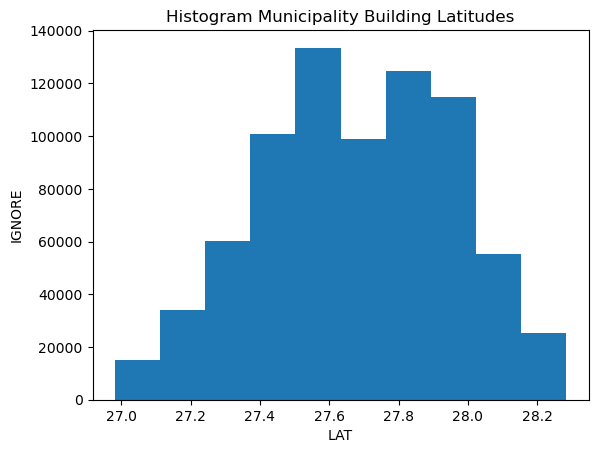

In [377]:
# Plotting the distribution of the LAT of our buildings 
plt.hist(QuakesStructure['LAT'], bins = 10)

# add labels and title
plt.xlabel('LAT')
plt.ylabel('IGNORE')
plt.title('Histogram Municipality Building Latitudes') 
# display the plot
plt.show()

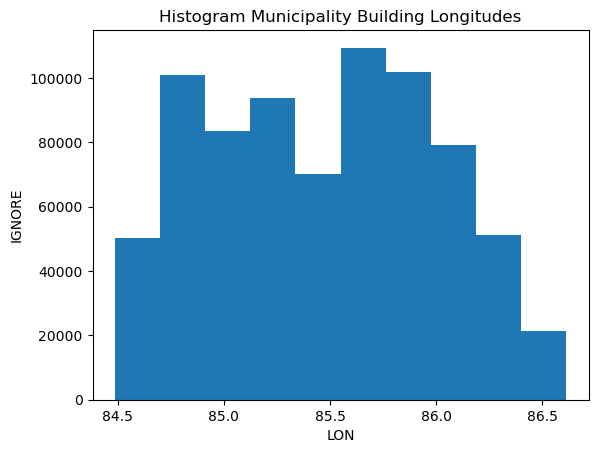

In [378]:
### Plotting the distribution of the LON of our buildings 
plt.hist(QuakesStructure['LON'], bins = 10)

# add labels and title
plt.xlabel('LON')
plt.ylabel('IGNORE')
plt.title('Histogram Municipality Building Longitudes') 
# display the plot
plt.show()

Looking at the plots above, it seems that the geospatial data is relatively normally distributed.

Now that we have cleaned our data and engineered some new features, we should address the columns which are containing information about buildings after the event of the earhtquake. We will do this because including this data in the training of our models will lead to data leakage. A model trained on leaky data will be very good at predicting classifications because it has essentially already learned the answer key.

In [379]:
QuakesStructure.drop(['count_floors_post_eq',
                      'height_ft_post_eq',
                      'solution_major_repair',
                      'solution_minor_repair',
                      'solution_reconstruction',
                      'post_eq_covered_by_landslide',
                      'post_eq_damaged_not_used',
                      'post_eq_damaged_required_used',
                      'post_eq_damaged_rubble_clear_new_building_built',
                      'post_eq_damaged_rubble_clear',
                      'post_eq_damage_rubble_unclear',
                      'post_eq_damaged_used_in_risk'], axis=1, inplace = True)
# These are the features which could be problematic

In [380]:
QuakesStructure.head()
# sanity check

,building_id,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_mud_mortar-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_mud,ground_floor_rc,ground_floor_timber,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,roof_type_bamboo-timer-light,other_floor_type_RCC_RB_RBC,other_floor_type_timber_bamboo_mud,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,position_not_attached,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_rectangualr,config_square,config_T_shape,config_U_shape,DAMAGED_vs_NOT_DAMAGED,LAT,LON
0,120101000011,1,9,288,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,27.312392,86.518964
1,120101000021,1,15,364,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,27.312392,86.518964
2,120101000031,1,20,384,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,27.312392,86.518964
3,120101000041,1,20,312,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,27.312392,86.518964
4,120101000051,1,30,308,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,27.312392,86.518964


Now that we have cleaned our data thouroughly, we can prepare it for modelling. Our baseline model is going to be a logistic regression, as such we will need to ensure we have truly independent variables and no multicolinearity. Independent variables which are collinear may be highly correlated. This can cause overfitting at the training stage and can make it difficult to interpret a models results since it makes it tricky to determine which of the correlated variable is actually having an affect on the target variable.

We can run a correlation heatmap to see if we satisfy the assumptions of logreg . aka no multicollinearity.

In [381]:
QuakesCorr = QuakesStructure.corr()

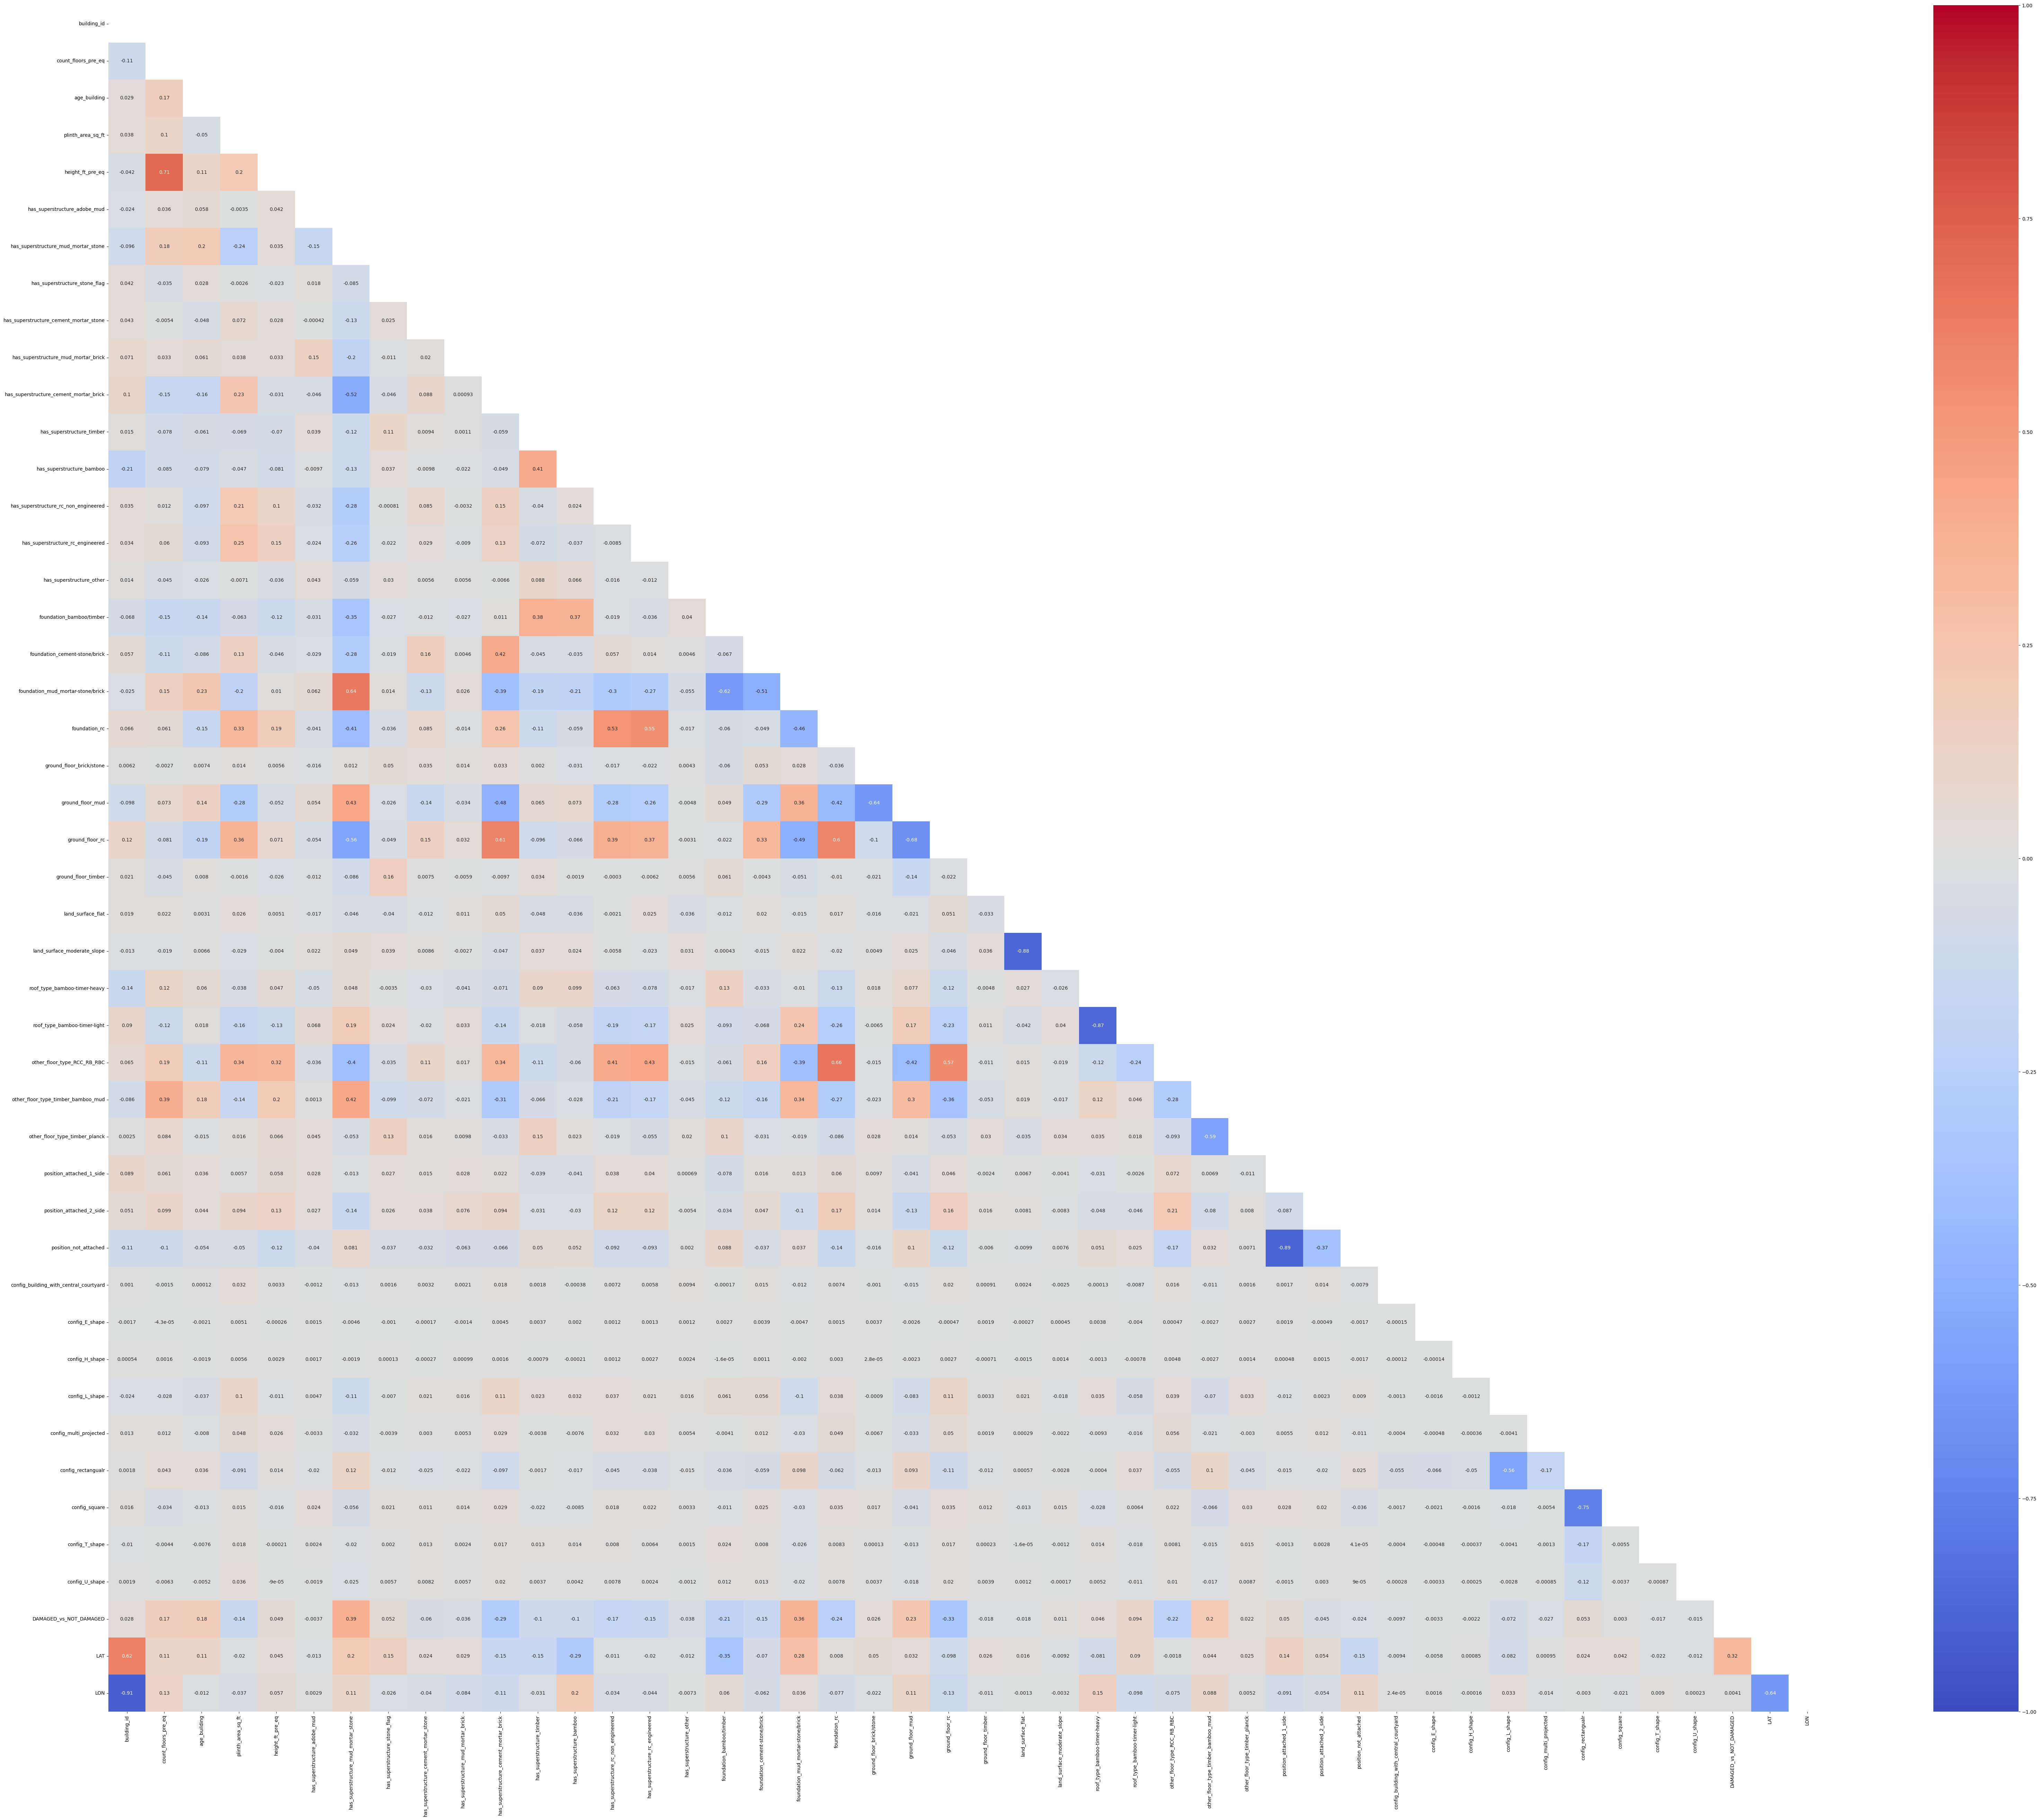

In [382]:
# Plotting our heatmap
plt.figure(figsize=(80, 64)) 

# creating mask of duplicated combinations
mask = np.triu(np.ones_like(QuakesCorr, dtype=bool))

sns.heatmap(QuakesCorr, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)

plt.show()

Ideally we want to see as many grey coloured squares here as possible. There seem to be some strange correlations like 'position_attached_1_side' and 'position_not_attached'. One of these features may have to be dropped to satisfy the assumptions of logistic regression. The LAT and LON correlations are less of an issue because although the values are numeric they are actually discrete rather than continuous.

We can also run a VIF check, this will be a little more interpretable than our enormous heat map. If we have any VIF scores higher than 5 it is an indication that this feature is highly correlated with another independent variable, we can then drop this feature and check our VIF scores again by fitting another test.

In [383]:
X = QuakesStructure.drop(['DAMAGED_vs_NOT_DAMAGED'], axis=1)
y = QuakesStructure['DAMAGED_vs_NOT_DAMAGED']
# first we have to define our X and y objects

In [384]:
X_withconst = sm.add_constant(X)
# then we add a constant to our X object, this is to account for the baseline prob of our outcome variable.

In [385]:
pd.Series([variance_inflation_factor(X_withconst.values, i) 
               for i in range(X_withconst.shape[1])], 
              index=X_withconst.columns)[1:] # leaving out the constant
# fitting a VIF model 

/Users/alistair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


building_id                                 6.069620
count_floors_pre_eq                         3.251068
age_building                                1.116245
plinth_area_sq_ft                           1.271856
height_ft_pre_eq                            2.250347
has_superstructure_adobe_mud                1.136419
has_superstructure_mud_mortar_stone         2.913493
has_superstructure_stone_flag               1.161155
has_superstructure_cement_mortar_stone      1.055318
has_superstructure_mud_mortar_brick         1.135235
has_superstructure_cement_mortar_brick      2.100915
has_superstructure_timber                   1.399177
has_superstructure_bamboo                   1.379499
has_superstructure_rc_non_engineered        1.869435
has_superstructure_rc_engineered            1.909230
has_superstructure_other                    1.043770
foundation_bamboo/timber                   13.653706
foundation_cement-stone/brick              10.192506
foundation_mud_mortar-stone/brick          27.

The feature with the highest VIF score was `ground_floor_mud` with a score of 112.405344
We will drop it from our X object and then once we know which features need to be dropped from our dataframe, we can make the adjustments to our master df.

In [386]:
X_withconst = X_withconst.drop(['ground_floor_mud'], axis=1)

In [387]:
pd.Series([variance_inflation_factor(X_withconst.values, i) 
               for i in range(X_withconst.shape[1])], 
              index=X_withconst.columns)[1:] # leaving out the constant

/Users/alistair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


building_id                                6.069461
count_floors_pre_eq                        3.251056
age_building                               1.116132
plinth_area_sq_ft                          1.271739
height_ft_pre_eq                           2.250347
has_superstructure_adobe_mud               1.136322
has_superstructure_mud_mortar_stone        2.912632
has_superstructure_stone_flag              1.161085
has_superstructure_cement_mortar_stone     1.054915
has_superstructure_mud_mortar_brick        1.135098
has_superstructure_cement_mortar_brick     2.095724
has_superstructure_timber                  1.399089
has_superstructure_bamboo                  1.379477
has_superstructure_rc_non_engineered       1.869435
has_superstructure_rc_engineered           1.909172
has_superstructure_other                   1.042995
foundation_bamboo/timber                  13.643952
foundation_cement-stone/brick             10.189712
foundation_mud_mortar-stone/brick         27.004167
foundation_r

The feature with the highest VIF score was `position_not_attached` with a score of 96.278799

This will be dropped at the beginning of the workbook

In [388]:
X_withconst = X_withconst.drop(['position_not_attached'], axis=1)

In [389]:
pd.Series([variance_inflation_factor(X_withconst.values, i) 
               for i in range(X_withconst.shape[1])], 
              index=X_withconst.columns)[1:] # leaving out the constant

/Users/alistair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


building_id                                6.069452
count_floors_pre_eq                        3.250615
age_building                               1.115662
plinth_area_sq_ft                          1.271720
height_ft_pre_eq                           2.250220
has_superstructure_adobe_mud               1.136280
has_superstructure_mud_mortar_stone        2.912107
has_superstructure_stone_flag              1.161077
has_superstructure_cement_mortar_stone     1.054913
has_superstructure_mud_mortar_brick        1.134607
has_superstructure_cement_mortar_brick     2.095555
has_superstructure_timber                  1.399088
has_superstructure_bamboo                  1.379461
has_superstructure_rc_non_engineered       1.869382
has_superstructure_rc_engineered           1.908939
has_superstructure_other                   1.042993
foundation_bamboo/timber                  13.643946
foundation_cement-stone/brick             10.189699
foundation_mud_mortar-stone/brick         27.004032
foundation_r

The feature with the highest VIF score was `config_rectangualr` with a score of 57.345907

This will be dropped at the beginning of the workbook

In [390]:
X_withconst = X_withconst.drop(['config_rectangualr'], axis=1)

In [391]:
pd.Series([variance_inflation_factor(X_withconst.values, i) 
               for i in range(X_withconst.shape[1])], 
              index=X_withconst.columns)[1:] # leaving out the constant

/Users/alistair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


building_id                                6.069433
count_floors_pre_eq                        3.250611
age_building                               1.115654
plinth_area_sq_ft                          1.271574
height_ft_pre_eq                           2.250207
has_superstructure_adobe_mud               1.136272
has_superstructure_mud_mortar_stone        2.911852
has_superstructure_stone_flag              1.161030
has_superstructure_cement_mortar_stone     1.054913
has_superstructure_mud_mortar_brick        1.134598
has_superstructure_cement_mortar_brick     2.095534
has_superstructure_timber                  1.399054
has_superstructure_bamboo                  1.379365
has_superstructure_rc_non_engineered       1.869360
has_superstructure_rc_engineered           1.908921
has_superstructure_other                   1.042946
foundation_bamboo/timber                  13.643581
foundation_cement-stone/brick             10.188645
foundation_mud_mortar-stone/brick         27.000948
foundation_r

The feature with the highest VIF score was `foundation_mud_mortar-stone/brick` with a score of 26.986800

This will be dropped at the beginning of the workbook

In [392]:
X_withconst = X_withconst.drop(['foundation_mud_mortar-stone/brick'], axis=1)

In [393]:
pd.Series([variance_inflation_factor(X_withconst.values, i) 
               for i in range(X_withconst.shape[1])], 
              index=X_withconst.columns)[1:] # leaving out the constant

/Users/alistair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


building_id                                6.066252
count_floors_pre_eq                        3.248444
age_building                               1.115569
plinth_area_sq_ft                          1.271285
height_ft_pre_eq                           2.249321
has_superstructure_adobe_mud               1.130833
has_superstructure_mud_mortar_stone        2.820081
has_superstructure_stone_flag              1.146750
has_superstructure_cement_mortar_stone     1.054698
has_superstructure_mud_mortar_brick        1.131054
has_superstructure_cement_mortar_brick     2.092133
has_superstructure_timber                  1.397463
has_superstructure_bamboo                  1.379363
has_superstructure_rc_non_engineered       1.868802
has_superstructure_rc_engineered           1.908714
has_superstructure_other                   1.019497
foundation_bamboo/timber                   1.804415
foundation_cement-stone/brick              1.488167
foundation_rc                              3.927494
ground_floor

The feature with the highest VIF score was `roof_type_bamboo-timer-light` with a score of 15.392058

This will be dropped at the beginning of the workbook

In [394]:
X_withconst = X_withconst.drop(['roof_type_bamboo-timer-light'], axis=1)

In [395]:
pd.Series([variance_inflation_factor(X_withconst.values, i) 
               for i in range(X_withconst.shape[1])], 
              index=X_withconst.columns)[1:] # leaving out the constant

/Users/alistair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


building_id                               6.066195
count_floors_pre_eq                       3.248400
age_building                              1.115488
plinth_area_sq_ft                         1.252715
height_ft_pre_eq                          2.249248
has_superstructure_adobe_mud              1.130535
has_superstructure_mud_mortar_stone       2.810141
has_superstructure_stone_flag             1.146458
has_superstructure_cement_mortar_stone    1.053280
has_superstructure_mud_mortar_brick       1.130902
has_superstructure_cement_mortar_brick    2.088504
has_superstructure_timber                 1.395883
has_superstructure_bamboo                 1.379213
has_superstructure_rc_non_engineered      1.817307
has_superstructure_rc_engineered          1.866284
has_superstructure_other                  1.019369
foundation_bamboo/timber                  1.802518
foundation_cement-stone/brick             1.465086
foundation_rc                             3.500741
ground_floor_brick/stone       

The feature with the highest VIF score was `other_floor_type_timber_bamboo_mud` with a score of 4.208203

This will be dropped at the beginning of the workbook

In [396]:
X_withconst = X_withconst.drop(['other_floor_type_timber_bamboo_mud'], axis=1)

In [397]:
pd.Series([variance_inflation_factor(X_withconst.values, i) 
               for i in range(X_withconst.shape[1])], 
              index=X_withconst.columns)[1:] # leaving out the constant

/Users/alistair/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


building_id                               6.064095
count_floors_pre_eq                       2.332751
age_building                              1.115332
plinth_area_sq_ft                         1.252603
height_ft_pre_eq                          2.245664
has_superstructure_adobe_mud              1.129929
has_superstructure_mud_mortar_stone       2.755645
has_superstructure_stone_flag             1.146158
has_superstructure_cement_mortar_stone    1.052911
has_superstructure_mud_mortar_brick       1.130699
has_superstructure_cement_mortar_brick    2.078319
has_superstructure_timber                 1.394712
has_superstructure_bamboo                 1.379204
has_superstructure_rc_non_engineered      1.814293
has_superstructure_rc_engineered          1.861920
has_superstructure_other                  1.018760
foundation_bamboo/timber                  1.802201
foundation_cement-stone/brick             1.464150
foundation_rc                             3.490256
ground_floor_brick/stone       

The results from our latest VIF test only has two features with a score over 5. LON is not creating much of an issue in terms of correlation so it can be left in. The `building_id` feature will be dropped before modelling begins since it essentially contains redundant information for identifying each individual record, kind of like an index.

In [398]:
QuakesStructureStreamlined = QuakesStructure.drop(['building_id',
                                        'ground_floor_mud',
                                        'position_not_attached',
                                        'config_rectangualr',
                                        'foundation_mud_mortar-stone/brick',
                                        'roof_type_bamboo-timer-light',
                                        'other_floor_type_timber_bamboo_mud'], axis=1)

# Here we are dropping the final columns before modelling

In [402]:
QuakesStructureStreamlined.shape
# One last look at the final dataframes shape

(762106, 39)

In [403]:
QuakesStructureStreamlined.head()

,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,foundation_bamboo/timber,foundation_cement-stone/brick,foundation_rc,ground_floor_brick/stone,ground_floor_rc,ground_floor_timber,land_surface_flat,land_surface_moderate_slope,roof_type_bamboo-timer-heavy,other_floor_type_RCC_RB_RBC,other_floor_type_timber_planck,position_attached_1_side,position_attached_2_side,config_building_with_central_courtyard,config_E_shape,config_H_shape,config_L_shape,config_multi_projected,config_square,config_T_shape,config_U_shape,DAMAGED_vs_NOT_DAMAGED,LAT,LON
0,1,9,288,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.312392,86.518964
1,1,15,364,9,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27.312392,86.518964
2,1,20,384,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.312392,86.518964
3,1,20,312,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.312392,86.518964
4,1,30,308,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27.312392,86.518964


All our features are numeric and clean and tidy and we have satisfied the assumptions of logistic regression we can actually get modelling.

Let's export the cleaned dataframe as a csv file and start a new workbook for the modelling stage.

In [401]:
QuakesStructureStreamlined.to_csv('QuakesFinal.csv', index=False)
# Exporting our final dataframe 

# Key Findings 

### During the EDA and Data Cleaning process the following insights were gained.

- The original dataframe contained information which would leak answer key data into the training stage of modelling.
- We have managed to engineer a feature containing geospatial data
- Our binarised target variable accounts for 60% of our overall data